# Notebook 3 - k-means Clustering


> Test for blockquote

<blockquote> Test for blockquote </blockquote>

`test for code hightlight`

```Python
str = "Test for writing code"
print(str)
```

The following work is the main clustering process for the project.


## Load Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch, PathPatch
from matplotlib.ticker import LogLocator

import math
from math import log, log10, log2, log1p

import seaborn as sns
import plotly.graph_objects as go

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report

## Clustering model
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

## Import well file (CSV format)

Import data from well file (CSV) to a pandas Dataframe called **data**. All datasets used is from an open-sourced geoscience subsurface data from _FORCE 2020 lithofacies prediction from well logs competition_, including well log las files, csv file data, NPD lithostratigraphy, well X-Y positions. The following will use training well data and hidden test data.


In [2]:
#Load data with new stratigraphy
data = pd.read_csv('mergedata.csv', sep=',')

#data = pd.read_csv("cenozoic_mergedata.csv", sep=',')
#data = pd.read_csv("cretaceous_mergedata.csv", sep=',')
#data = pd.read_csv("jurassic_mergedata.csv", sep=',')
#data = pd.read_csv("triassic_mergedata.csv", sep=',')
#data = pd.read_csv("lowertriassic_mergedata.csv", sep=',')

data = data[data.columns[1:]]

#well.head()
#data.dropna(subset=['RXO'])
#data['DEPTH'] = data['DEPTH'].abs()
#data.sample(10)
data.head(10)

C:\Users\V330\AppData\Local\Temp\ipykernel_29972\3064618148.py:2: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('mergedata.csv', sep=',')


WELL  DEPTH_MD       CALI  RSHA      RMED      RDEP  RHOB          GR  \
0  15/9-23  1518.280  15.506232   NaN       NaN  0.878615   NaN  103.451515   
1  15/9-23  1518.432  18.524611   NaN       NaN  0.874237   NaN   94.124893   
2  15/9-23  1518.584  18.855669   NaN       NaN  0.869858   NaN   93.586487   
3  15/9-23  1518.736  19.163353   NaN       NaN  0.865479   NaN   91.113373   
4  15/9-23  1518.888  18.489744   NaN  0.849849  0.863804   NaN  100.228333   
5  15/9-23  1519.040  15.919361   NaN  0.929877  0.882300   NaN   97.489906   
6  15/9-23  1519.192  13.566401   NaN  0.973370  0.918941   NaN   96.966949   
7  15/9-23  1519.344  12.201807   NaN  1.020846  0.948801   NaN  105.671333   
8  15/9-23  1519.496  12.069018   NaN  1.064951  1.015625   NaN  111.120483   
9  15/9-23  1519.648  12.012268   NaN  1.079303  1.046690   NaN  100.817406   

   SGR      NPHI  ...    BS         DTS      DRHO  RMIC  RXO  LITHOLOGY  \
0  NaN  0.439925  ...  17.5  326.451263  0.109706   NaN  NaN      65000   
1  NaN  0.504055  ...  17.5  322.926361 -0.006418   NaN  NaN      65000   
2  NaN  0.512960  ...  17.5  325.283142  0.022769   NaN  NaN      65000   
3  NaN  0.500070  ...  17.5  334.233185  0.024972   NaN  NaN      65000   
4  NaN  0.277670  ...  17.5  330.952362  0.024527   NaN  NaN      65000   
5  NaN  0.300810  ...  17.5  316.437927  0.019025   NaN  NaN      65000   
6  NaN  0.404170  ...  17.5  316.381134 -0.008151   NaN  NaN      65000   
7  NaN  0.359548  ...  17.5  319.537354 -0.029403   NaN  NaN      65000   
8  NaN  0.345833  ...  17.5  328.520630 -0.051000   NaN  NaN      65000   
9  NaN  0.421200  ...  17.5  335.690613 -0.084551   NaN  NaN      65000   

           GROUP  FORMATION      GROUP_NEW FORMATION_NEW  
0  HORDALAND GP.  Skade Fm.  HORDALAND GP.     Frigg Fm.  
1  HORDALAND GP.  Skade Fm.  HORDALAND GP.     Frigg Fm.  
2  HORDALAND GP.  Skade Fm.  HORDALAND GP.     Frigg Fm.  
3  HORDALAND GP.  Skade Fm.  HORDALAND GP.     Frigg Fm.  
4  HORDALAND GP.  Skade Fm.  HORDALAND GP.     Frigg Fm.  
5  HORDALAND GP.  Skade Fm.  HORDALAND GP.     Frigg Fm.  
6  HORDALAND GP.  Skade Fm.  HORDALAND GP.     Frigg Fm.  
7  HORDALAND GP.  Skade Fm.  HORDALAND GP.     Frigg Fm.  
8  HORDALAND GP.  Skade Fm.  HORDALAND GP.     Frigg Fm.  
9  HORDALAND GP.  Skade Fm.  HORDALAND GP.     Frigg Fm.  

[10 rows x 23 columns]

In [ ]:
# If using old stratigraphy
#data = pd.read_csv('mergedata_old.csv', sep=',')

#data = pd.read_csv("cenozoic_mergedata_old.csv", sep=',')
data = pd.read_csv("cretaceous_mergedata_old.csv", sep=',')
#data = pd.read_csv("jurassic_mergedata_old.csv", sep=',')
#data = pd.read_csv("triassic_mergedata_old.csv", sep=',')
#data = pd.read_csv("lowertriassic_mergedata_old.csv", sep=',')

data = data[data.columns[1:]]


#well.head()
#data.dropna(subset=['RXO'])
#data['DEPTH'] = data['DEPTH'].abs()
#data.sample(10)
data.head(10)

In [3]:
#Check statistics of each column
data.describe()

DEPTH_MD          CALI           RSHA          RMED          RDEP  \
count  1.292908e+06  1.201588e+06  656333.000000  1.244098e+06  1.281882e+06   
mean   2.186532e+03  1.315525e+01      11.166054  4.845916e+00  1.192961e+01   
std    9.826791e+02  3.744633e+00     104.353080  5.301200e+01  1.124457e+02   
min    1.360860e+02  2.344000e+00       0.000100 -8.418695e-03  3.170056e-02   
25%    1.436024e+03  9.525089e+00       0.849961  9.087349e-01  9.068642e-01   
50%    2.089219e+03  1.253714e+01       1.396211  1.432296e+00  1.433382e+00   
75%    2.856347e+03  1.632767e+01       3.117024  2.656733e+00  2.585099e+00   
max    5.436632e+03  2.827900e+01    2193.904541  1.988616e+03  1.999887e+03   

               RHOB            GR           SGR           NPHI            PEF  \
count  1.122111e+06  1.292908e+06  70492.000000  861969.000000  772131.000000   
mean   2.289057e+00  7.102842e+01     64.983223       0.330318       6.234582   
std    2.507290e-01  3.433602e+01     38.282133       0.130079      10.477265   
min    7.209712e-01  1.092843e-01   -777.985962      -0.035822       0.099718   
25%    2.100158e+00  4.777239e+01     43.526122       0.239690       3.442174   
50%    2.326371e+00  6.886105e+01     69.425766       0.326417       4.370092   
75%    2.490143e+00  8.974101e+01     87.695290       0.421328       5.981673   
max    3.457820e+00  1.141292e+03    963.608582       0.999570     383.129974   

                DTC             SP             BS            DTS  \
count  1.207939e+06  910972.000000  757146.000000  247484.000000   
mean   1.129213e+02      58.021485      11.854520     214.492657   
std    3.000136e+01      76.936308       3.221786      79.708217   
min    7.415132e+00    -999.000000       6.000000      69.163177   
25%    8.736515e+01      30.771349       8.500000     156.457260   
50%    1.090862e+02      54.817402      12.250001     193.038910   
75%    1.404832e+02      82.807846      12.250001     242.942638   
max    3.204789e+02     526.547302      26.000002     676.578125   

               DRHO           RMIC            RXO     LITHOLOGY  
count  1.100124e+06  191341.000000  336321.000000  1.292908e+06  
mean   1.265874e-02       7.423308     -89.184068  6.159963e+04  
std    7.086049e+00      86.163297     356.119523  1.389616e+04  
min   -7.429339e+03       0.056586    -999.900024  3.000000e+04  
25%   -8.966100e-03       0.892284       0.685684  6.500000e+04  
50%    2.503228e-03       1.908327       1.362388  6.500000e+04  
75%    2.478218e-02       4.848979       3.378612  6.500000e+04  
max    2.836938e+00   10000.000000   35930.671875  9.900000e+04

In [4]:
# Filter invalid data 
data.loc[data['RXO'] < 0, 'RXO'] = np.NaN
data.loc[data['RMED'] < 0, 'RMED'] = np.NaN
data.loc[data['SP'] < -998, 'SP'] = np.NaN
data.loc[data['DRHO'] < -999, 'DRHO'] = np.NaN
data.loc[data['SGR'] < 0, 'SGR'] = np.NaN
data.describe()

DEPTH_MD          CALI           RSHA          RMED          RDEP  \
count  1.292908e+06  1.201588e+06  656333.000000  1.244091e+06  1.281882e+06   
mean   2.186532e+03  1.315525e+01      11.166054  4.845943e+00  1.192961e+01   
std    9.826791e+02  3.744633e+00     104.353080  5.301215e+01  1.124457e+02   
min    1.360860e+02  2.344000e+00       0.000100  3.990377e-02  3.170056e-02   
25%    1.436024e+03  9.525089e+00       0.849961  9.087389e-01  9.068642e-01   
50%    2.089219e+03  1.253714e+01       1.396211  1.432299e+00  1.433382e+00   
75%    2.856347e+03  1.632767e+01       3.117024  2.656753e+00  2.585099e+00   
max    5.436632e+03  2.827900e+01    2193.904541  1.988616e+03  1.999887e+03   

               RHOB            GR           SGR           NPHI            PEF  \
count  1.122111e+06  1.292908e+06  70453.000000  861969.000000  772131.000000   
mean   2.289057e+00  7.102842e+01     65.099165       0.330318       6.234582   
std    2.507290e-01  3.433602e+01     37.727005       0.130079      10.477265   
min    7.209712e-01  1.092843e-01      0.001417      -0.035822       0.099718   
25%    2.100158e+00  4.777239e+01     43.588337       0.239690       3.442174   
50%    2.326371e+00  6.886105e+01     69.453705       0.326417       4.370092   
75%    2.490143e+00  8.974101e+01     87.701874       0.421328       5.981673   
max    3.457820e+00  1.141292e+03    963.608582       0.999570     383.129974   

                DTC             SP             BS            DTS  \
count  1.207939e+06  910570.000000  757146.000000  247484.000000   
mean   1.129213e+02      58.488140      11.854520     214.492657   
std    3.000136e+01      73.677170       3.221786      79.708217   
min    7.415132e+00    -608.786804       6.000000      69.163177   
25%    8.736515e+01      30.811418       8.500000     156.457260   
50%    1.090862e+02      54.832355      12.250001     193.038910   
75%    1.404832e+02      82.825874      12.250001     242.942638   
max    3.204789e+02     526.547302      26.000002     676.578125   

               DRHO           RMIC            RXO     LITHOLOGY  
count  1.100123e+06  191341.000000  301709.000000  1.292908e+06  
mean   1.941194e-02       7.423308      14.824082  6.159963e+04  
std    2.003621e-01      86.163297     189.336599  1.389616e+04  
min   -6.043000e+00       0.056586       0.002298  3.000000e+04  
25%   -8.966062e-03       0.892284       0.861474  6.500000e+04  
50%    2.503231e-03       1.908327       1.563246  6.500000e+04  
75%    2.478237e-02       4.848979       3.972788  6.500000e+04  
max    2.836938e+00   10000.000000   35930.671875  9.900000e+04

## Columns list

Including renaming them to make it easier to call the column


In [5]:
# If using new stratigraphy
data.rename(columns = {'DEPTH_MD':'DEPTH'}, inplace = True)
data= data[['WELL', 'DEPTH', 'CALI','RSHA','RMED','RDEP','RXO','RMIC','GR','SGR','NPHI','PEF','RHOB','SP','BS','DRHO','DTC','DTS', 'LITHOLOGY', 'GROUP_NEW', 'FORMATION_NEW']]
data.rename(columns = {'FORMATION_NEW':'FORMATION'}, inplace = True)
data.rename(columns = {'GROUP_NEW':'GROUP'}, inplace = True)

data.columns

Index(['WELL', 'DEPTH', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RXO', 'RMIC', 'GR',
       'SGR', 'NPHI', 'PEF', 'RHOB', 'SP', 'BS', 'DRHO', 'DTC', 'DTS',
       'LITHOLOGY', 'GROUP', 'FORMATION'],
      dtype='object')

In [ ]:
# If using old stratigraphy
data.rename(columns = {'DEPTH_MD':'DEPTH'}, inplace = True)
data= data[['WELL', 'DEPTH', 'CALI','RSHA','RMED','RDEP','RXO','RMIC','GR','SGR','NPHI','PEF','RHOB','SP','BS','DRHO','DTC','DTS', 'LITHOLOGY', 'GROUP', 'FORMATION']]
data.columns

In [6]:
well = data.copy()
well

WELL        DEPTH       CALI        RSHA      RMED         RDEP  \
0        15/9-23  1518.280000  15.506232         NaN       NaN     0.878615   
1        15/9-23  1518.432000  18.524611         NaN       NaN     0.874237   
2        15/9-23  1518.584000  18.855669         NaN       NaN     0.869858   
3        15/9-23  1518.736000  19.163353         NaN       NaN     0.865479   
4        15/9-23  1518.888000  18.489744         NaN  0.849849     0.863804   
...          ...          ...        ...         ...       ...          ...   
1292903  17/11-1  3237.857016  12.248030  525.196472       NaN  1399.928101   
1292904  17/11-1  3238.009016  12.252416  208.707199       NaN  1388.194702   
1292905  17/11-1  3238.161016  12.256806   89.526634       NaN  1376.633545   
1292906  17/11-1  3238.313016  12.262195   21.578579       NaN  1375.711182   
1292907  17/11-1  3238.465016  12.271119  102.208458       NaN  1382.754517   

         RXO  RMIC          GR  SGR  ...  PEF      RHOB  SP    BS      DRHO  \
0        NaN   NaN  103.451515  NaN  ...  NaN       NaN NaN  17.5  0.109706   
1        NaN   NaN   94.124893  NaN  ...  NaN       NaN NaN  17.5 -0.006418   
2        NaN   NaN   93.586487  NaN  ...  NaN       NaN NaN  17.5  0.022769   
3        NaN   NaN   91.113373  NaN  ...  NaN       NaN NaN  17.5  0.024972   
4        NaN   NaN  100.228333  NaN  ...  NaN       NaN NaN  17.5  0.024527   
...      ...   ...         ...  ...  ...  ...       ...  ..   ...       ...   
1292903  NaN   NaN    1.773538  NaN  ...  NaN  1.997159 NaN   NaN -0.002661   
1292904  NaN   NaN    1.408370  NaN  ...  NaN  2.012719 NaN   NaN -0.002859   
1292905  NaN   NaN    1.341022  NaN  ...  NaN  2.018507 NaN   NaN  0.001389   
1292906  NaN   NaN    1.273675  NaN  ...  NaN  2.005253 NaN   NaN  0.004771   
1292907  NaN   NaN    1.206376  NaN  ...  NaN  1.988200 NaN   NaN  0.005700   

                DTC         DTS  LITHOLOGY          GROUP      FORMATION  
0        147.043427  326.451263      65000  HORDALAND GP.      Frigg Fm.  
1        145.426468  322.926361      65000  HORDALAND GP.      Frigg Fm.  
2        145.295105  325.283142      65000  HORDALAND GP.      Frigg Fm.  
3        143.657593  334.233185      65000  HORDALAND GP.      Frigg Fm.  
4        142.838440  330.952362      65000  HORDALAND GP.      Frigg Fm.  
...             ...         ...        ...            ...            ...  
1292903   69.353172         NaN      88000  ZECHSTEIN GP.  ZECHSTEIN GP.  
1292904   69.454887         NaN      88000  ZECHSTEIN GP.  ZECHSTEIN GP.  
1292905   69.518295         NaN      88000  ZECHSTEIN GP.  ZECHSTEIN GP.  
1292906   69.618744         NaN      88000  ZECHSTEIN GP.  ZECHSTEIN GP.  
1292907   69.276260         NaN      88000  ZECHSTEIN GP.  ZECHSTEIN GP.  

[1292908 rows x 21 columns]

## Wells List


In [7]:
well_name=data['WELL'].unique()
print(len(well_name))
well_name

108


array(['15/9-23', '16/2-7', '16/7-6', '17/4-1', '25/10-9', '31/2-10',
       '35/11-5', '35/9-7', '15/9-13', '15/9-15', '15/9-17', '16/1-6 A',
       '16/10-1', '16/10-3', '16/11-1 ST3', '16/2-11 A', '16/2-16',
       '16/2-6', '16/4-1', '16/7-4', '16/7-5', '16/8-1', '17/11-1',
       '25/11-15', '25/11-19 S', '25/11-5', '25/2-13 T4', '25/2-14',
       '25/2-7', '25/3-1', '25/4-5', '25/5-1', '25/5-4', '25/6-1',
       '25/6-2', '25/6-3', '25/7-2', '25/8-5 S', '25/8-7', '25/9-1',
       '26/4-1', '29/6-1', '30/3-3', '30/6-5', '31/2-1', '31/2-19 S',
       '31/2-7', '31/2-8', '31/2-9', '31/3-1', '31/3-2', '31/3-3',
       '31/3-4', '31/4-10', '31/4-5', '31/5-4 S', '31/6-5', '31/6-8',
       '33/9-1', '33/9-17', '34/10-19', '34/10-21', '34/10-35',
       '34/11-2 S', '34/2-4', '34/7-20', '34/7-21', '34/8-1', '34/8-3',
       '35/11-1', '35/11-11', '35/11-12', '35/11-6', '35/11-7', '35/12-1',
       '35/4-1', '35/8-6 S', '35/9-2', '7/1-1', '31/2-21 S', '34/3-2 S',
       '16/10-2', '16/10-

## Groupby lithology


In [8]:
well['LIT'] = well.loc[:, 'LITHOLOGY']
well['LIT'].isnull()
well.replace({'LIT': {30000: 'Sandstone', 
                      65030: 'Sandy Shale', 
                      65000:'Shale', 
                      80000:'Marl', 
                      74000:'Dolomite', 
                      70000:'Limestone', 
                      70032:'Chalk', 
                      88000:'Halite', 
                      86000:'Anhydrite', 
                      99000:'Volcaniclastics', 
                      90000:'Coal', 
                      93000:'Basement'}}, inplace=True)
well['LIT']=well['LIT'].astype('category')

well['LITCOLOR'] = well.loc[:, 'LITHOLOGY']
well['LITCOLOR'].isnull()
well.replace({'LITCOLOR': {30000: '#ffff00', 
                      65030: '#ffe119', 
                      65000:'#bebebe', 
                      80000:'#7cfc00', 
                      74000:'#8080ff', 
                      70000:'#80ffff', 
                      70032:'#80ffff', 
                      88000:'#7ddfbe', 
                      86000:'#ff80ff', 
                      99000:'#ff8c00', 
                      90000:'black', 
                      93000:'#ef138a'}}, inplace=True)
well['LITCOLOR']=well['LITCOLOR'].astype('category')

litoname = list(set(well['LIT']))
litocolor = {'Sandstone': '#ffff00', 
             'Sandy Shale': '#c1f80a', 
             'Shale': '#bebebe', 
             'Marl': '#069af3', 
             'Dolomite': '#8080ff', 
             'Limestone': '#80ffff', 
             'Chalk': '#7bc8f6', 
             'Halite': '#7ddfbe', 
             'Anhydrite': '#ff80ff', 
             'Volcaniclastics': '#ff8c00', 
             'Coal': 'black', 
             'Basement': '#ef138a'}



In [9]:
grouped = well.groupby('LIT', sort=False)

keys = [key for key, _ in grouped] #groupby based on unique keys or categories (1)
keys #show groupby keys or categories
#grouped.groups.keys() #groupby based on unique keys or categories (1)
#grouped.apply(display) #show groupby data

C:\Users\V330\AppData\Local\Temp\ipykernel_29972\856599071.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = well.groupby('LIT', sort=False)


['Shale',
 'Sandy Shale',
 'Limestone',
 'Sandstone',
 'Volcaniclastics',
 'Dolomite',
 'Marl',
 'Coal',
 'Chalk',
 'Anhydrite',
 'Halite',
 'Basement']

## Log normalization


In [10]:
#Using log normalized
well_log = well.copy()
well_log['GR_log2'] = well_log['GR'].apply(lambda x: log2(x))
well_log['GR_log10'] = well_log['GR'].apply(lambda x: log10(x))
well_log['GR_log1p'] = well_log['GR'].apply(lambda x: log1p(x))
well_log['GR_logn'] = well_log['GR'].apply(lambda x: log(x))


In [11]:
#Using sklearn preprocessing

ss = StandardScaler()
well_log['GR_SS'] = ss.fit_transform(well_log[['GR']])

pt_yj = PowerTransformer(method='yeo-johnson', standardize=False)
well_log['GR_PTYJ'] = pt_yj.fit_transform(well_log[['GR']])

pt_bc = PowerTransformer(method='box-cox', standardize=False)
well_log['GR_PTBC'] = pt_bc.fit_transform(well_log[['GR']])

mms = MinMaxScaler()
well_log['GR_MMS'] = mms.fit_transform(well_log[['GR']])



In [ ]:
gr_curves=['GR', 'GR_log2', 'GR_log10', 'GR_log1p','GR_logn', 'GR_SS', 'GR_PTYJ', 'GR_PTBC', 'GR_MMS']
fig = plt.figure(figsize=(28,20))

for i, feature in enumerate(gr_curves):
    ax=fig.add_subplot(3,3,i+1)
    ax.set_title(feature+" Distribution")
    ax.set_axisbelow(True)
    fig.suptitle('')
    
    #ax=sns.histplot(data=well_log, x=feature, hue='LIT', stat='probability', multiple='stack', alpha=1, bins=40, binrange=(0,10),fill=True, log_scale=False, palette=litocolor, common_norm=False)
    #ax=sns.histplot(data=well_log, x=feature, hue='LIT', stat='probability', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.1),np.log10(1000)), fill=True, log_scale=True, palette=litocolor, common_norm=False)
    #ax.set_xscale("linear")
    #ax.set_xscale("log")
    #ax.set_xlabel('API')
    
    if i==0:
        #well_log.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_log, x=feature, hue='LIT', stat='probability', multiple='stack', alpha=1, bins=40, binrange=(0,400), fill=True, log_scale=False, palette=litocolor, common_norm=False)
        ax.set_xscale("linear")
        ax.set_xlabel('API')
    
    else:
        #well_log.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.001),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=litocolor)
        #ax=sns.histplot(data=well_log, x=feature, hue='LIT', stat='probability', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.1),np.log10(800)), fill=True, log_scale=True, palette=litocolor, common_norm=False)
        #ax.set_xscale("log")
        ax=sns.histplot(data=well_log, x=feature, hue='LIT', stat='probability', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
        ax.set_xscale("linear")
        ax.set_xlabel('API')
    
    sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
    ax.grid()
#plt.subplots_adjust(top=0.95)
plt.subplots_adjust(hspace=0.15, wspace=0.5)

plt.tight_layout()
#plt.savefig('histogramlithology_stackprobability_triassicdata_new.png')
plt.show()

In [160]:
well_log10 = well.copy()
well_log10['RSHA_log10'] = well_log10['RSHA'].apply(lambda x: log10(x))
well_log10['RMED_log10'] = well_log10['RMED'].apply(lambda x: log10(x))
well_log10['RDEP_log10'] = well_log10['RDEP'].apply(lambda x: log10(x))
well_log10['RXO_log10'] = well_log10['RXO'].apply(lambda x: log10(x))
well_log10['RMIC_log10'] = well_log10['RMIC'].apply(lambda x: log10(x))
well_log10['GR_log10'] = well_log10['GR'].apply(lambda x: log10(x))
well_log10['SGR_log10'] = well_log10['SGR'].apply(lambda x: log10(x))
well_log10['PEF_log10'] = well_log10['PEF'].apply(lambda x: log10(x))
#well_log10.drop(['RSHA','RMED','RDEP', 'RXO', 'GR', 'PEF', 'SGR', 'RMIC'], axis=1, inplace=True)

In [161]:
well_logn = well.copy()
well_logn['RSHA_logn'] = well_logn['RSHA'].apply(lambda x: log(x))
well_logn['RMED_logn'] = well_logn['RMED'].apply(lambda x: log(x))
well_logn['RDEP_logn'] = well_logn['RDEP'].apply(lambda x: log(x))
well_logn['RXO_logn'] = well_logn['RXO'].apply(lambda x: log(x))
well_logn['RMIC_logn'] = well_logn['RMIC'].apply(lambda x: log(x))
well_logn['GR_logn'] = well_logn['GR'].apply(lambda x: log(x))
well_logn['SGR_logn'] = well_logn['SGR'].apply(lambda x: log(x))
well_logn['PEF_logn'] = well_logn['PEF'].apply(lambda x: log(x))
#well_logn.drop(['RSHA','RMED','RDEP', 'RXO', 'GR', 'PEF', 'SGR', 'RMIC'], axis=1, inplace=True)


In [162]:
well_logPTYJ = well.copy()
well_logPTYJ['RSHA_logPTYJ'] = pt_yj.fit_transform(well_logPTYJ[['RSHA']])
well_logPTYJ['RMED_logPTYJ'] = pt_yj.fit_transform(well_logPTYJ[['RMED']])
well_logPTYJ['RDEP_logPTYJ'] = pt_yj.fit_transform(well_logPTYJ[['RDEP']])
well_logPTYJ['RXO_logPTYJ'] = pt_yj.fit_transform(well_logPTYJ[['RXO']])
well_logPTYJ['RMIC_logPTYJ'] = pt_yj.fit_transform(well_logPTYJ[['RMIC']])
well_logPTYJ['GR_logPTYJ'] = pt_yj.fit_transform(well_logPTYJ[['GR']])
well_logPTYJ['SGR_logPTYJ'] = pt_yj.fit_transform(well_logPTYJ[['SGR']])
well_logPTYJ['PEF_logPTYJ'] = pt_yj.fit_transform(well_logPTYJ[['PEF']])
#well_logPTYJ.drop(['RSHA','RMED','RDEP', 'RXO', 'GR', 'PEF', 'SGR', 'RMIC'], axis=1, inplace=True)

In [163]:
well_log['GR_PTBC'] = pt_bc.fit_transform(well_log[['GR']])

well_logPTBC = well.copy()
well_logPTBC['RSHA_logPTBC'] = pt_bc.fit_transform(well_logPTBC[['RSHA']])
well_logPTBC['RMED_logPTBC'] = pt_bc.fit_transform(well_logPTBC[['RMED']])
well_logPTBC['RDEP_logPTBC'] = pt_bc.fit_transform(well_logPTBC[['RDEP']])
well_logPTBC['RXO_logPTBC'] = pt_bc.fit_transform(well_logPTBC[['RXO']])
well_logPTBC['RMIC_logPTBC'] = pt_bc.fit_transform(well_logPTBC[['RMIC']])
well_logPTBC['GR_logPTBC'] = pt_bc.fit_transform(well_logPTBC[['GR']])
well_logPTBC['SGR_logPTBC'] = pt_bc.fit_transform(well_logPTBC[['SGR']])
well_logPTBC['PEF_logPTBC'] = pt_bc.fit_transform(well_logPTBC[['PEF']])
#well_logPTBC.drop(['RSHA','RMED','RDEP', 'RXO', 'GR', 'PEF', 'SGR', 'RMIC'], axis=1, inplace=True)

## Well log Correlation (Pearson)


### Linear correlation


In [ ]:
#Histogram on each specific column for more detail
well_corr = well.copy()
well_corr.drop(['WELL','DEPTH','CALI','BS', 'DRHO','LITHOLOGY', 'GROUP', 'FORMATION', 'LIT', 'LITCOLOR'], axis=1, inplace=True)
well_corr

In [ ]:
correlate = well_corr.corr(method = 'pearson')
correlate

In [ ]:
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(correlate,annot=True,fmt=".2f", vmin=-1, vmax=1, linewidth=.5)
plt.title("Correlation with linear logs")
plt.show()

### Log-lin correlation (with log10)


In [ ]:
#Histogram on each specific column for more detail
well_corr10 = well_log10.copy()
well_corr10.drop(['RSHA','RMED','RDEP', 'RXO', 'GR', 'PEF', 'SGR', 'RMIC'], axis=1, inplace=True)
well_corr10.drop(['WELL','DEPTH','CALI','BS', 'DRHO','LITHOLOGY', 'GROUP', 'FORMATION', 'LIT', 'LITCOLOR'], axis=1, inplace=True)
well_corr10

In [ ]:
correlate_log10 = well_corr10.corr(method = 'pearson')
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(correlate_log10,annot=True,fmt=".2f", vmin=-1, vmax=1, linewidth=.5)
plt.title("Correlation with log-lin logs (log10)")
plt.show()

### Log-lin correlation (with logn)


In [ ]:
#Histogram on each specific column for more detail
well_corrn = well_logn.copy()
well_corrn.drop(['RSHA','RMED','RDEP', 'RXO', 'GR', 'PEF', 'SGR', 'RMIC'], axis=1, inplace=True)
well_corrn.drop(['WELL','DEPTH','CALI','BS', 'DRHO','LITHOLOGY', 'GROUP', 'FORMATION', 'LIT', 'LITCOLOR'], axis=1, inplace=True)
well_corrn

In [ ]:
correlate_logn = well_corrn.corr(method = 'pearson')
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(correlate_logn,annot=True,fmt=".2f", vmin=-1, vmax=1, linewidth=.5)
plt.title("Correlation with log-lin logs (logn)")
plt.show()

### Log-lin correlation (with PowerTransform yeo-johnson)


In [ ]:
#Histogram on each specific column for more detail
well_corrptyj = well_logPTYJ.copy()
well_corrptyj.drop(['RSHA','RMED','RDEP', 'RXO', 'GR', 'PEF', 'SGR', 'RMIC'], axis=1, inplace=True)
well_corrptyj.drop(['WELL','DEPTH','CALI','BS', 'DRHO','LITHOLOGY', 'GROUP', 'FORMATION', 'LIT', 'LITCOLOR'], axis=1, inplace=True)
well_corrptyj

In [ ]:
correlate_logptyj = well_corrptyj.corr(method = 'pearson')
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(correlate_logptyj,annot=True,fmt=".2f", vmin=-1, vmax=1, linewidth=.5)
plt.title("Correlation with log-lin logs (PowerTransform yeo-johnson)")
plt.show()

### Log-lin correlation (with PowerTransform box-cox)


In [ ]:
#Histogram on each specific column for more detail
well_corrptbc = well_logPTBC.copy()
well_corrptbc.drop(['RSHA','RMED','RDEP', 'RXO', 'GR', 'PEF', 'SGR', 'RMIC'], axis=1, inplace=True)
well_corrptbc.drop(['WELL','DEPTH','CALI','BS', 'DRHO','LITHOLOGY', 'GROUP', 'FORMATION', 'LIT', 'LITCOLOR'], axis=1, inplace=True)
well_corrptbc

In [ ]:
correlate_logptbc = well_corrptbc.corr(method = 'pearson')
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(correlate_logptbc,annot=True,fmt=".2f", vmin=-1, vmax=1, linewidth=.5)
plt.title("Correlation with log-lin logs (PowerTransform box-cox)")
plt.show()

### Other correlation method (not used)


In [ ]:
correlate.style.background_gradient(cmap='coolwarm')

## Dendogram for Hierarchical Clustering


### Linear dendogram


In [140]:
def link_dissimilarity (correlate):
    dissimilarity = 1 - abs(correlate)
    z = linkage(squareform(dissimilarity), 'complete')
    
    return z

In [ ]:
z = link_dissimilarity(correlate)

plt.figure(figsize=(12,5))
dendrogram(z, labels=well_corr.columns, orientation='top', 
           leaf_rotation=90);
plt.title("Dendogram of linear logs")

In [143]:
def dendogram_cluster (z, well_data):
    # Clusterize the data
    threshold = 0.8
    labels = fcluster(z, threshold, criterion='distance')

    # Keep the indices to sort labels
    labels_order = np.argsort(labels)

    # Build a new dataframe with the sorted columns
    for idx, i in enumerate(well_data.columns[labels_order]):
        if idx == 0:
            clustered = pd.DataFrame(well_data[i])
        else:
            df_to_append = pd.DataFrame(well_data[i])
            clustered = pd.concat([clustered, df_to_append], axis=1)
    
    return clustered

In [ ]:
clustered = dendogram_cluster(z, well_corr)
correlate_clustered = clustered.corr()

plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(correlate_clustered,annot=True,fmt=".2f", vmin=-1, vmax=1, linewidth=.5)
plt.title("Clustered correlation with linear logs")
plt.show()

### Log-lin dendogram (log10)


In [ ]:
z_log10 = link_dissimilarity(correlate_log10)

plt.figure(figsize=(12,5))
dendrogram(z_log10, labels=well_corr10.columns, orientation='top', 
           leaf_rotation=90);
plt.title("Dendogram of log-lin logs (log10)")

In [ ]:
clustered_log10 = dendogram_cluster(z_log10, well_corr10)
correlate_clustered_log10 = clustered_log10.corr()

plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(correlate_clustered_log10,annot=True,fmt=".2f", vmin=-1, vmax=1, linewidth=.5)
plt.title("Clustered correlation with log-lin logs (log10)")
plt.show()

### Log-lin dendogram (logn)


In [ ]:
z_logn = link_dissimilarity(correlate_logn)

plt.figure(figsize=(12,5))
dendrogram(z_logn, labels=well_corrn.columns, orientation='top', 
           leaf_rotation=90);
plt.title("Dendogram of log-lin logs (logn)")

In [ ]:
clustered_logn = dendogram_cluster(z_logn, well_corrn)
correlate_clustered_logn = clustered_logn.corr()

plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(correlate_clustered_logn,annot=True,fmt=".2f", vmin=-1, vmax=1, linewidth=.5)
plt.title("Clustered correlation with log-lin logs (logn)")
plt.show()

### Log-lin dendogram (PowerTransform yeo-johnson)


In [ ]:
z_logptyj = link_dissimilarity(correlate_logptyj)

plt.figure(figsize=(12,5))
dendrogram(z_logptyj, labels=well_corrptyj.columns, orientation='top', 
           leaf_rotation=90);
plt.title("Dendogram of log-lin logs (PowerTransform yeo-johnson)")

In [ ]:
clustered_logptyj = dendogram_cluster(z_logptyj, well_corrptyj)
correlate_clustered_logptyj = clustered_logptyj.corr()

plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(correlate_clustered_logptyj,annot=True,fmt=".2f", vmin=-1, vmax=1, linewidth=.5)
plt.title("Clustered correlation with log-lin logs (PowerTransform yeo-johnson)")
plt.show()

### Log-lin dendogram (PowerTransform box-cox)


In [ ]:
z_logptbc = link_dissimilarity(correlate_logptbc)

plt.figure(figsize=(12,5))
dendrogram(z_logptbc, labels=well_corrptbc.columns, orientation='top', 
           leaf_rotation=90);
plt.title("Dendogram of log-lin logs (PowerTransform box-cox)")

In [ ]:
clustered_logptbc = dendogram_cluster(z_logptbc, well_corrptbc)
correlate_clustered_logptbc = clustered_logptbc.corr()

plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(correlate_clustered_logptbc,annot=True,fmt=".2f", vmin=-1, vmax=1, linewidth=.5)
plt.title("Clustered correlation with log-lin logs (PowerTransform box-cox)")
plt.show()

## k-means Clustering


### Data Initiation

Based on Pearson and dendogram analysis, well log data that normalized with PowerTransform yeo-johnson gives the best result and correlation.


In [234]:
well_clustered = well_logPTYJ.copy()
well_clustered

WELL        DEPTH       CALI        RSHA      RMED         RDEP  \
0        15/9-23  1518.280000  15.506232         NaN       NaN     0.878615   
1        15/9-23  1518.432000  18.524611         NaN       NaN     0.874237   
2        15/9-23  1518.584000  18.855669         NaN       NaN     0.869858   
3        15/9-23  1518.736000  19.163353         NaN       NaN     0.865479   
4        15/9-23  1518.888000  18.489744         NaN  0.849849     0.863804   
...          ...          ...        ...         ...       ...          ...   
1292903  17/11-1  3237.857016  12.248030  525.196472       NaN  1399.928101   
1292904  17/11-1  3238.009016  12.252416  208.707199       NaN  1388.194702   
1292905  17/11-1  3238.161016  12.256806   89.526634       NaN  1376.633545   
1292906  17/11-1  3238.313016  12.262195   21.578579       NaN  1375.711182   
1292907  17/11-1  3238.465016  12.271119  102.208458       NaN  1382.754517   

         RXO  RMIC          GR  SGR  ...     LIT  LITCOLOR  RSHA_logPTYJ  \
0        NaN   NaN  103.451515  NaN  ...   Shale   #bebebe           NaN   
1        NaN   NaN   94.124893  NaN  ...   Shale   #bebebe           NaN   
2        NaN   NaN   93.586487  NaN  ...   Shale   #bebebe           NaN   
3        NaN   NaN   91.113373  NaN  ...   Shale   #bebebe           NaN   
4        NaN   NaN  100.228333  NaN  ...   Shale   #bebebe           NaN   
...      ...   ...         ...  ...  ...     ...       ...           ...   
1292903  NaN   NaN    1.773538  NaN  ...  Halite   #7ddfbe      1.115611   
1292904  NaN   NaN    1.408370  NaN  ...  Halite   #7ddfbe      1.110311   
1292905  NaN   NaN    1.341022  NaN  ...  Halite   #7ddfbe      1.099742   
1292906  NaN   NaN    1.273675  NaN  ...  Halite   #7ddfbe      1.050552   
1292907  NaN   NaN    1.206376  NaN  ...  Halite   #7ddfbe      1.101955   

         RMED_logPTYJ  RDEP_logPTYJ  RXO_logPTYJ  RMIC_logPTYJ  GR_logPTYJ  \
0                 NaN      0.465439          NaN           NaN   18.609550   
1                 NaN      0.464209          NaN           NaN   17.663113   
2                 NaN      0.462973          NaN           NaN   17.607098   
3                 NaN      0.461731          NaN           NaN   17.347739   
4             0.45277      0.461254          NaN           NaN   18.287410   
...               ...           ...          ...           ...         ...   
1292903           NaN      0.982541          NaN           NaN    1.332923   
1292904           NaN      0.982536          NaN           NaN    1.105293   
1292905           NaN      0.982530          NaN           NaN    1.061479   
1292906           NaN      0.982530          NaN           NaN    1.017033   
1292907           NaN      0.982533          NaN           NaN    0.971961   

         SGR_logPTYJ PEF_logPTYJ  
0                NaN         NaN  
1                NaN         NaN  
2                NaN         NaN  
3                NaN         NaN  
4                NaN         NaN  
...              ...         ...  
1292903          NaN         NaN  
1292904          NaN         NaN  
1292905          NaN         NaN  
1292906          NaN         NaN  
1292907          NaN         NaN  

[1292908 rows x 31 columns]

In [265]:
#Test if the best data is logn
well_clustered = well_logn.copy()
well_clustered

WELL        DEPTH       CALI        RSHA      RMED         RDEP  \
0        15/9-23  1518.280000  15.506232         NaN       NaN     0.878615   
1        15/9-23  1518.432000  18.524611         NaN       NaN     0.874237   
2        15/9-23  1518.584000  18.855669         NaN       NaN     0.869858   
3        15/9-23  1518.736000  19.163353         NaN       NaN     0.865479   
4        15/9-23  1518.888000  18.489744         NaN  0.849849     0.863804   
...          ...          ...        ...         ...       ...          ...   
1292903  17/11-1  3237.857016  12.248030  525.196472       NaN  1399.928101   
1292904  17/11-1  3238.009016  12.252416  208.707199       NaN  1388.194702   
1292905  17/11-1  3238.161016  12.256806   89.526634       NaN  1376.633545   
1292906  17/11-1  3238.313016  12.262195   21.578579       NaN  1375.711182   
1292907  17/11-1  3238.465016  12.271119  102.208458       NaN  1382.754517   

         RXO  RMIC          GR  SGR  ...     LIT  LITCOLOR  RSHA_logn  \
0        NaN   NaN  103.451515  NaN  ...   Shale   #bebebe        NaN   
1        NaN   NaN   94.124893  NaN  ...   Shale   #bebebe        NaN   
2        NaN   NaN   93.586487  NaN  ...   Shale   #bebebe        NaN   
3        NaN   NaN   91.113373  NaN  ...   Shale   #bebebe        NaN   
4        NaN   NaN  100.228333  NaN  ...   Shale   #bebebe        NaN   
...      ...   ...         ...  ...  ...     ...       ...        ...   
1292903  NaN   NaN    1.773538  NaN  ...  Halite   #7ddfbe   6.263772   
1292904  NaN   NaN    1.408370  NaN  ...  Halite   #7ddfbe   5.340932   
1292905  NaN   NaN    1.341022  NaN  ...  Halite   #7ddfbe   4.494536   
1292906  NaN   NaN    1.273675  NaN  ...  Halite   #7ddfbe   3.071701   
1292907  NaN   NaN    1.206376  NaN  ...  Halite   #7ddfbe   4.627014   

         RMED_logn  RDEP_logn  RXO_logn  RMIC_logn   GR_logn  SGR_logn  \
0              NaN  -0.129408       NaN        NaN  4.639103       NaN   
1              NaN  -0.134404       NaN        NaN  4.544623       NaN   
2              NaN  -0.139425       NaN        NaN  4.538886       NaN   
3              NaN  -0.144472       NaN        NaN  4.512105       NaN   
4        -0.162697  -0.146410       NaN        NaN  4.607451       NaN   
...            ...        ...       ...        ...       ...       ...   
1292903        NaN   7.244176       NaN        NaN  0.572977       NaN   
1292904        NaN   7.235759       NaN        NaN  0.342433       NaN   
1292905        NaN   7.227396       NaN        NaN  0.293432       NaN   
1292906        NaN   7.226726       NaN        NaN  0.241906       NaN   
1292907        NaN   7.231833       NaN        NaN  0.187621       NaN   

        PEF_logn  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
1292903      NaN  
1292904      NaN  
1292905      NaN  
1292906      NaN  
1292907      NaN  

[1292908 rows x 31 columns]

In [266]:
well_clustered.isnull().sum()

WELL               0
DEPTH              0
CALI           91320
RSHA          636575
RMED           48817
RDEP           11026
RXO           991199
RMIC         1101567
GR                 0
SGR          1222455
NPHI          430939
PEF           520777
RHOB          170797
SP            382338
BS            535762
DRHO          192785
DTC            84969
DTS          1045424
LITHOLOGY          0
GROUP              0
FORMATION          0
LIT                0
LITCOLOR           0
RSHA_logn     636575
RMED_logn      48817
RDEP_logn      11026
RXO_logn      991199
RMIC_logn    1101567
GR_logn            0
SGR_logn     1222455
PEF_logn      520777
dtype: int64

In [267]:
well_clustered.columns

Index(['WELL', 'DEPTH', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RXO', 'RMIC', 'GR',
       'SGR', 'NPHI', 'PEF', 'RHOB', 'SP', 'BS', 'DRHO', 'DTC', 'DTS',
       'LITHOLOGY', 'GROUP', 'FORMATION', 'LIT', 'LITCOLOR', 'RSHA_logn',
       'RMED_logn', 'RDEP_logn', 'RXO_logn', 'RMIC_logn', 'GR_logn',
       'SGR_logn', 'PEF_logn'],
      dtype='object')

In [202]:
#With SP
#well_clustered = well_clustered[['WELL', 'DEPTH','GR_logPTYJ', 'RDEP_logPTYJ', 'PEF_logPTYJ', 'NPHI', 'RHOB', 'SP', 'DTC', 'CALI', 'GR', 'RDEP', 'PEF', 'LITHOLOGY', 'GROUP', 'FORMATION', 'LIT', 'LITCOLOR']]

well_clustered.rename(columns = {'RDEP_logPTYJ':'RDEP_log'}, inplace = True)
well_clustered.rename(columns = {'GR_logPTYJ':'GR_log'}, inplace = True)
well_clustered.rename(columns = {'PEF_logPTYJ':'PEF_log'}, inplace = True)

well_clustered


WELL        DEPTH       CALI        RSHA      RMED         RDEP  \
0        15/9-23  1518.280000  15.506232         NaN       NaN     0.878615   
1        15/9-23  1518.432000  18.524611         NaN       NaN     0.874237   
2        15/9-23  1518.584000  18.855669         NaN       NaN     0.869858   
3        15/9-23  1518.736000  19.163353         NaN       NaN     0.865479   
4        15/9-23  1518.888000  18.489744         NaN  0.849849     0.863804   
...          ...          ...        ...         ...       ...          ...   
1292903  17/11-1  3237.857016  12.248030  525.196472       NaN  1399.928101   
1292904  17/11-1  3238.009016  12.252416  208.707199       NaN  1388.194702   
1292905  17/11-1  3238.161016  12.256806   89.526634       NaN  1376.633545   
1292906  17/11-1  3238.313016  12.262195   21.578579       NaN  1375.711182   
1292907  17/11-1  3238.465016  12.271119  102.208458       NaN  1382.754517   

         RXO  RMIC          GR  SGR  ...     LIT  LITCOLOR  RSHA_logPTYJ  \
0        NaN   NaN  103.451515  NaN  ...   Shale   #bebebe           NaN   
1        NaN   NaN   94.124893  NaN  ...   Shale   #bebebe           NaN   
2        NaN   NaN   93.586487  NaN  ...   Shale   #bebebe           NaN   
3        NaN   NaN   91.113373  NaN  ...   Shale   #bebebe           NaN   
4        NaN   NaN  100.228333  NaN  ...   Shale   #bebebe           NaN   
...      ...   ...         ...  ...  ...     ...       ...           ...   
1292903  NaN   NaN    1.773538  NaN  ...  Halite   #7ddfbe      1.115611   
1292904  NaN   NaN    1.408370  NaN  ...  Halite   #7ddfbe      1.110311   
1292905  NaN   NaN    1.341022  NaN  ...  Halite   #7ddfbe      1.099742   
1292906  NaN   NaN    1.273675  NaN  ...  Halite   #7ddfbe      1.050552   
1292907  NaN   NaN    1.206376  NaN  ...  Halite   #7ddfbe      1.101955   

         RMED_logPTYJ  RDEP_log  RXO_logPTYJ  RMIC_logPTYJ     GR_log  \
0                 NaN  0.465439          NaN           NaN  18.609550   
1                 NaN  0.464209          NaN           NaN  17.663113   
2                 NaN  0.462973          NaN           NaN  17.607098   
3                 NaN  0.461731          NaN           NaN  17.347739   
4             0.45277  0.461254          NaN           NaN  18.287410   
...               ...       ...          ...           ...        ...   
1292903           NaN  0.982541          NaN           NaN   1.332923   
1292904           NaN  0.982536          NaN           NaN   1.105293   
1292905           NaN  0.982530          NaN           NaN   1.061479   
1292906           NaN  0.982530          NaN           NaN   1.017033   
1292907           NaN  0.982533          NaN           NaN   0.971961   

         SGR_logPTYJ PEF_log  
0                NaN     NaN  
1                NaN     NaN  
2                NaN     NaN  
3                NaN     NaN  
4                NaN     NaN  
...              ...     ...  
1292903          NaN     NaN  
1292904          NaN     NaN  
1292905          NaN     NaN  
1292906          NaN     NaN  
1292907          NaN     NaN  

[1292908 rows x 31 columns]

In [237]:
#Without SP
well_clustered = well_clustered[['WELL', 'DEPTH','GR_logPTYJ', 'RDEP_logPTYJ', 'PEF_logPTYJ', 
                                 'NPHI', 'RHOB', 'DTC', 'GR', 'RDEP', 'PEF', 'CALI',
                                 'LITHOLOGY', 'GROUP', 'FORMATION', 'LIT', 'LITCOLOR']]

well_clustered.rename(columns = {'RDEP_logPTYJ':'RDEP_log'}, inplace = True)
well_clustered.rename(columns = {'GR_logPTYJ':'GR_log'}, inplace = True)
well_clustered.rename(columns = {'PEF_logPTYJ':'PEF_log'}, inplace = True)

well_clustered

C:\Users\V330\AppData\Local\Temp\ipykernel_29972\3297859463.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_clustered.rename(columns = {'RDEP_logPTYJ':'RDEP_log'}, inplace = True)
C:\Users\V330\AppData\Local\Temp\ipykernel_29972\3297859463.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_clustered.rename(columns = {'GR_logPTYJ':'GR_log'}, inplace = True)
C:\Users\V330\AppData\Local\Temp\ipykernel_29972\3297859463.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

WELL        DEPTH     GR_log  RDEP_log  PEF_log      NPHI  \
0        15/9-23  1518.280000  18.609550  0.465439      NaN  0.439925   
1        15/9-23  1518.432000  17.663113  0.464209      NaN  0.504055   
2        15/9-23  1518.584000  17.607098  0.462973      NaN  0.512960   
3        15/9-23  1518.736000  17.347739  0.461731      NaN  0.500070   
4        15/9-23  1518.888000  18.287410  0.461254      NaN  0.277670   
...          ...          ...        ...       ...      ...       ...   
1292903  17/11-1  3237.857016   1.332923  0.982541      NaN  0.126441   
1292904  17/11-1  3238.009016   1.105293  0.982536      NaN  0.112439   
1292905  17/11-1  3238.161016   1.061479  0.982530      NaN  0.104481   
1292906  17/11-1  3238.313016   1.017033  0.982530      NaN  0.107911   
1292907  17/11-1  3238.465016   0.971961  0.982533      NaN  0.119531   

             RHOB         DTC          GR         RDEP  PEF       CALI  \
0             NaN  147.043427  103.451515     0.878615  NaN  15.506232   
1             NaN  145.426468   94.124893     0.874237  NaN  18.524611   
2             NaN  145.295105   93.586487     0.869858  NaN  18.855669   
3             NaN  143.657593   91.113373     0.865479  NaN  19.163353   
4             NaN  142.838440  100.228333     0.863804  NaN  18.489744   
...           ...         ...         ...          ...  ...        ...   
1292903  1.997159   69.353172    1.773538  1399.928101  NaN  12.248030   
1292904  2.012719   69.454887    1.408370  1388.194702  NaN  12.252416   
1292905  2.018507   69.518295    1.341022  1376.633545  NaN  12.256806   
1292906  2.005253   69.618744    1.273675  1375.711182  NaN  12.262195   
1292907  1.988200   69.276260    1.206376  1382.754517  NaN  12.271119   

         LITHOLOGY          GROUP      FORMATION     LIT LITCOLOR  
0            65000  HORDALAND GP.      Frigg Fm.   Shale  #bebebe  
1            65000  HORDALAND GP.      Frigg Fm.   Shale  #bebebe  
2            65000  HORDALAND GP.      Frigg Fm.   Shale  #bebebe  
3            65000  HORDALAND GP.      Frigg Fm.   Shale  #bebebe  
4            65000  HORDALAND GP.      Frigg Fm.   Shale  #bebebe  
...            ...            ...            ...     ...      ...  
1292903      88000  ZECHSTEIN GP.  ZECHSTEIN GP.  Halite  #7ddfbe  
1292904      88000  ZECHSTEIN GP.  ZECHSTEIN GP.  Halite  #7ddfbe  
1292905      88000  ZECHSTEIN GP.  ZECHSTEIN GP.  Halite  #7ddfbe  
1292906      88000  ZECHSTEIN GP.  ZECHSTEIN GP.  Halite  #7ddfbe  
1292907      88000  ZECHSTEIN GP.  ZECHSTEIN GP.  Halite  #7ddfbe  

[1292908 rows x 17 columns]

In [268]:
#Without SP for logn
well_clustered = well_clustered[['WELL', 'DEPTH','GR_logn', 'RDEP_logn', 'PEF_logn', 
                                 'NPHI', 'RHOB', 'DTC', 'GR', 'RDEP', 'PEF', 'CALI',
                                 'LITHOLOGY', 'GROUP', 'FORMATION', 'LIT', 'LITCOLOR']]

well_clustered.rename(columns = {'RDEP_logn':'RDEP_log'}, inplace = True)
well_clustered.rename(columns = {'GR_logn':'GR_log'}, inplace = True)
well_clustered.rename(columns = {'PEF_logn':'PEF_log'}, inplace = True)

C:\Users\V330\AppData\Local\Temp\ipykernel_29972\195667422.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_clustered.rename(columns = {'RDEP_logn':'RDEP_log'}, inplace = True)
C:\Users\V330\AppData\Local\Temp\ipykernel_29972\195667422.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_clustered.rename(columns = {'GR_logn':'GR_log'}, inplace = True)
C:\Users\V330\AppData\Local\Temp\ipykernel_29972\195667422.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [269]:
well_clustered.dropna(inplace=True)
well_clustered

C:\Users\V330\AppData\Local\Temp\ipykernel_29972\1168242641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_clustered.dropna(inplace=True)


WELL        DEPTH    GR_log  RDEP_log   PEF_log      NPHI  \
54       15/9-23  1526.488000  4.758721 -0.172250  2.359359  0.580942   
55       15/9-23  1526.640000  4.763786 -0.179256  2.307012  0.588395   
56       15/9-23  1526.792000  4.779419 -0.182362  2.218921  0.490395   
57       15/9-23  1526.944000  4.744249 -0.187283  2.130899  0.392217   
58       15/9-23  1527.096000  4.727416 -0.207286  2.124792  0.390906   
...          ...          ...       ...       ...       ...       ...   
1285489   16/4-1  2676.241604  4.332662  1.422195  1.356067  0.091573   
1285490   16/4-1  2676.393604  4.312353  1.529773  1.356067  0.095412   
1285491   16/4-1  2676.545604  4.321673  1.631701  1.356067  0.101368   
1285492   16/4-1  2676.697604  4.351020  1.585057  1.414749  0.108051   
1285493   16/4-1  2676.849604  4.362251  1.716497  1.575122  0.113869   

             RHOB         DTC          GR      RDEP        PEF       CALI  \
54       2.052875  147.079727  116.596664  0.841768  10.584163  13.787042   
55       2.103997  149.681824  117.188751  0.835892  10.044372  13.627707   
56       2.135201  151.130005  119.035187  0.833300   9.197400  13.501794   
57       2.142983  148.035446  114.921494  0.829209   8.422439  13.404415   
58       2.148073  146.129105  113.003197  0.812787   8.371160  13.390968   
...           ...         ...         ...       ...        ...        ...   
1285489  2.557105   59.515186   76.146736  4.146212   3.880900  15.984962   
1285490  2.569884   57.478436   74.615852  4.617131   3.880900  15.777861   
1285491  2.567297   56.824402   75.314545  5.112565   3.880900  15.678724   
1285492  2.557530   56.466286   77.557510  4.879571   4.115452  15.738674   
1285493  2.552648   55.729435   78.433487  5.565002   4.831333  15.805100   

         LITHOLOGY          GROUP  FORMATION        LIT LITCOLOR  
54           65000  HORDALAND GP.  Frigg Fm.      Shale  #bebebe  
55           65000  HORDALAND GP.  Frigg Fm.      Shale  #bebebe  
56           65000  HORDALAND GP.  Frigg Fm.      Shale  #bebebe  
57           65000  HORDALAND GP.  Frigg Fm.      Shale  #bebebe  
58           65000  HORDALAND GP.  Frigg Fm.      Shale  #bebebe  
...            ...            ...        ...        ...      ...  
1285489      30000       BASEMENT   BASEMENT  Sandstone  #ffff00  
1285490      30000       BASEMENT   BASEMENT  Sandstone  #ffff00  
1285491      30000       BASEMENT   BASEMENT  Sandstone  #ffff00  
1285492      30000       BASEMENT   BASEMENT  Sandstone  #ffff00  
1285493      30000       BASEMENT   BASEMENT  Sandstone  #ffff00  

[523787 rows x 17 columns]

### Elbow plot


In [18]:
def optimal_cluster(data, maxcluster):
    means=[]
    inertias = []
    
    for k in range(1, maxcluster):
        kmeans= KMeans(n_clusters = k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    return means, inertias


In [ ]:
means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log']], 30)

#Generate the elbow plot
plt.subplots(figsize = (10,5))
plt.plot(means, inertias, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot (GR_log, RDEP_log, PEF_log)')
plt.grid(True)
plt.show()

In [ ]:
means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'SP']], 30)

#Generate the elbow plot
plt.subplots(figsize = (10,5))
plt.plot(means, inertias, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot (GR_log, RDEP_log, PEF_log, SP)')
plt.grid(True)
plt.show()

In [ ]:
means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'DTC']], 30)

#Generate the elbow plot
plt.subplots(figsize = (10,5))
plt.plot(means, inertias, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot (GR_log, RDEP_log, PEF_log, DTC)')
plt.grid(True)
plt.show()

In [ ]:
means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'RHOB']], 30)

#Generate the elbow plot
plt.subplots(figsize = (10,5))
plt.plot(means, inertias, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot (GR_log, RDEP_log, PEF_log, RHOB)')
plt.grid(True)
plt.show()

In [ ]:
means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'NPHI']], 30)

#Generate the elbow plot
plt.subplots(figsize = (10,5))
plt.plot(means, inertias, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot (GR_log, RDEP_log, PEF_log, NPHI)')
plt.grid(True)
plt.show()

In [ ]:
means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'NPHI', 'RHOB']], 30)

#Generate the elbow plot
plt.subplots(figsize = (10,5))
plt.plot(means, inertias, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot (GR_log, RDEP_log, PEF_log, NPHI, RHOB)')
plt.grid(True)
plt.show()

In [ ]:
means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'NPHI', 'DTC']], 30)

#Generate the elbow plot
plt.subplots(figsize = (10,5))
plt.plot(means, inertias, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot (GR_log, RDEP_log, PEF_log, NPHI, DTC)')
plt.grid(True)
plt.show()

In [ ]:
means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'NPHI', 'SP']], 30)

#Generate the elbow plot
plt.subplots(figsize = (10,5))
plt.plot(means, inertias, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot (GR_log, RDEP_log, PEF_log, NPHI, SP)')
plt.grid(True)
plt.show()

In [ ]:
means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'RHOB', 'DTC']], 30)

#Generate the elbow plot
plt.subplots(figsize = (10,5))
plt.plot(means, inertias, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot (GR_log, RDEP_log, PEF_log, RHOB, DTC)')
plt.grid(True)
plt.show()

In [ ]:
means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'RHOB', 'SP']], 30)

#Generate the elbow plot
plt.subplots(figsize = (10,5))
plt.plot(means, inertias, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot (GR_log, RDEP_log, PEF_log, RHOB, SP)')
plt.grid(True)
plt.show()

In [ ]:
means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'NPHI', 'RHOB', 'DTC']], 30)

#Generate the elbow plot
plt.subplots(figsize = (10,5))
plt.plot(means, inertias, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot (GR_log, RDEP_log, PEF_log, NPHI, RHOB, DTC)')
plt.grid(True)
plt.show()

In [ ]:
means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'NPHI', 'RHOB', 'SP']], 30)

#Generate the elbow plot
plt.subplots(figsize = (10,5))
plt.plot(means, inertias, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot (GR_log, RDEP_log, PEF_log, NPHI, RHOB, SP)')
plt.grid(True)
plt.show()

In [ ]:
means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'NPHI', 'RHOB', 'DTC', 'SP']], 30)

#Generate the elbow plot
plt.subplots(figsize = (10,5))
plt.plot(means, inertias, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot (GR_log, RDEP_log, PEF_log, NPHI, RHOB, DTC, SP)')
plt.grid(True)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Elbow plot for all well log combination possibilities of all ages')
for i in range(15):
    ax = fig.add_subplot(5,3, i+1)
    ax.set_axisbelow(True)
    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel('Inertia')
    
    if i==0:
        means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log']], 30)
        ax.plot(means, inertias, 'o-')
        ax.set_title('Elbow plot (GR_log, RDEP_log, PEF_log)')
    elif i==1:
        means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'SP']], 30)
        ax.plot(means, inertias, 'o-')
        ax.set_title('Elbow plot (GR_log, RDEP_log, PEF_log, SP)')
    elif i==2:
        means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'DTC']], 30)
        ax.plot(means, inertias, 'o-')
        ax.set_title('Elbow plot (GR_log, RDEP_log, PEF_log, DTC)')
    elif i==3:
        means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'RHOB']], 30)
        ax.plot(means, inertias, 'o-')
        ax.set_title('Elbow plot (GR_log, RDEP_log, PEF_log, RHOB)')
    elif i==4:
        means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'NPHI']], 30)
        ax.plot(means, inertias, 'o-')
        ax.set_title('Elbow plot (GR_log, RDEP_log, PEF_log, NPHI)')
    elif i==5:
        means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'NPHI', 'RHOB']], 30)
        ax.plot(means, inertias, 'o-')
        ax.set_title('Elbow plot (GR_log, RDEP_log, PEF_log, NPHI, RHOB)')
    elif i==6:
        means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'NPHI', 'DTC']], 30)
        ax.plot(means, inertias, 'o-')
        ax.set_title('Elbow plot (GR_log, RDEP_log, PEF_log, NPHI, DTC)')
    elif i==7:
        means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'NPHI', 'SP']], 30)
        ax.plot(means, inertias, 'o-')
        ax.set_title('Elbow plot (GR_log, RDEP_log, PEF_log, NPHI, SP)')
    elif i==8:
        means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'RHOB', 'DTC']], 30)
        ax.plot(means, inertias, 'o-')
        ax.set_title('Elbow plot (GR_log, RDEP_log, PEF_log, RHOB, DTC)')
    elif i==9:
        means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'RHOB', 'SP']], 30)
        ax.plot(means, inertias, 'o-')
        ax.set_title('Elbow plot (GR_log, RDEP_log, PEF_log, RHOB, SP)')
    elif i==10:
        means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'NPHI', 'RHOB', 'DTC']], 30)
        ax.plot(means, inertias, 'o-')
        ax.set_title('Elbow plot (GR_log, RDEP_log, PEF_log, NPHI, RHOB, DTC)')
    elif i==11:
        means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'NPHI', 'RHOB', 'SP']], 30)
        ax.plot(means, inertias, 'o-')
        ax.set_title('Elbow plot (GR_log, RDEP_log, PEF_log, NPHI, RHOB, SP)')
    elif i==12:
        means, inertias = optimal_cluster(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'NPHI', 'RHOB', 'DTC', 'SP']], 30)
        ax.plot(means, inertias, 'o-')
        ax.set_title('Elbow plot (GR_log, RDEP_log, PEF_log, NPHI, RHOB, DTC, SP)')
    else:
        ax.remove()
        
    ax.grid()

plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.savefig('DTCrhoblithology_triassicdata_new.png')
plt.show()
    

### Clustering


In [442]:
Kmeans = KMeans(n_clusters = 5, init='k-means++', n_init='auto', random_state=42)


In [443]:
Kmeans.fit(well_clustered[['GR_log', 'RDEP_log', 'PEF_log', 'NPHI', 'RHOB']])

KMeans(n_clusters=5, random_state=42)

In [444]:
means1=Kmeans.cluster_centers_
means1

array([[ 3.30681674,  1.11413684,  1.81234424,  0.1870674 ,  2.46295738],
       [ 4.4357035 ,  0.44192637,  1.70736951,  0.35368949,  2.36914834],
       [ 4.18451015, -0.29740467,  1.40110813,  0.42598296,  2.13774005],
       [ 4.2956219 ,  2.81588437,  1.36918214,  0.23360785,  2.51727703],
       [ 4.48956181,  1.42947502,  1.43922184,  0.27494074,  2.5201648 ]])

In [445]:
well_clustered['KMeans'] = Kmeans.labels_
well_clustered

C:\Users\V330\AppData\Local\Temp\ipykernel_29972\870997332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_clustered['KMeans'] = Kmeans.labels_


WELL        DEPTH    GR_log  RDEP_log   PEF_log      NPHI  \
54       15/9-23  1526.488000  4.758721 -0.172250  2.359359  0.580942   
55       15/9-23  1526.640000  4.763786 -0.179256  2.307012  0.588395   
56       15/9-23  1526.792000  4.779419 -0.182362  2.218921  0.490395   
57       15/9-23  1526.944000  4.744249 -0.187283  2.130899  0.392217   
58       15/9-23  1527.096000  4.727416 -0.207286  2.124792  0.390906   
...          ...          ...       ...       ...       ...       ...   
1285489   16/4-1  2676.241604  4.332662  1.422195  1.356067  0.091573   
1285490   16/4-1  2676.393604  4.312353  1.529773  1.356067  0.095412   
1285491   16/4-1  2676.545604  4.321673  1.631701  1.356067  0.101368   
1285492   16/4-1  2676.697604  4.351020  1.585057  1.414749  0.108051   
1285493   16/4-1  2676.849604  4.362251  1.716497  1.575122  0.113869   

             RHOB         DTC          GR      RDEP        PEF       CALI  \
54       2.052875  147.079727  116.596664  0.841768  10.584163  13.787042   
55       2.103997  149.681824  117.188751  0.835892  10.044372  13.627707   
56       2.135201  151.130005  119.035187  0.833300   9.197400  13.501794   
57       2.142983  148.035446  114.921494  0.829209   8.422439  13.404415   
58       2.148073  146.129105  113.003197  0.812787   8.371160  13.390968   
...           ...         ...         ...       ...        ...        ...   
1285489  2.557105   59.515186   76.146736  4.146212   3.880900  15.984962   
1285490  2.569884   57.478436   74.615852  4.617131   3.880900  15.777861   
1285491  2.567297   56.824402   75.314545  5.112565   3.880900  15.678724   
1285492  2.557530   56.466286   77.557510  4.879571   4.115452  15.738674   
1285493  2.552648   55.729435   78.433487  5.565002   4.831333  15.805100   

         LITHOLOGY          GROUP  FORMATION        LIT LITCOLOR  KMeans  
54           65000  HORDALAND GP.  Frigg Fm.      Shale  #bebebe       1  
55           65000  HORDALAND GP.  Frigg Fm.      Shale  #bebebe       1  
56           65000  HORDALAND GP.  Frigg Fm.      Shale  #bebebe       1  
57           65000  HORDALAND GP.  Frigg Fm.      Shale  #bebebe       1  
58           65000  HORDALAND GP.  Frigg Fm.      Shale  #bebebe       1  
...            ...            ...        ...        ...      ...     ...  
1285489      30000       BASEMENT   BASEMENT  Sandstone  #ffff00       4  
1285490      30000       BASEMENT   BASEMENT  Sandstone  #ffff00       4  
1285491      30000       BASEMENT   BASEMENT  Sandstone  #ffff00       4  
1285492      30000       BASEMENT   BASEMENT  Sandstone  #ffff00       4  
1285493      30000       BASEMENT   BASEMENT  Sandstone  #ffff00       4  

[523787 rows x 18 columns]

In [446]:
print(confusion_matrix(well_clustered['KMeans'],Kmeans.labels_))
print(classification_report(well_clustered['KMeans'],Kmeans.labels_))

[[ 46914      0      0      0      0]
 [     0 165361      0      0      0]
 [     0      0 147492      0      0]
 [     0      0      0  44092      0]
 [     0      0      0      0 119928]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46914
           1       1.00      1.00      1.00    165361
           2       1.00      1.00      1.00    147492
           3       1.00      1.00      1.00     44092
           4       1.00      1.00      1.00    119928

    accuracy                           1.00    523787
   macro avg       1.00      1.00      1.00    523787
weighted avg       1.00      1.00      1.00    523787



In [447]:
well_clustered['KMeans'].unique()

array([1, 2, 0, 4, 3])

In [448]:
well_clustered['KMeans'] = well_clustered['KMeans'].apply(lambda x: x+1)
well_clustered['KMeans'].unique()

C:\Users\V330\AppData\Local\Temp\ipykernel_29972\1861890788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_clustered['KMeans'] = well_clustered['KMeans'].apply(lambda x: x+1)


array([2, 3, 1, 5, 4], dtype=int64)

In [434]:
kmeanscolor = {1: '#bebebe',
               2: '#ffff00',
               3: '#ff8c00',
               4: '#80ffff',
               5: '#008100'}

## Clustering result


### Groupby and lists


In [435]:
grouped_kmeans = well_clustered.groupby('KMeans', sort=True)

keys_kmeans = [key for key, _ in grouped_kmeans] #groupby based on unique keys or categories (1)
keys_kmeans #show groupby keys or categories
#grouped.groups.keys() #groupby based on unique keys or categories (1)
#grouped.apply(display) #show groupby data

[1, 2, 3, 4, 5]

In [436]:
grouped_lithology = well_clustered.groupby('LIT', sort=False)

keys_lithology = [key for key, _ in grouped_lithology] #groupby based on unique keys or categories (1)
keys_lithology #show groupby keys or categories
#grouped.groups.keys() #groupby based on unique keys or categories (1)
#grouped.apply(display) #show groupby data

C:\Users\V330\AppData\Local\Temp\ipykernel_29972\2648459692.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_lithology = well_clustered.groupby('LIT', sort=False)


['Shale',
 'Sandy Shale',
 'Limestone',
 'Sandstone',
 'Volcaniclastics',
 'Dolomite',
 'Marl',
 'Chalk',
 'Coal',
 'Anhydrite',
 'Halite',
 'Basement']

In [437]:
#Histogram on each specific column for more detail
well_clustered_curves = list(well_clustered) #Create a list of curve names
well_clustered_curves.remove("WELL") #Remove the depth curve to focus only on curves
well_clustered_curves.remove("DEPTH") #Remove the depth curve to focus only on curves
well_clustered_curves.remove("LITHOLOGY") #Remove the depth curve to focus only on curves
well_clustered_curves.remove("GROUP") #Remove the depth curve to focus only on curves
well_clustered_curves.remove("FORMATION") #Remove the depth curve to focus only on curves
well_clustered_curves.remove("LIT") #Remove the depth curve to focus only on curves
well_clustered_curves.remove("LITCOLOR") #Remove the depth curve to focus only on curves
well_clustered_curves.remove("GR_log") #Remove the depth curve to focus only on curves
well_clustered_curves.remove("RDEP_log") #Remove the depth curve to focus only on curves
well_clustered_curves.remove("PEF_log") #Remove the depth curve to focus only on curves
well_clustered_curves.remove("KMeans") #Remove the depth curve to focus only on curves

well_clustered_curves = ['RDEP', 'GR', 'PEF', 'NPHI', 'RHOB', 'SP', 'DTC']
well_clustered_curves

['RDEP', 'GR', 'PEF', 'NPHI', 'RHOB', 'SP', 'DTC']

In [438]:
# Without SP
well_clustered_curves = ['RDEP', 'GR', 'PEF', 'NPHI', 'RHOB', 'DTC']
well_clustered_curves

['RDEP', 'GR', 'PEF', 'NPHI', 'RHOB', 'DTC']

### Crossplot


#### NPHI-RHOB


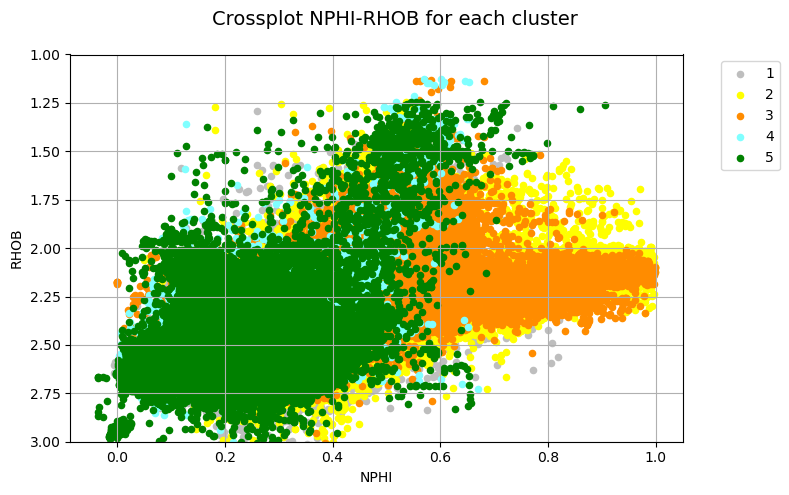

In [439]:
#Crossplot NPHI-RHOB

fig, ax = plt.subplots(figsize=(8,5))
fig.suptitle('Crossplot NPHI-RHOB for each cluster', fontsize=14)
for key, group in grouped_kmeans:
    group.plot(ax=ax, kind='scatter', x='NPHI', y='RHOB', label=key, color=kmeanscolor[key])
    
plt.ylim(3,1)
#plt.xlim(0,200)
plt.grid()
plt.ylabel('RHOB')
plt.xlabel('NPHI')

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.subplots_adjust(top=0.95)
plt.tight_layout()
#plt.savefig('nphirhoball_lowertriassicdata_old.png')
plt.show()

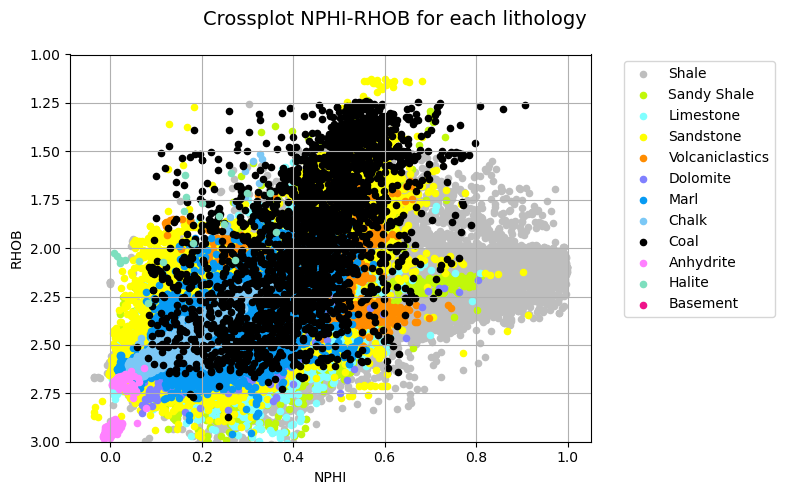

In [440]:
#Crossplot NPHI-RHOB

fig, ax = plt.subplots(figsize=(8,5))
fig.suptitle('Crossplot NPHI-RHOB for each lithology', fontsize=14)
for key, group in grouped_lithology:
    group.plot(ax=ax, kind='scatter', x='NPHI', y='RHOB', label=key, color=litocolor[key])
    
plt.ylim(3,1)
#plt.xlim(0,200)
plt.grid()
plt.ylabel('RHOB')
plt.xlabel('NPHI')

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.subplots_adjust(top=0.95)
plt.tight_layout()
#plt.savefig('nphirhoball_lowertriassicdata_old.png')
plt.show()

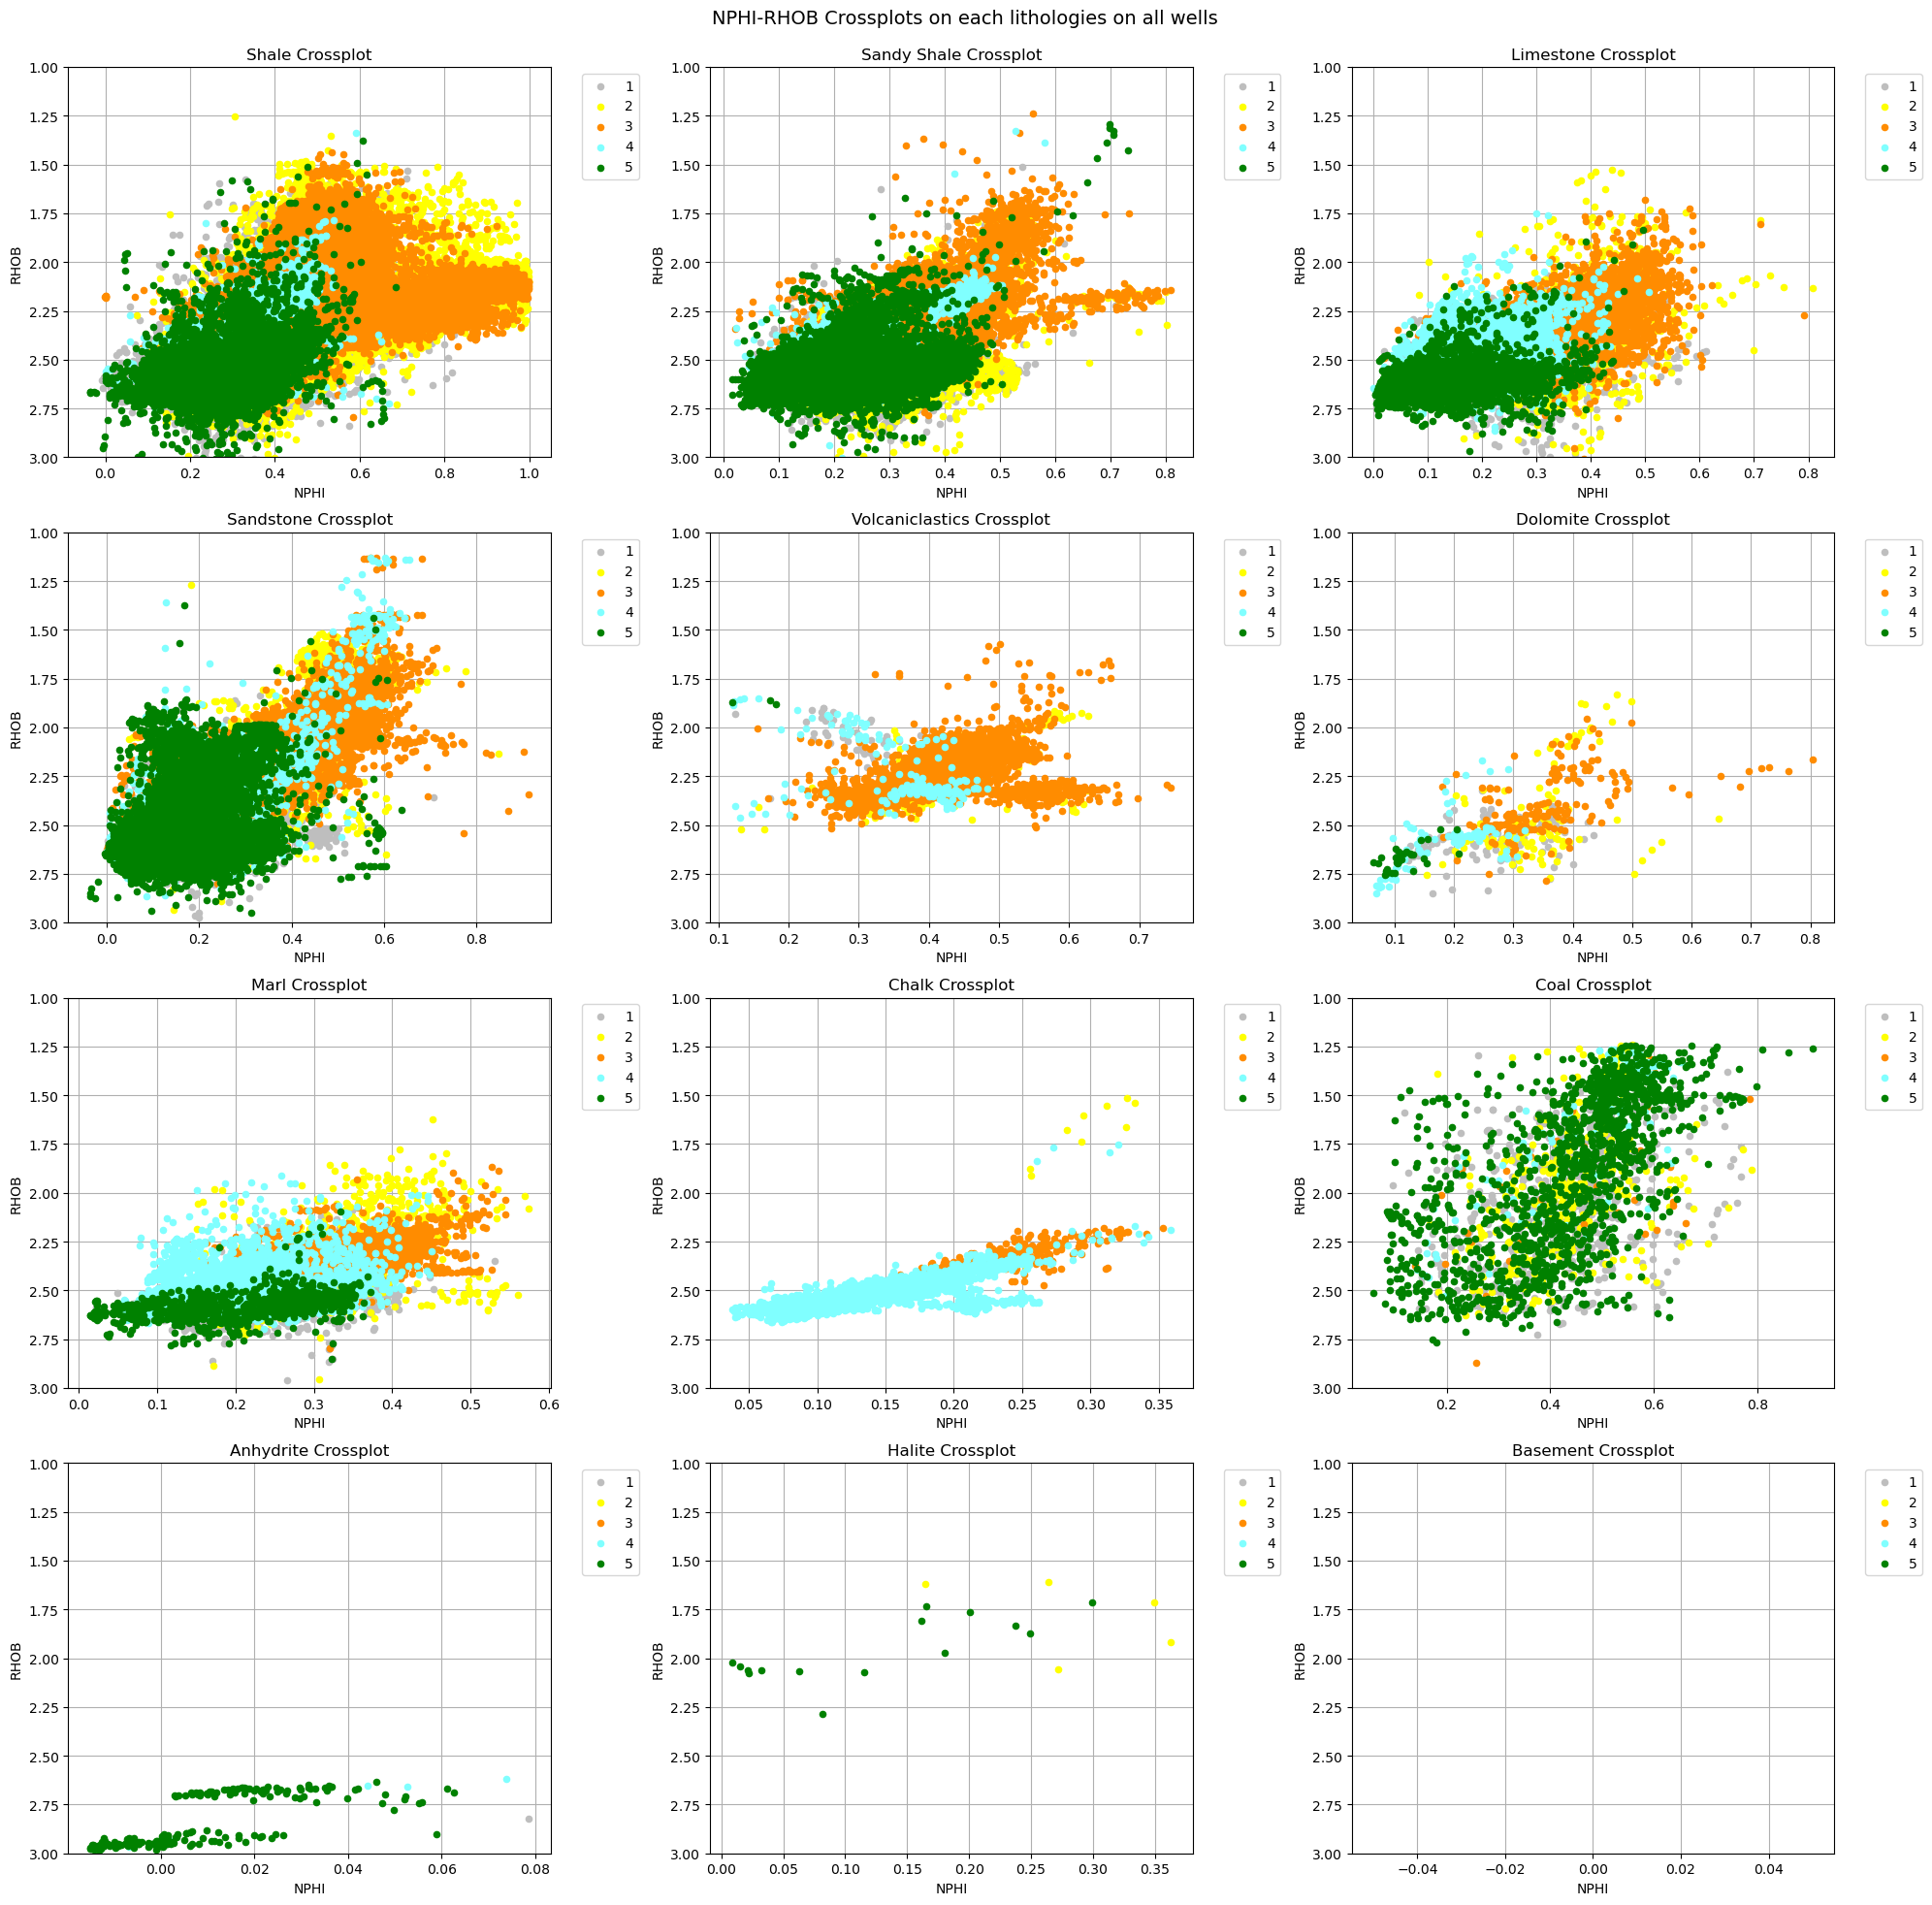

In [449]:
fig = plt.figure(figsize=(20,20))

for i, litho in enumerate(keys_lithology):
    ax=fig.add_subplot(4,3,i+1)
    ax.set_title(litho+" Crossplot")
    ax.set_axisbelow(True)
    fig.suptitle('NPHI-RHOB Crossplots on each lithologies on all wells', fontsize=14)
    
    for key, group in grouped_kmeans:
        group[group['LIT'].isin([litho])].plot(ax=ax, kind='scatter', x='NPHI', y='RHOB', label=key, color=kmeanscolor[key])
    
    ax.set_ylim(3,1)
    #ax.set_xlim(40,240)
    ax.grid()
    ax.set_ylabel('RHOB')
    ax.set_xlabel('NPHI')

    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
#plt.subplots_adjust(top=0.95)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.savefig('nphirhoblithology_triassicdata_new.png')
plt.show()

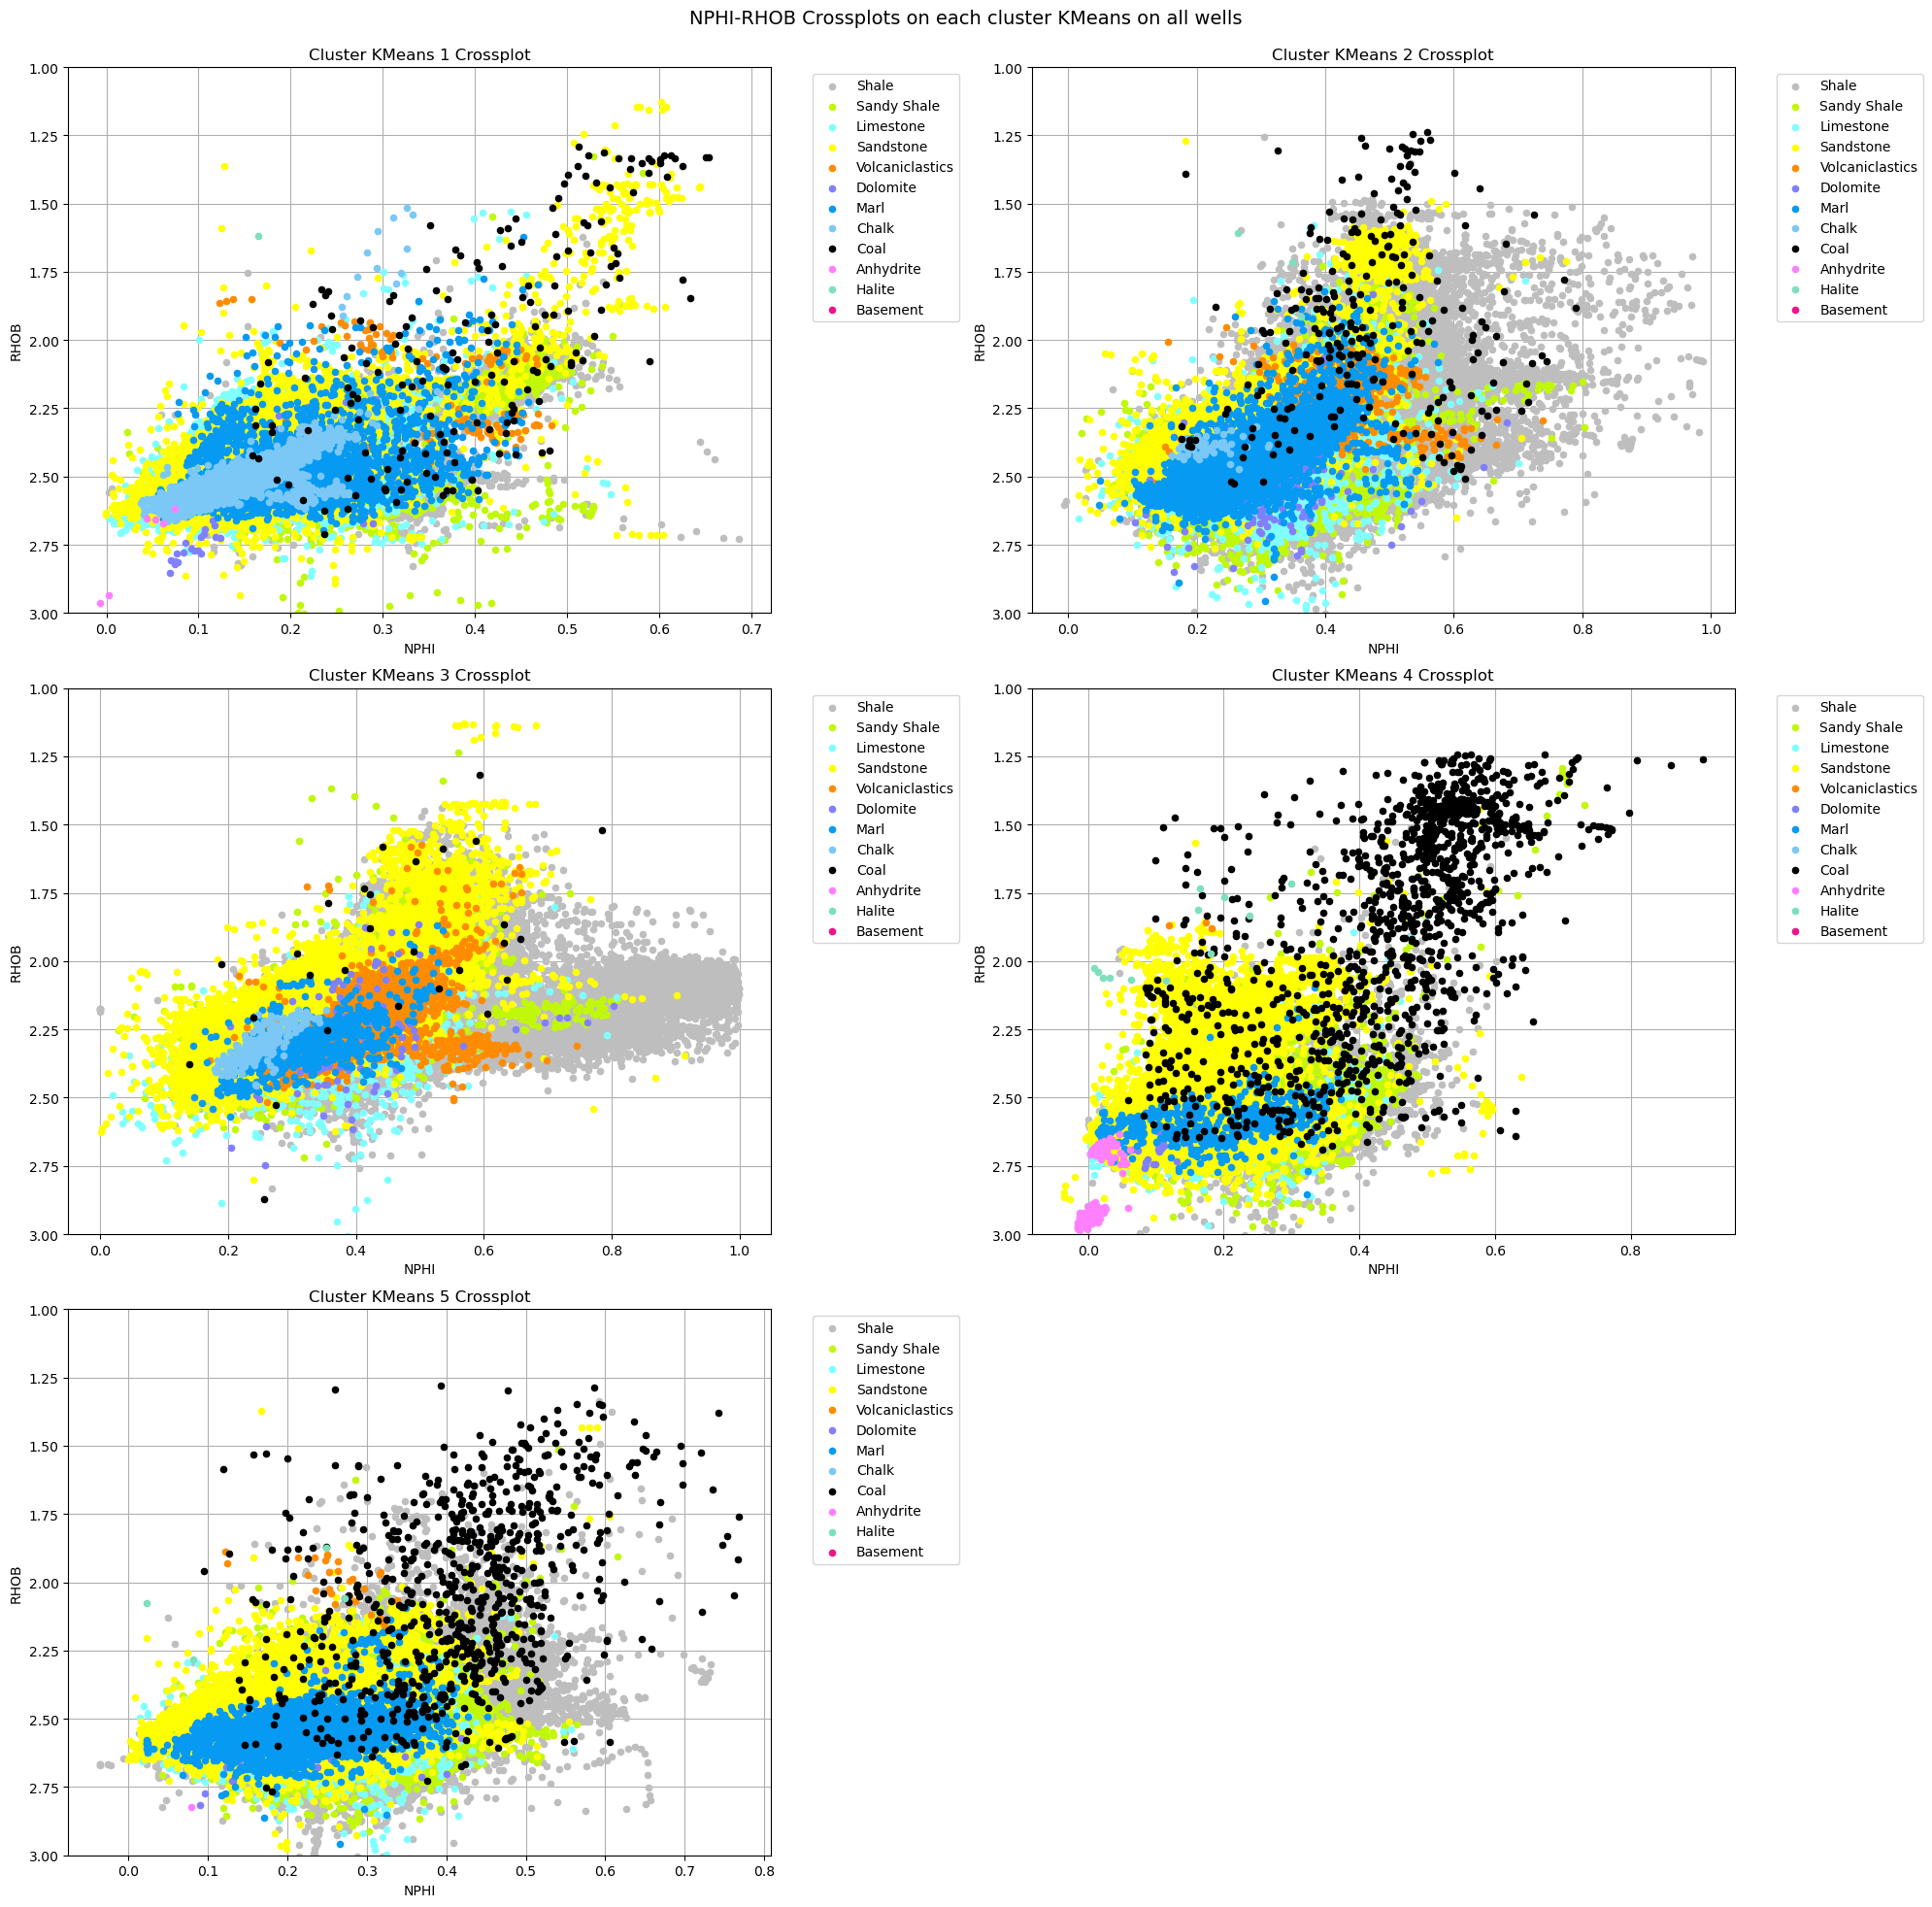

In [450]:
fig = plt.figure(figsize=(20,20))

for i, kmeans in enumerate(keys_kmeans):
    ax=fig.add_subplot(3,2,i+1)
    ax.set_title("Cluster KMeans "+str(kmeans)+" Crossplot")
    ax.set_axisbelow(True)
    fig.suptitle('NPHI-RHOB Crossplots on each cluster KMeans on all wells', fontsize=14)
    
    for key, group in grouped_lithology:
        group[group['KMeans'].isin([kmeans])].plot(ax=ax, kind='scatter', x='NPHI', y='RHOB', label=key, color=litocolor[key])
    
    ax.set_ylim(3,1)
    #ax.set_xlim(40,240)
    ax.grid()
    ax.set_ylabel('RHOB')
    ax.set_xlabel('NPHI')

    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
#plt.subplots_adjust(top=0.95)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.savefig('nphirhoblithology_triassicdata_new.png')
plt.show()

#### GR-RHOB


In [ ]:
#Crossplot GR-RHOB

fig, ax = plt.subplots(figsize=(8,5))
fig.suptitle('Crossplot GR-RHOB for each cluster', fontsize=14)
for key, group in grouped_kmeans:
    group.plot(ax=ax, kind='scatter', x='GR', y='RHOB', label=key, color=kmeanscolor[key])
    
plt.ylim(3,1)
plt.xlim(0,850)
plt.grid()
plt.ylabel('RHOB')
plt.xlabel('GR')

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.subplots_adjust(top=0.95)
plt.tight_layout()
#plt.savefig('GRrhoball_lowertriassicdata_old.png')
plt.show()

In [ ]:
#Crossplot GR-RHOB

fig, ax = plt.subplots(figsize=(8,5))
fig.suptitle('Crossplot GR-RHOB for each lithology', fontsize=14)
for key, group in grouped_lithology:
    group.plot(ax=ax, kind='scatter', x='GR', y='RHOB', label=key, color=litocolor[key])
    
plt.ylim(3,1)
plt.xlim(0,850)
plt.grid()
plt.ylabel('RHOB')
plt.xlabel('GR')

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.subplots_adjust(top=0.95)
plt.tight_layout()
#plt.savefig('GRrhoball_lowertriassicdata_old.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))

for i, litho in enumerate(keys_lithology):
    ax=fig.add_subplot(4,3,i+1)
    ax.set_title(litho+" Crossplot")
    ax.set_axisbelow(True)
    fig.suptitle('GR-RHOB Crossplots on each lithologies on all wells', fontsize=14)
    
    for key, group in grouped_kmeans:
        group[group['LIT'].isin([litho])].plot(ax=ax, kind='scatter', x='GR', y='RHOB', label=key, color=kmeanscolor[key])
    
    ax.set_ylim(3,1)
    ax.set_xlim(0, 850)
    ax.grid()
    ax.set_ylabel('RHOB')
    ax.set_xlabel('GR')

    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
#plt.subplots_adjust(top=0.95)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.savefig('GRrhoblithology_triassicdata_new.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))

for i, kmeans in enumerate(keys_kmeans):
    ax=fig.add_subplot(3,2,i+1)
    ax.set_title("Cluster KMeans "+str(kmeans)+" Crossplot")
    ax.set_axisbelow(True)
    fig.suptitle('GR-RHOB Crossplots on each cluster KMeans on all wells', fontsize=14)
    
    for key, group in grouped_lithology:
        group[group['KMeans'].isin([kmeans])].plot(ax=ax, kind='scatter', x='GR', y='RHOB', label=key, color=litocolor[key])
    
    ax.set_ylim(3,1)
    ax.set_xlim(0, 850)
    ax.grid()
    ax.set_ylabel('RHOB')
    ax.set_xlabel('GR')

    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
#plt.subplots_adjust(top=0.95)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.savefig('GRrhoblithology_triassicdata_new.png')
plt.show()

#### PEF-RHOB


In [ ]:
#Crossplot PEF-RHOB

fig, ax = plt.subplots(figsize=(8,5))
fig.suptitle('Crossplot PEF-RHOB for each cluster', fontsize=14)
for key, group in grouped_kmeans:
    group.plot(ax=ax, kind='scatter', x='PEF', y='RHOB', label=key, color=kmeanscolor[key])
    
plt.ylim(3,1)
plt.xlim(0, 100)
plt.grid()
plt.ylabel('RHOB')
plt.xlabel('PEF')

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.subplots_adjust(top=0.95)
plt.tight_layout()
#plt.savefig('PEFrhoball_lowertriassicdata_old.png')
plt.show()

In [ ]:
#Crossplot PEF-RHOB

fig, ax = plt.subplots(figsize=(8,5))
fig.suptitle('Crossplot PEF-RHOB for each lithology', fontsize=14)
for key, group in grouped_lithology:
    group.plot(ax=ax, kind='scatter', x='PEF', y='RHOB', label=key, color=litocolor[key])
    
plt.ylim(3,1)
plt.xlim(0,100)
plt.grid()
plt.ylabel('RHOB')
plt.xlabel('PEF')

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.subplots_adjust(top=0.95)
plt.tight_layout()
#plt.savefig('PEFrhoball_lowertriassicdata_old.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))

for i, litho in enumerate(keys_lithology):
    ax=fig.add_subplot(4,3,i+1)
    ax.set_title(litho+" Crossplot")
    ax.set_axisbelow(True)
    fig.suptitle('PEF-RHOB Crossplots on each lithologies on all wells', fontsize=14)
    
    for key, group in grouped_kmeans:
        group[group['LIT'].isin([litho])].plot(ax=ax, kind='scatter', x='PEF', y='RHOB', label=key, color=kmeanscolor[key])
    
    ax.set_ylim(3,1)
    ax.set_xlim(0, 100)
    ax.grid()
    ax.set_ylabel('RHOB')
    ax.set_xlabel('PEF')

    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
#plt.subplots_adjust(top=0.95)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.savefig('PEFrhoblithology_triassicdata_new.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))

for i, kmeans in enumerate(keys_kmeans):
    ax=fig.add_subplot(3,2,i+1)
    ax.set_title("Cluster KMeans "+str(kmeans)+" Crossplot")
    ax.set_axisbelow(True)
    fig.suptitle('PEF-RHOB Crossplots on each cluster KMeans on all wells', fontsize=14)
    
    for key, group in grouped_lithology:
        group[group['KMeans'].isin([kmeans])].plot(ax=ax, kind='scatter', x='PEF', y='RHOB', label=key, color=litocolor[key])
    
    ax.set_ylim(3,1)
    ax.set_xlim(0, 100)
    ax.grid()
    ax.set_ylabel('RHOB')
    ax.set_xlabel('PEF')

    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
#plt.subplots_adjust(top=0.95)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.savefig('PEFrhoblithology_triassicdata_new.png')
plt.show()

#### DTC-RHOB


In [ ]:
#Crossplot DTC-RHOB

fig, ax = plt.subplots(figsize=(8,5))
fig.suptitle('Crossplot DTC-RHOB for each cluster', fontsize=14)
for key, group in grouped_kmeans:
    group.plot(ax=ax, kind='scatter', x='DTC', y='RHOB', label=key, color=kmeanscolor[key])
    
plt.ylim(3,1)
plt.xlim(40, 240)
plt.grid()
plt.ylabel('RHOB')
plt.xlabel('DTC')

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.subplots_adjust(top=0.95)
plt.tight_layout()
#plt.savefig('DTCrhoball_lowertriassicdata_old.png')
plt.show()

In [ ]:
#Crossplot DTC-RHOB

fig, ax = plt.subplots(figsize=(8,5))
fig.suptitle('Crossplot DTC-RHOB for each lithology', fontsize=14)
for key, group in grouped_lithology:
    group.plot(ax=ax, kind='scatter', x='DTC', y='RHOB', label=key, color=litocolor[key])
    
plt.ylim(3,1)
plt.xlim(40, 240)
plt.grid()
plt.ylabel('RHOB')
plt.xlabel('DTC')

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.subplots_adjust(top=0.95)
plt.tight_layout()
#plt.savefig('DTCrhoball_lowertriassicdata_old.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))

for i, litho in enumerate(keys_lithology):
    ax=fig.add_subplot(4,3,i+1)
    ax.set_title(litho+" Crossplot")
    ax.set_axisbelow(True)
    fig.suptitle('DTC-RHOB Crossplots on each lithologies on all wells', fontsize=14)
    
    for key, group in grouped_kmeans:
        group[group['LIT'].isin([litho])].plot(ax=ax, kind='scatter', x='DTC', y='RHOB', label=key, color=kmeanscolor[key])
    
    ax.set_ylim(3,1)
    ax.set_xlim(40,240)
    ax.grid()
    ax.set_ylabel('RHOB')
    ax.set_xlabel('DTC')

    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
#plt.subplots_adjust(top=0.95)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.savefig('DTCrhoblithology_triassicdata_new.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))

for i, kmeans in enumerate(keys_kmeans):
    ax=fig.add_subplot(3,2,i+1)
    ax.set_title("Cluster KMeans "+str(kmeans)+" Crossplot")
    ax.set_axisbelow(True)
    fig.suptitle('DTC-RHOB Crossplots on each cluster KMeans on all wells', fontsize=14)
    
    for key, group in grouped_lithology:
        group[group['KMeans'].isin([kmeans])].plot(ax=ax, kind='scatter', x='DTC', y='RHOB', label=key, color=litocolor[key])
    
    ax.set_ylim(3,1)
    ax.set_xlim(40,240)
    ax.grid()
    ax.set_ylabel('RHOB')
    ax.set_xlabel('DTC')

    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
#plt.subplots_adjust(top=0.95)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.savefig('DTCrhoblithology_triassicdata_new.png')
plt.show()

### Histograms


#### Histogram for cluster-lithology with frequency matrix (crosstab)


##### Frequency matrix

In [378]:
# calculate the distribution of `Clicked` per `Rank`
distribution1 = pd.crosstab(well_clustered.KMeans, well_clustered.LIT, normalize='index')
distribution1

LIT     Anhydrite     Chalk      Coal  Dolomite    Halite  Limestone  \
KMeans                                                                 
1        0.000000  0.000249  0.004080  0.001506  0.000073   0.019552   
2        0.003135  0.000000  0.023452  0.000492  0.000246   0.052713   
3        0.000007  0.000000  0.004198  0.000758  0.000000   0.030209   
4        0.000111  0.082630  0.002443  0.001932  0.000000   0.463737   
5        0.000000  0.001491  0.000209  0.000911  0.000000   0.019063   

LIT         Marl  Sandstone  Sandy Shale     Shale  Volcaniclastics  
KMeans                                                               
1       0.017139   0.101107     0.086951  0.763362         0.005981  
2       0.018200   0.250829     0.304067  0.346818         0.000049  
3       0.044679   0.091496     0.173491  0.654738         0.000425  
4       0.084273   0.229748     0.047522  0.083829         0.003775  
5       0.019359   0.161067     0.051363  0.730807         0.015730

In [379]:
distribution2 = pd.crosstab(well_clustered.KMeans, well_clustered.LIT, normalize='columns')
distribution2

LIT     Anhydrite     Chalk      Coal  Dolomite  Halite  Limestone      Marl  \
KMeans                                                                         
1        0.000000  0.004217  0.111555  0.200000    0.25   0.039559  0.070125   
2        0.969543  0.000000  0.571371  0.058252    0.75   0.095035  0.066356   
3        0.005076  0.000000  0.256697  0.225243    0.00   0.136694  0.408843   
4        0.025381  0.923096  0.043982  0.168932    0.00   0.617877  0.227069   
5        0.000000  0.072687  0.016393  0.347573    0.00   0.110835  0.227607   

LIT     Sandstone  Sandy Shale     Shale  Volcaniclastics  
KMeans                                                     
1        0.088429     0.094023  0.162697         0.109417  
2        0.195480     0.292979  0.065866         0.000803  
3        0.178968     0.419560  0.312090         0.017389  
4        0.132324     0.033839  0.011766         0.045479  
5        0.404799     0.159598  0.447581         0.826913

In [380]:
distribution3 = pd.crosstab(well_clustered.LIT, well_clustered.KMeans, normalize='index')
distribution3

KMeans                  1         2         3         4         5
LIT                                                              
Anhydrite        0.000000  0.969543  0.005076  0.025381  0.000000
Chalk            0.004217  0.000000  0.000000  0.923096  0.072687
Coal             0.111555  0.571371  0.256697  0.043982  0.016393
Dolomite         0.200000  0.058252  0.225243  0.168932  0.347573
Halite           0.250000  0.750000  0.000000  0.000000  0.000000
Limestone        0.039559  0.095035  0.136694  0.617877  0.110835
Marl             0.070125  0.066356  0.408843  0.227069  0.227607
Sandstone        0.088429  0.195480  0.178968  0.132324  0.404799
Sandy Shale      0.094023  0.292979  0.419560  0.033839  0.159598
Shale            0.162697  0.065866  0.312090  0.011766  0.447581
Volcaniclastics  0.109417  0.000803  0.017389  0.045479  0.826913

In [381]:
distribution4 = pd.crosstab(well_clustered.LIT, well_clustered.KMeans, normalize='columns')
distribution4

KMeans                  1         2         3         4         5
LIT                                                              
Anhydrite        0.000000  0.003135  0.000007  0.000111  0.000000
Chalk            0.000249  0.000000  0.000000  0.082630  0.001491
Coal             0.004080  0.023452  0.004198  0.002443  0.000209
Dolomite         0.001506  0.000492  0.000758  0.001932  0.000911
Halite           0.000073  0.000246  0.000000  0.000000  0.000000
Limestone        0.019552  0.052713  0.030209  0.463737  0.019063
Marl             0.017139  0.018200  0.044679  0.084273  0.019359
Sandstone        0.101107  0.250829  0.091496  0.229748  0.161067
Sandy Shale      0.086951  0.304067  0.173491  0.047522  0.051363
Shale            0.763362  0.346818  0.654738  0.083829  0.730807
Volcaniclastics  0.005981  0.000049  0.000425  0.003775  0.015730

##### Histogram result

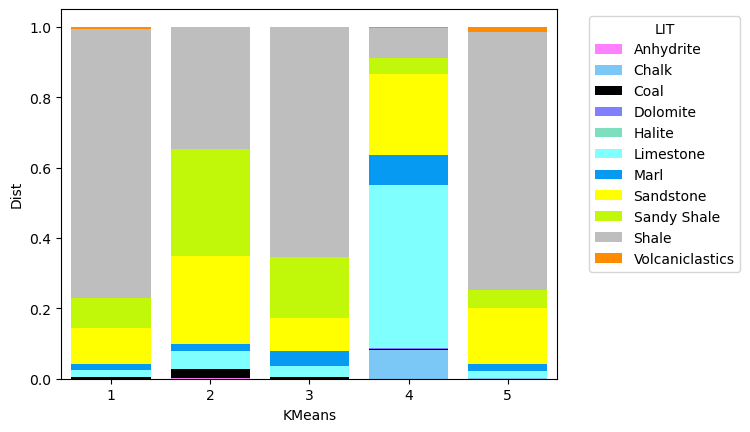

In [382]:
# plot the cumsum, with reverse hue order
ax=sns.barplot(data=distribution1.cumsum(axis=1).stack().reset_index(name='Dist'),
            x='KMeans', y='Dist', hue='LIT',
            hue_order = distribution1.columns[::-1],   # reverse hue order so that the taller bars got plotted first
            palette=litocolor, saturation=1, linewidth=1, 
            dodge=False)

sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0), reverse=True)
#plt.setp(ax.get_xticklabels(), rotation=90)

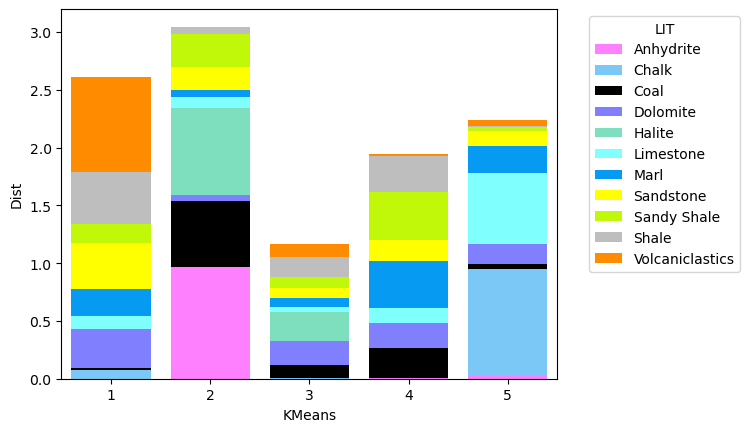

In [350]:
# plot the cumsum, with reverse hue order
ax=sns.barplot(data=distribution2.cumsum(axis=1).stack().reset_index(name='Dist'),
            x='KMeans', y='Dist', hue='LIT',
            hue_order = distribution2.columns[::-1],   # reverse hue order so that the taller bars got plotted first
            palette=litocolor, saturation=1,
            dodge=False)

sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0), reverse=True)
#plt.setp(ax.get_xticklabels(), rotation=90)

[None, None, None, None, None, None, None, None, None, None, None, None]

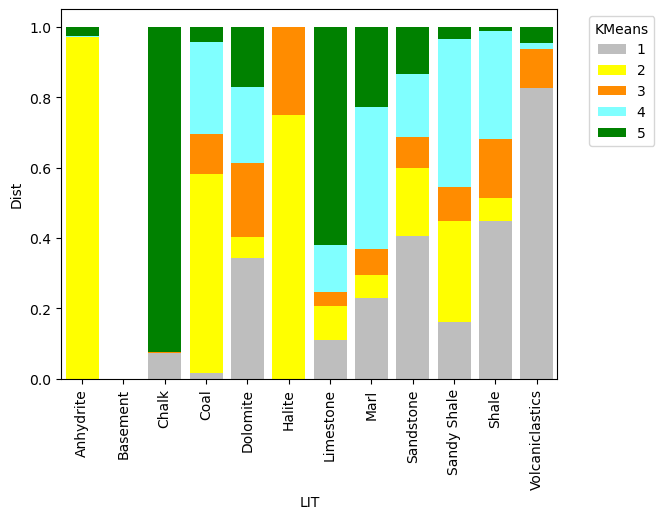

In [351]:
# plot the cumsum, with reverse hue order
ax=sns.barplot(data=distribution3.cumsum(axis=1).stack().reset_index(name='Dist'),
            x='LIT', y='Dist', hue='KMeans',
            hue_order = distribution3.columns[::-1],   # reverse hue order so that the taller bars got plotted first
            palette=kmeanscolor, saturation=1,
            dodge=False)

sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0), reverse=True)
plt.setp(ax.get_xticklabels(), rotation=90)

[None, None, None, None, None, None, None, None, None, None, None, None]

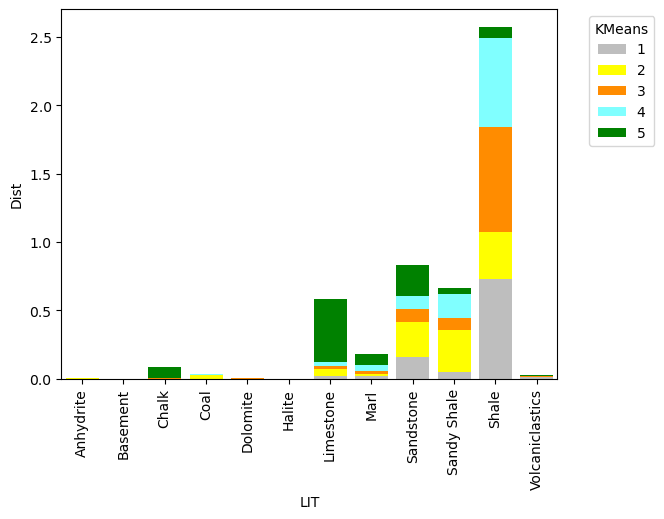

In [352]:
# plot the cumsum, with reverse hue order
ax=sns.barplot(data=distribution4.cumsum(axis=1).stack().reset_index(name='Dist'),
            x='LIT', y='Dist', hue='KMeans',
            hue_order = distribution4.columns[::-1],   # reverse hue order so that the taller bars got plotted first
            palette=kmeanscolor, saturation=1,
            dodge=False)

sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0), reverse=True)
plt.setp(ax.get_xticklabels(), rotation=90)

#### Histogram for cluster-lithology


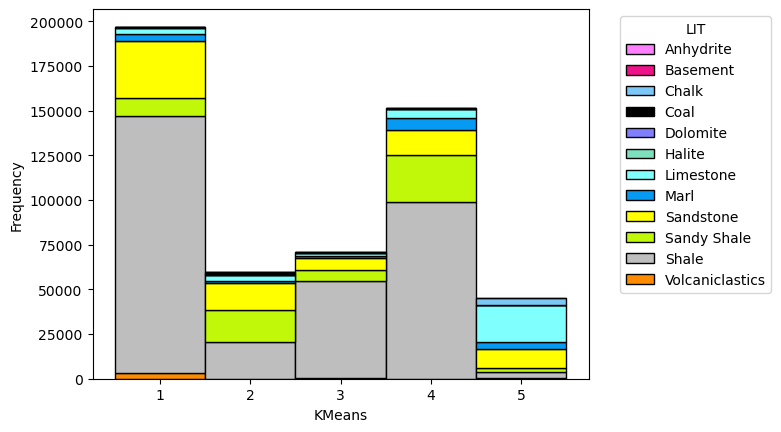

In [323]:
ax=sns.histplot(data=well_clustered, x='KMeans', hue='LIT', stat='frequency', multiple='stack', alpha=1, discrete=True, fill=True,  palette=litocolor, common_norm=False)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))

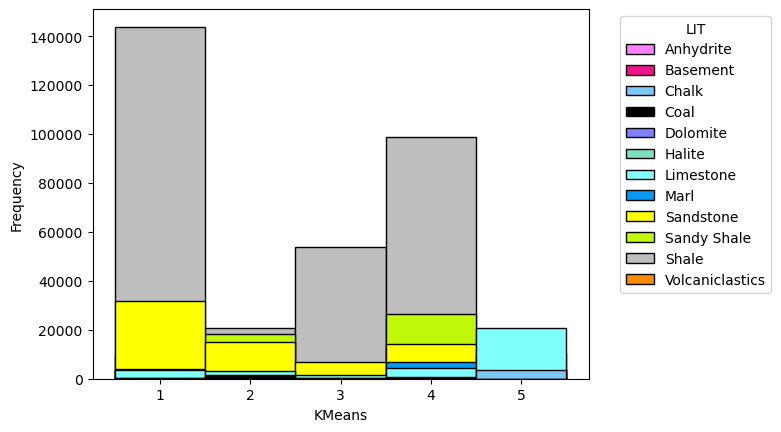

In [324]:
ax=sns.histplot(data=well_clustered, x='KMeans', hue='LIT', stat='frequency', multiple='layer', alpha=1, discrete=True, fill=True,  palette=litocolor, common_norm=False)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))

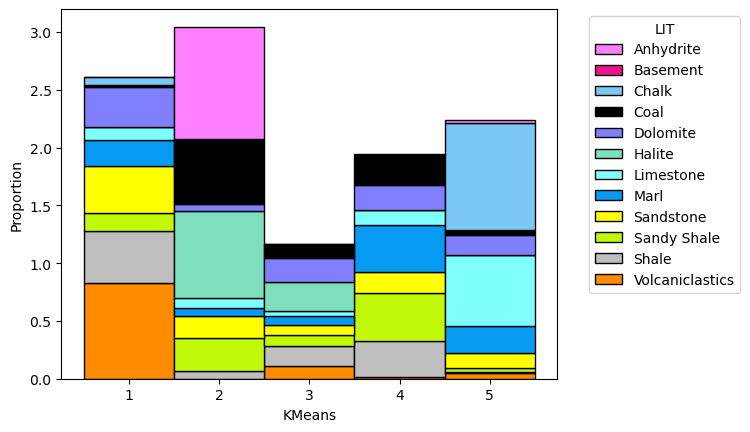

In [325]:
ax=sns.histplot(data=well_clustered, x='KMeans', hue='LIT', stat='proportion', multiple='stack', alpha=1, discrete=True, fill=True,  palette=litocolor, common_norm=False)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))

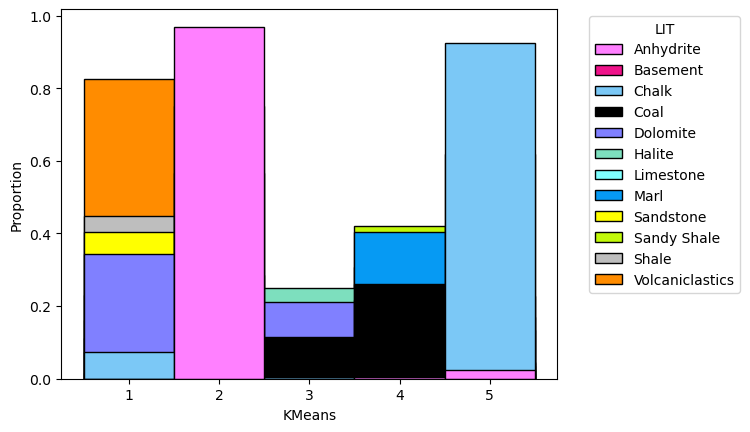

In [326]:
ax=sns.histplot(data=well_clustered, x='KMeans', hue='LIT', stat='proportion', multiple='layer', alpha=1, discrete=True, fill=True,  palette=litocolor, common_norm=False)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))

[None, None, None, None, None, None, None, None, None, None, None, None]

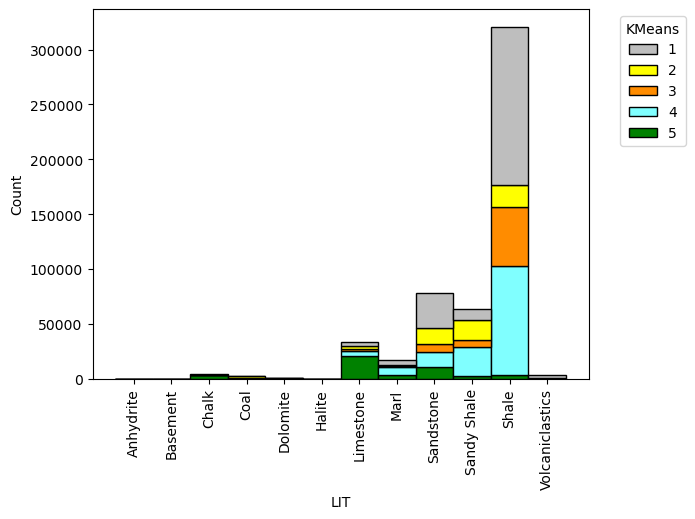

In [327]:
ax=sns.histplot(data=well_clustered, x='LIT', hue='KMeans', stat='count', multiple='stack', alpha=1, discrete=True, fill=True,  palette=kmeanscolor, common_norm=False)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.setp(ax.get_xticklabels(), rotation=90)

[None, None, None, None, None, None, None, None, None, None, None, None]

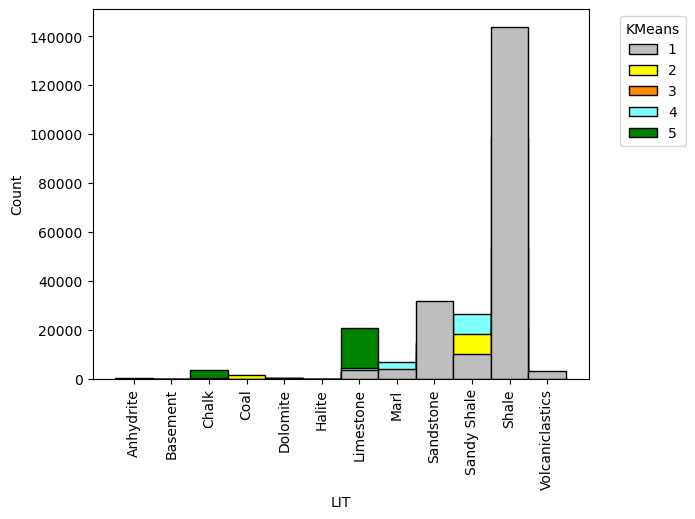

In [328]:
ax=sns.histplot(data=well_clustered, x='LIT', hue='KMeans', stat='count', multiple='layer', alpha=1, discrete=True, fill=True,  palette=kmeanscolor, common_norm=False)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.setp(ax.get_xticklabels(), rotation=90)

[None, None, None, None, None, None, None, None, None, None, None, None]

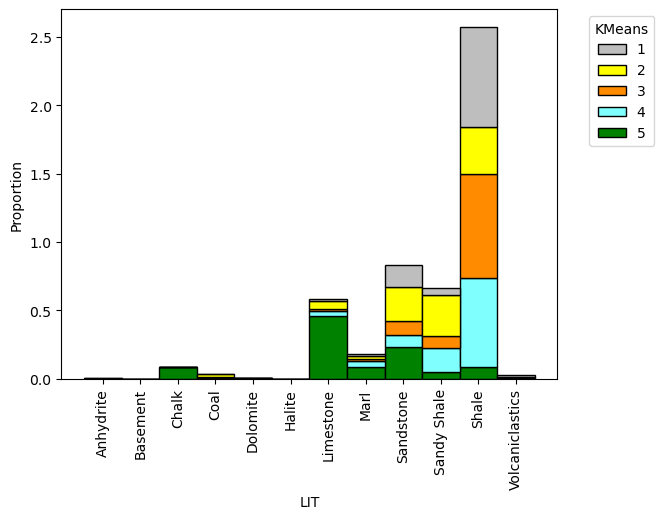

In [329]:
ax=sns.histplot(data=well_clustered, x='LIT', hue='KMeans', stat='proportion', multiple='stack', alpha=1, discrete=True, fill=True,  palette=kmeanscolor, common_norm=False)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.setp(ax.get_xticklabels(), rotation=90)

[None, None, None, None, None, None, None, None, None, None, None, None]

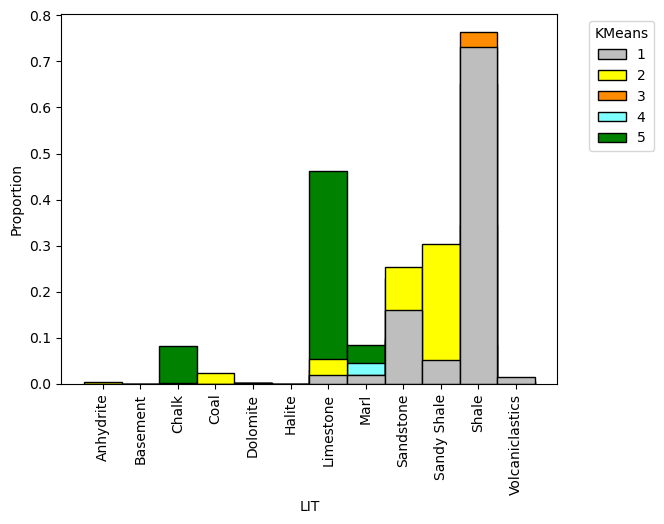

In [330]:
ax=sns.histplot(data=well_clustered, x='LIT', hue='KMeans', stat='proportion', multiple='layer', alpha=1, discrete=True, fill=True,  palette=kmeanscolor, common_norm=False)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.setp(ax.get_xticklabels(), rotation=90)

#### Histogram for cluster-lithology (detail)


In [ ]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Histogram of KMeans distributions in each lithology on all wells')

for i, feature in enumerate(keys_lithology):
    ax=fig.add_subplot(4,3,i+1)
    ax.set_title(feature+" Distribution")
    ax.set_axisbelow(True)
    
    
    if well_clustered[well_clustered['LIT']==feature]['KMeans'].unique().sum()==0:
        pass
    else:
        ax=sns.histplot(data=well_clustered[well_clustered['LIT']==feature], x='KMeans', hue='KMeans', palette=kmeanscolor, stat='proportion', multiple='stack', alpha=1, discrete=True, binrange=(1,5), fill=True, legend=False, common_norm=True)

    ax.grid()

plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.subplots_adjust(hspace=0.15, wspace=0.5)
#plt.savefig('histogramlithology_stackproportion_triassicdata_new.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Histogram of KMeans distributions in each lithology on all wells')

for i, feature in enumerate(keys_lithology):
    ax=fig.add_subplot(4,3,i+1)
    ax.set_title(feature+" Distribution")
    ax.set_axisbelow(True)
    
    
    if well_clustered[well_clustered['LIT']==feature]['KMeans'].unique().sum()==0:
        pass
    else:
        ax=sns.histplot(data=well_clustered[well_clustered['LIT']==feature], x='KMeans', hue='KMeans', palette=kmeanscolor, stat='proportion', multiple='layer', alpha=1, discrete=True, binrange=(1,5), fill=True, legend=False, common_norm=True)

    ax.grid()

plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.subplots_adjust(hspace=0.15, wspace=0.5)
#plt.savefig('histogramlithology_layerproportion_triassicdata_new.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Histogram of KMeans distributions in each lithology on all wells')

for i, feature in enumerate(keys_lithology):
    ax=fig.add_subplot(4,3,i+1)
    ax.set_title(feature+" Distribution")
    ax.set_axisbelow(True)
    
    
    if well_clustered[well_clustered['LIT']==feature]['KMeans'].unique().sum()==0:
        pass
    else:
        ax=sns.histplot(data=well_clustered[well_clustered['LIT']==feature], x='KMeans', hue='KMeans', palette=kmeanscolor, stat='count', multiple='stack', alpha=1, discrete=True, binrange=(1,5), fill=True, legend=False, common_norm=True)

    ax.grid()

plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.subplots_adjust(hspace=0.15, wspace=0.5)
#plt.savefig('histogramlithology_stackcount_triassicdata_new.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Histogram of KMeans distributions in each lithology on all wells')

for i, feature in enumerate(keys_lithology):
    ax=fig.add_subplot(4,3,i+1)
    ax.set_title(feature+" Distribution")
    ax.set_axisbelow(True)
    
    
    if well_clustered[well_clustered['LIT']==feature]['KMeans'].unique().sum()==0:
        pass
    else:
        ax=sns.histplot(data=well_clustered[well_clustered['LIT']==feature], x='KMeans', hue='KMeans', palette=kmeanscolor, stat='count', multiple='layer', alpha=1, discrete=True, binrange=(1,5), fill=True, legend=False, common_norm=True)

    ax.grid()

plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.subplots_adjust(hspace=0.15, wspace=0.5)
#plt.savefig('histogramlithology_layercount_triassicdata_new.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Histogram of lithology distributions in each KMeans clusters on all wells')

for i, feature in enumerate(keys_kmeans):
    ax=fig.add_subplot(3,2,i+1)
    ax.set_title("Cluster KMeans "+str(feature)+" Distribution")
    ax.set_axisbelow(True)
    
    
    ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==feature], x='LIT', hue='LIT', palette=litocolor, stat='proportion', multiple='stack', alpha=1, discrete=True, fill=True, legend=False, common_norm=True)

    ax.grid()

plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.subplots_adjust(hspace=0.15, wspace=0.5)
#plt.savefig('histogramlithology_stackproportion_triassicdata_new.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Histogram of lithology distributions in each KMeans clusters on all wells')

for i, feature in enumerate(keys_kmeans):
    ax=fig.add_subplot(3,2,i+1)
    ax.set_title("Cluster KMeans "+str(feature)+" Distribution")
    ax.set_axisbelow(True)
    
    
    ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==feature], x='LIT', hue='LIT', palette=litocolor, stat='proportion', multiple='layer', alpha=1, discrete=True, fill=True, legend=False, common_norm=True)

    ax.grid()

plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.subplots_adjust(hspace=0.15, wspace=0.5)
#plt.savefig('histogramlithology_layerproportion_triassicdata_new.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Histogram of lithology distributions in each KMeans clusters on all wells')

for i, feature in enumerate(keys_kmeans):
    ax=fig.add_subplot(3,2,i+1)
    ax.set_title("Cluster KMeans "+str(feature)+" Distribution")
    ax.set_axisbelow(True)
    
    
    ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==feature], x='LIT', hue='LIT', palette=litocolor, stat='count', multiple='stack', alpha=1, discrete=True, fill=True, legend=False, common_norm=True)

    ax.grid()

plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.subplots_adjust(hspace=0.15, wspace=0.5)
#plt.savefig('histogramlithology_stackcount_triassicdata_new.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Histogram of lithology distributions in each KMeans clusters on all wells')

for i, feature in enumerate(keys_kmeans):
    ax=fig.add_subplot(3,2,i+1)
    ax.set_title("Cluster KMeans "+str(feature)+" Distribution")
    ax.set_axisbelow(True)
    
    
    ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==feature], x='LIT', hue='LIT', palette=litocolor, stat='count', multiple='layer', alpha=1, discrete=True, fill=True, legend=False, common_norm=True)

    ax.grid()

plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.subplots_adjust(hspace=0.15, wspace=0.5)
#plt.savefig('histogramlithology_layercount_triassicdata_new.png')
plt.show()

#### Histogram for each well logs (cluster group, lithology hue)


##### On all clusters

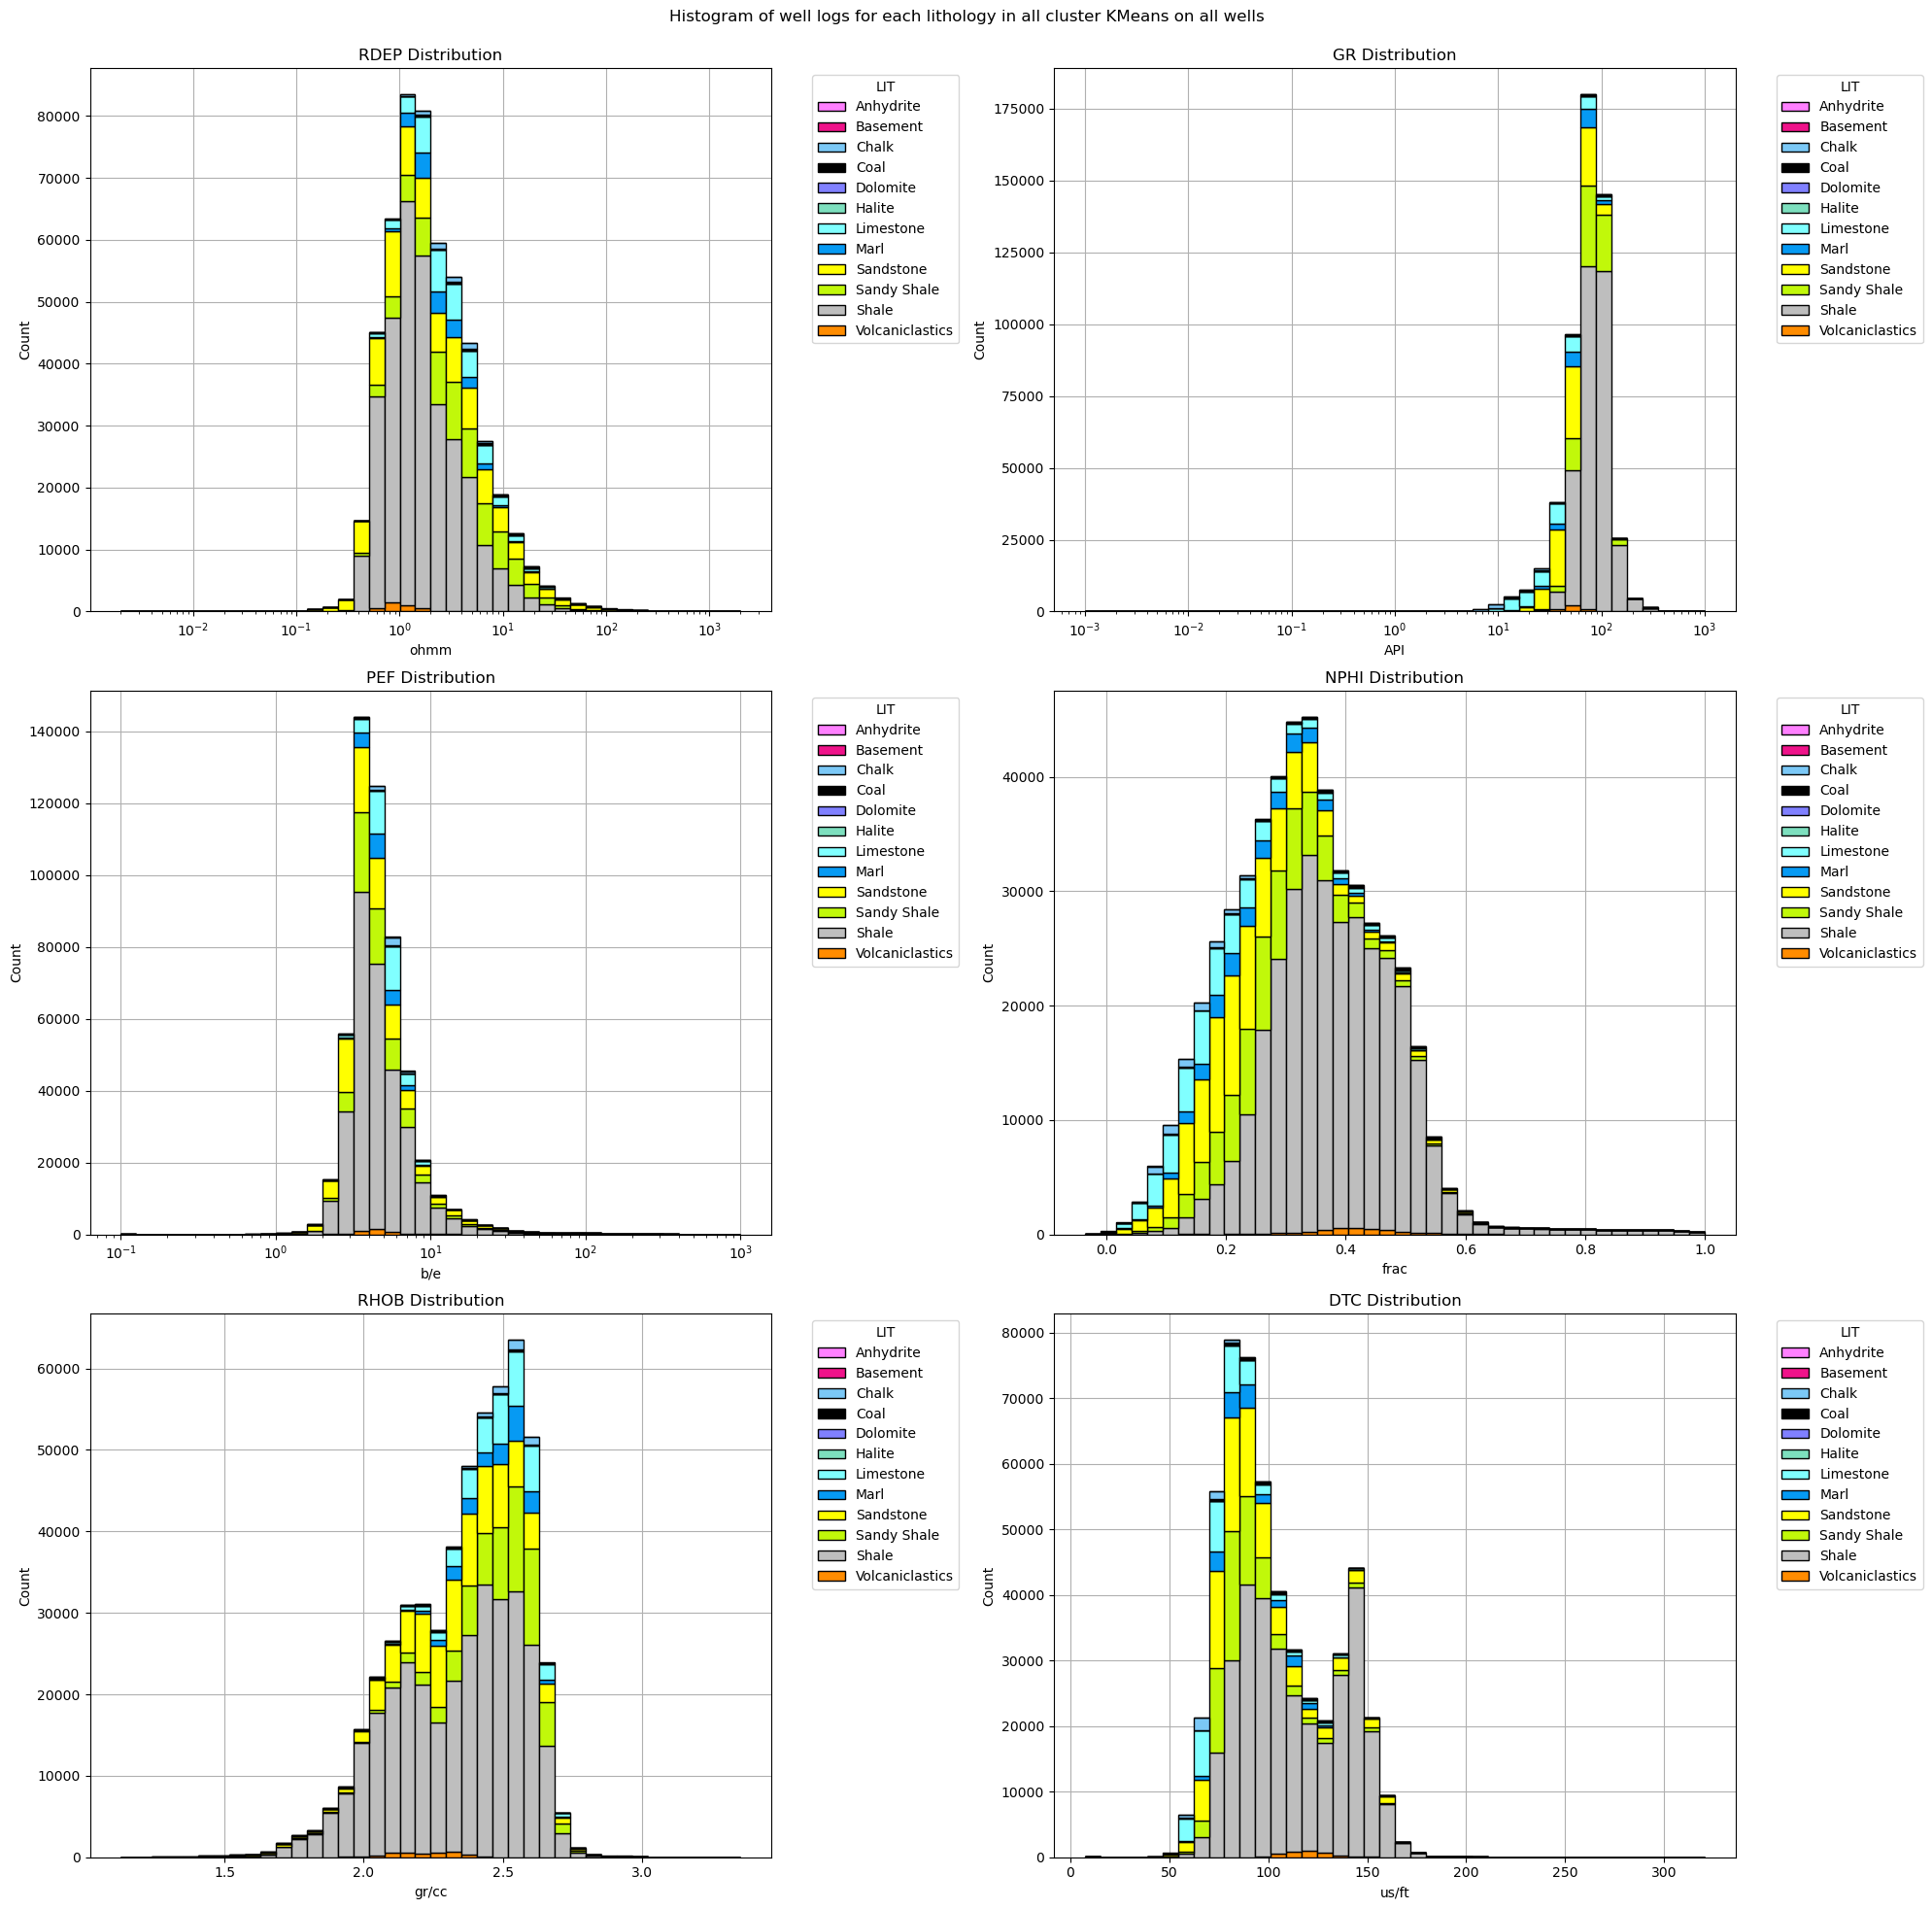

In [151]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Histogram of well logs for each lithology in all cluster KMeans on all wells')

for i, feature in enumerate(well_clustered_curves):
    ax=fig.add_subplot(3,2,i+1)
    ax.set_title(feature+" Distribution")
    ax.set_axisbelow(True)
        
    if i==0:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.002),np.log10(2000),40), ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='count', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.002),np.log10(2000)), fill=True, log_scale=True, palette=litocolor, common_norm=False)
        ax.set_xscale("log")
        ax.set_xlabel('ohmm')
    elif i==1:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.001),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='count', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.001),np.log10(1000)), fill=True, log_scale=True, palette=litocolor, common_norm=False)
        ax.set_xscale("log")
        ax.set_xlabel('API')
    elif i==2:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.1),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='count', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.1),np.log10(1000)),fill=True, log_scale=True, palette=litocolor, common_norm=False)
        ax.set_xscale("log")
        ax.set_xlabel('b/e')
    elif i==3:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='count', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
        ax.set_xscale("linear")
        ax.set_xlabel('frac')
    elif i==4:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='count', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
        ax.set_xscale("linear")
        ax.set_xlabel('gr/cc')
  
    #elif i==5:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
        #ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='count', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
        #ax.set_xscale("linear")
        #ax.set_xlabel('mV')

    else:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='count', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
        ax.set_xscale("linear")
        ax.set_xlabel('us/ft')

    sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
    ax.grid()


plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.subplots_adjust(hspace=0.15, wspace=0.5)
#plt.savefig('histogramlithology_stackcount_triassicdata_new.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Histogram of well logs for each lithology in all cluster KMeans on all wells')

for i, feature in enumerate(well_clustered_curves):
    ax=fig.add_subplot(3,2,i+1)
    ax.set_title(feature+" Distribution")
    ax.set_axisbelow(True)
        
    if i==0:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.002),np.log10(2000),40), ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='proportion', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.002),np.log10(2000)), fill=True, log_scale=True, palette=litocolor, common_norm=False)
        ax.set_xscale("log")
        ax.set_xlabel('ohmm')
    elif i==1:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.001),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='proportion', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.001),np.log10(1000)), fill=True, log_scale=True, palette=litocolor, common_norm=False)
        ax.set_xscale("log")
        ax.set_xlabel('API')
    elif i==2:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.1),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='proportion', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.1),np.log10(1000)),fill=True, log_scale=True, palette=litocolor, common_norm=False)
        ax.set_xscale("log")
        ax.set_xlabel('b/e')
    elif i==3:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='proportion', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
        ax.set_xscale("linear")
        ax.set_xlabel('frac')
    elif i==4:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='proportion', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
        ax.set_xscale("linear")
        ax.set_xlabel('gr/cc')
  
    #elif i==5:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
        #ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='proportion', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
        #ax.set_xscale("linear")
        #ax.set_xlabel('mV')

    else:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='proportion', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
        ax.set_xscale("linear")
        ax.set_xlabel('us/ft')

    sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
    ax.grid()


plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.subplots_adjust(hspace=0.15, wspace=0.5)
#plt.savefig('histogramlithology_stackproportion_triassicdata_new.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Histogram of well logs for each lithology in all cluster KMeans on all wells')

for i, feature in enumerate(well_clustered_curves):
    ax=fig.add_subplot(3,2,i+1)
    ax.set_title(feature+" Distribution")
    ax.set_axisbelow(True)
        
    if i==0:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.002),np.log10(2000),40), ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='count', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.002),np.log10(2000)), fill=True, log_scale=True, palette=litocolor, common_norm=False)
        ax.set_xscale("log")
        ax.set_xlabel('ohmm')
    elif i==1:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.001),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='count', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.001),np.log10(1000)), fill=True, log_scale=True, palette=litocolor, common_norm=False)
        ax.set_xscale("log")
        ax.set_xlabel('API')
    elif i==2:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.1),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='count', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.1),np.log10(1000)),fill=True, log_scale=True, palette=litocolor, common_norm=False)
        ax.set_xscale("log")
        ax.set_xlabel('b/e')
    elif i==3:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='count', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
        ax.set_xscale("linear")
        ax.set_xlabel('frac')
    elif i==4:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='count', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
        ax.set_xscale("linear")
        ax.set_xlabel('gr/cc')
  
    #elif i==5:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
        #ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='count', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
        #ax.set_xscale("linear")
        #ax.set_xlabel('mV')

    else:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='count', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
        ax.set_xscale("linear")
        ax.set_xlabel('us/ft')

    sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
    ax.grid()


plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.subplots_adjust(hspace=0.15, wspace=0.5)
#plt.savefig('histogramlithology_layercount_triassicdata_new.png')
plt.show()

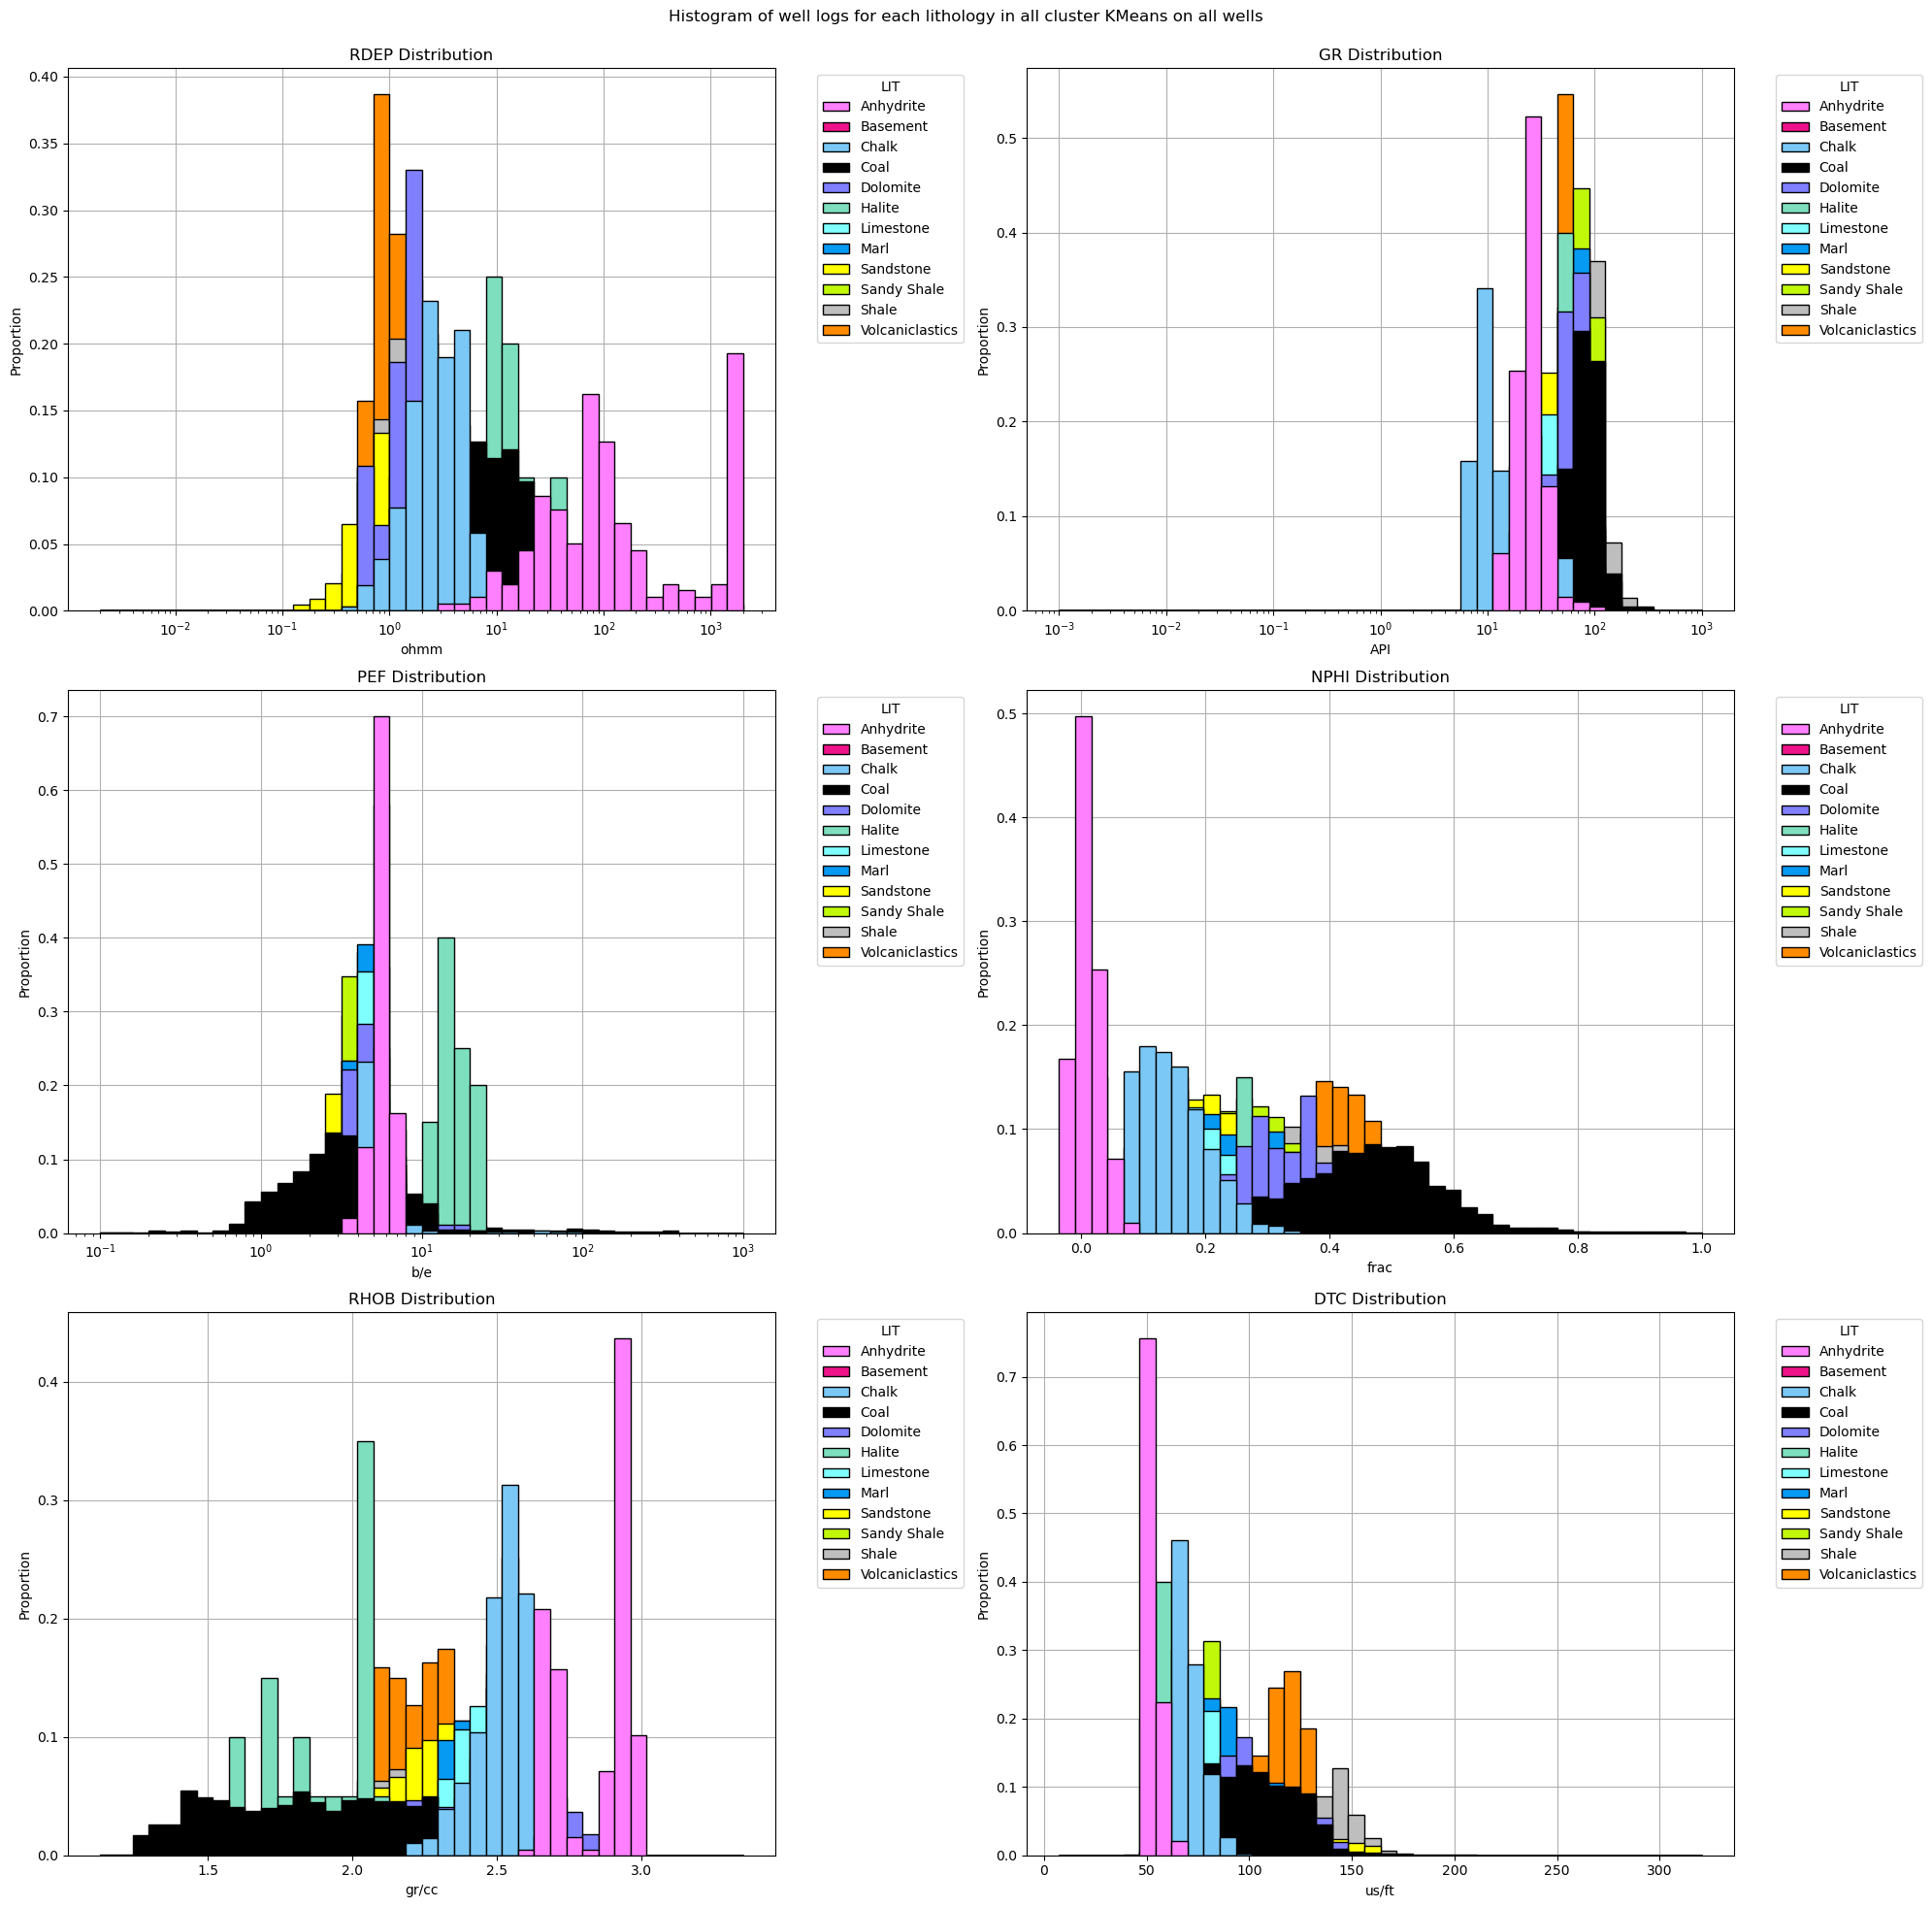

In [153]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Histogram of well logs for each lithology in all cluster KMeans on all wells')

for i, feature in enumerate(well_clustered_curves):
    ax=fig.add_subplot(3,2,i+1)
    ax.set_title(feature+" Distribution")
    ax.set_axisbelow(True)
        
    if i==0:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.002),np.log10(2000),40), ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='proportion', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.002),np.log10(2000)), fill=True, log_scale=True, palette=litocolor, common_norm=False)
        ax.set_xscale("log")
        ax.set_xlabel('ohmm')
    elif i==1:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.001),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='proportion', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.001),np.log10(1000)), fill=True, log_scale=True, palette=litocolor, common_norm=False)
        ax.set_xscale("log")
        ax.set_xlabel('API')
    elif i==2:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.1),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='proportion', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.1),np.log10(1000)),fill=True, log_scale=True, palette=litocolor, common_norm=False)
        ax.set_xscale("log")
        ax.set_xlabel('b/e')
    elif i==3:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='proportion', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
        ax.set_xscale("linear")
        ax.set_xlabel('frac')
    elif i==4:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='proportion', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
        ax.set_xscale("linear")
        ax.set_xlabel('gr/cc')
  
    #elif i==5:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
        #ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='proportion', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
        #ax.set_xscale("linear")
        #ax.set_xlabel('mV')

    else:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='LIT', stat='proportion', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
        ax.set_xscale("linear")
        ax.set_xlabel('us/ft')

    sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
    ax.grid()


plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.subplots_adjust(hspace=0.15, wspace=0.5)
#plt.savefig('histogramlithology_layerproportion_triassicdata_new.png')
plt.show()

##### On each cluster KMeans

In [ ]:
for i, kmeans in enumerate(keys_kmeans):
    fig = plt.figure(figsize=(20,20))
    fig.suptitle('Histogram of well logs for each lithology in cluster KMeans '+str(kmeans)+ ' on all wells')

    for i, feature in enumerate(well_clustered_curves):
        ax=fig.add_subplot(3,2,i+1)
        ax.set_title(feature+" Distribution")
        ax.set_axisbelow(True)
            
        if i==0:
            #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.002),np.log10(2000),40), ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='count', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.002),np.log10(2000)), fill=True, log_scale=True, palette=litocolor, common_norm=False)
            ax.set_xscale("log")
            ax.set_xlabel('ohmm')
        elif i==1:
            #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.001),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='count', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.001),np.log10(1000)), fill=True, log_scale=True, palette=litocolor, common_norm=False)
            ax.set_xscale("log")
            ax.set_xlabel('API')
        elif i==2:
            #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.1),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='count', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.1),np.log10(1000)),fill=True, log_scale=True, palette=litocolor, common_norm=False)
            ax.set_xscale("log")
            ax.set_xlabel('b/e')
        elif i==3:
            #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='count', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
            ax.set_xscale("linear")
            ax.set_xlabel('frac')
        elif i==4:
            #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='count', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
            ax.set_xscale("linear")
            ax.set_xlabel('gr/cc')
        #elif i==5:
            #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
            #ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='count', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
            #ax.set_xscale("linear")
            #ax.set_xlabel('mV')
        else:
            #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='count', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
            ax.set_xscale("linear")
            ax.set_xlabel('us/ft')

        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.grid()
    

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    #plt.subplots_adjust(hspace=0.15, wspace=0.5)
    #plt.savefig('histogramlithology_stackcount_triassicdata_new.png')
    plt.show()

In [ ]:
for i, kmeans in enumerate(keys_kmeans):
    fig = plt.figure(figsize=(20,20))
    fig.suptitle('Histogram of well logs for each lithology in cluster KMeans '+str(kmeans)+ ' on all wells')

    for i, feature in enumerate(well_clustered_curves):
        ax=fig.add_subplot(3,2,i+1)
        ax.set_title(feature+" Distribution")
        ax.set_axisbelow(True)
            
        if i==0:
            #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.002),np.log10(2000),40), ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='proportion', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.002),np.log10(2000)), fill=True, log_scale=True, palette=litocolor, common_norm=False)
            ax.set_xscale("log")
            ax.set_xlabel('ohmm')
        elif i==1:
            #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.001),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='proportion', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.001),np.log10(1000)), fill=True, log_scale=True, palette=litocolor, common_norm=False)
            ax.set_xscale("log")
            ax.set_xlabel('API')
        elif i==2:
            #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.1),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='proportion', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.1),np.log10(1000)),fill=True, log_scale=True, palette=litocolor, common_norm=False)
            ax.set_xscale("log")
            ax.set_xlabel('b/e')
        elif i==3:
            #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='proportion', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
            ax.set_xscale("linear")
            ax.set_xlabel('frac')
        elif i==4:
            #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='proportion', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
            ax.set_xscale("linear")
            ax.set_xlabel('gr/cc')
        #elif i==5:
            #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
            #ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='proportion', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
            #ax.set_xscale("linear")
            #ax.set_xlabel('mV')
        else:
            #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='proportion', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
            ax.set_xscale("linear")
            ax.set_xlabel('us/ft')

        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.grid()
    

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    #plt.subplots_adjust(hspace=0.15, wspace=0.5)
    #plt.savefig('histogramlithology_stackproportion_triassicdata_new.png')
    plt.show()

In [ ]:
for i, kmeans in enumerate(keys_kmeans):
    fig = plt.figure(figsize=(20,20))
    fig.suptitle('Histogram of well logs for each lithology in cluster KMeans '+str(kmeans)+ ' on all wells')

    for i, feature in enumerate(well_clustered_curves):
        ax=fig.add_subplot(3,2,i+1)
        ax.set_title(feature+" Distribution")
        ax.set_axisbelow(True)
            
        if i==0:
            #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.002),np.log10(2000),40), ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='count', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.002),np.log10(2000)), fill=True, log_scale=True, palette=litocolor, common_norm=False)
            ax.set_xscale("log")
            ax.set_xlabel('ohmm')
        elif i==1:
            #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.001),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='count', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.001),np.log10(1000)), fill=True, log_scale=True, palette=litocolor, common_norm=False)
            ax.set_xscale("log")
            ax.set_xlabel('API')
        elif i==2:
            #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.1),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='count', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.1),np.log10(1000)),fill=True, log_scale=True, palette=litocolor, common_norm=False)
            ax.set_xscale("log")
            ax.set_xlabel('b/e')
        elif i==3:
            #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='count', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
            ax.set_xscale("linear")
            ax.set_xlabel('frac')
        elif i==4:
            #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='count', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
            ax.set_xscale("linear")
            ax.set_xlabel('gr/cc')
        #elif i==5:
            #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
            #ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='count', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
            #ax.set_xscale("linear")
            #ax.set_xlabel('mV')
        else:
            #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='count', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
            ax.set_xscale("linear")
            ax.set_xlabel('us/ft')

        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.grid()
    

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    #plt.subplots_adjust(hspace=0.15, wspace=0.5)
    #plt.savefig('histogramlithology_layercount_triassicdata_new.png')
    plt.show()

In [ ]:
for i, kmeans in enumerate(keys_kmeans):
    fig = plt.figure(figsize=(20,20))
    fig.suptitle('Histogram of well logs for each lithology in cluster KMeans '+str(kmeans)+ ' on all wells')

    for i, feature in enumerate(well_clustered_curves):
        ax=fig.add_subplot(3,3,i+1)
        ax.set_title(feature+" Distribution")
        ax.set_axisbelow(True)
            
        if i==0:
            #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.002),np.log10(2000),40), ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='proportion', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.002),np.log10(2000)), fill=True, log_scale=True, palette=litocolor, common_norm=False)
            ax.set_xscale("log")
            ax.set_xlabel('ohmm')
        elif i==1:
            #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.001),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='proportion', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.001),np.log10(1000)), fill=True, log_scale=True, palette=litocolor, common_norm=False)
            ax.set_xscale("log")
            ax.set_xlabel('API')
        elif i==2:
            #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.1),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='proportion', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.1),np.log10(1000)),fill=True, log_scale=True, palette=litocolor, common_norm=False)
            ax.set_xscale("log")
            ax.set_xlabel('b/e')
        elif i==3:
            #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='proportion', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
            ax.set_xscale("linear")
            ax.set_xlabel('frac')
        elif i==4:
            #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='proportion', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
            ax.set_xscale("linear")
            ax.set_xlabel('gr/cc')
        #elif i==5:
            #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
            #ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='proportion', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
            #ax.set_xscale("linear")
            #ax.set_xlabel('mV')
        else:
            #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=litocolor)
            ax=sns.histplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', stat='proportion', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=litocolor, common_norm=False)
            ax.set_xscale("linear")
            ax.set_xlabel('us/ft')

        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.grid()
    

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    #plt.subplots_adjust(hspace=0.15, wspace=0.5)
    #plt.savefig('histogramlithology_layerproportion_triassicdata_new.png')
    plt.show()

#### Histogram for each well logs (lithology group, cluster hue)


##### On all lithology

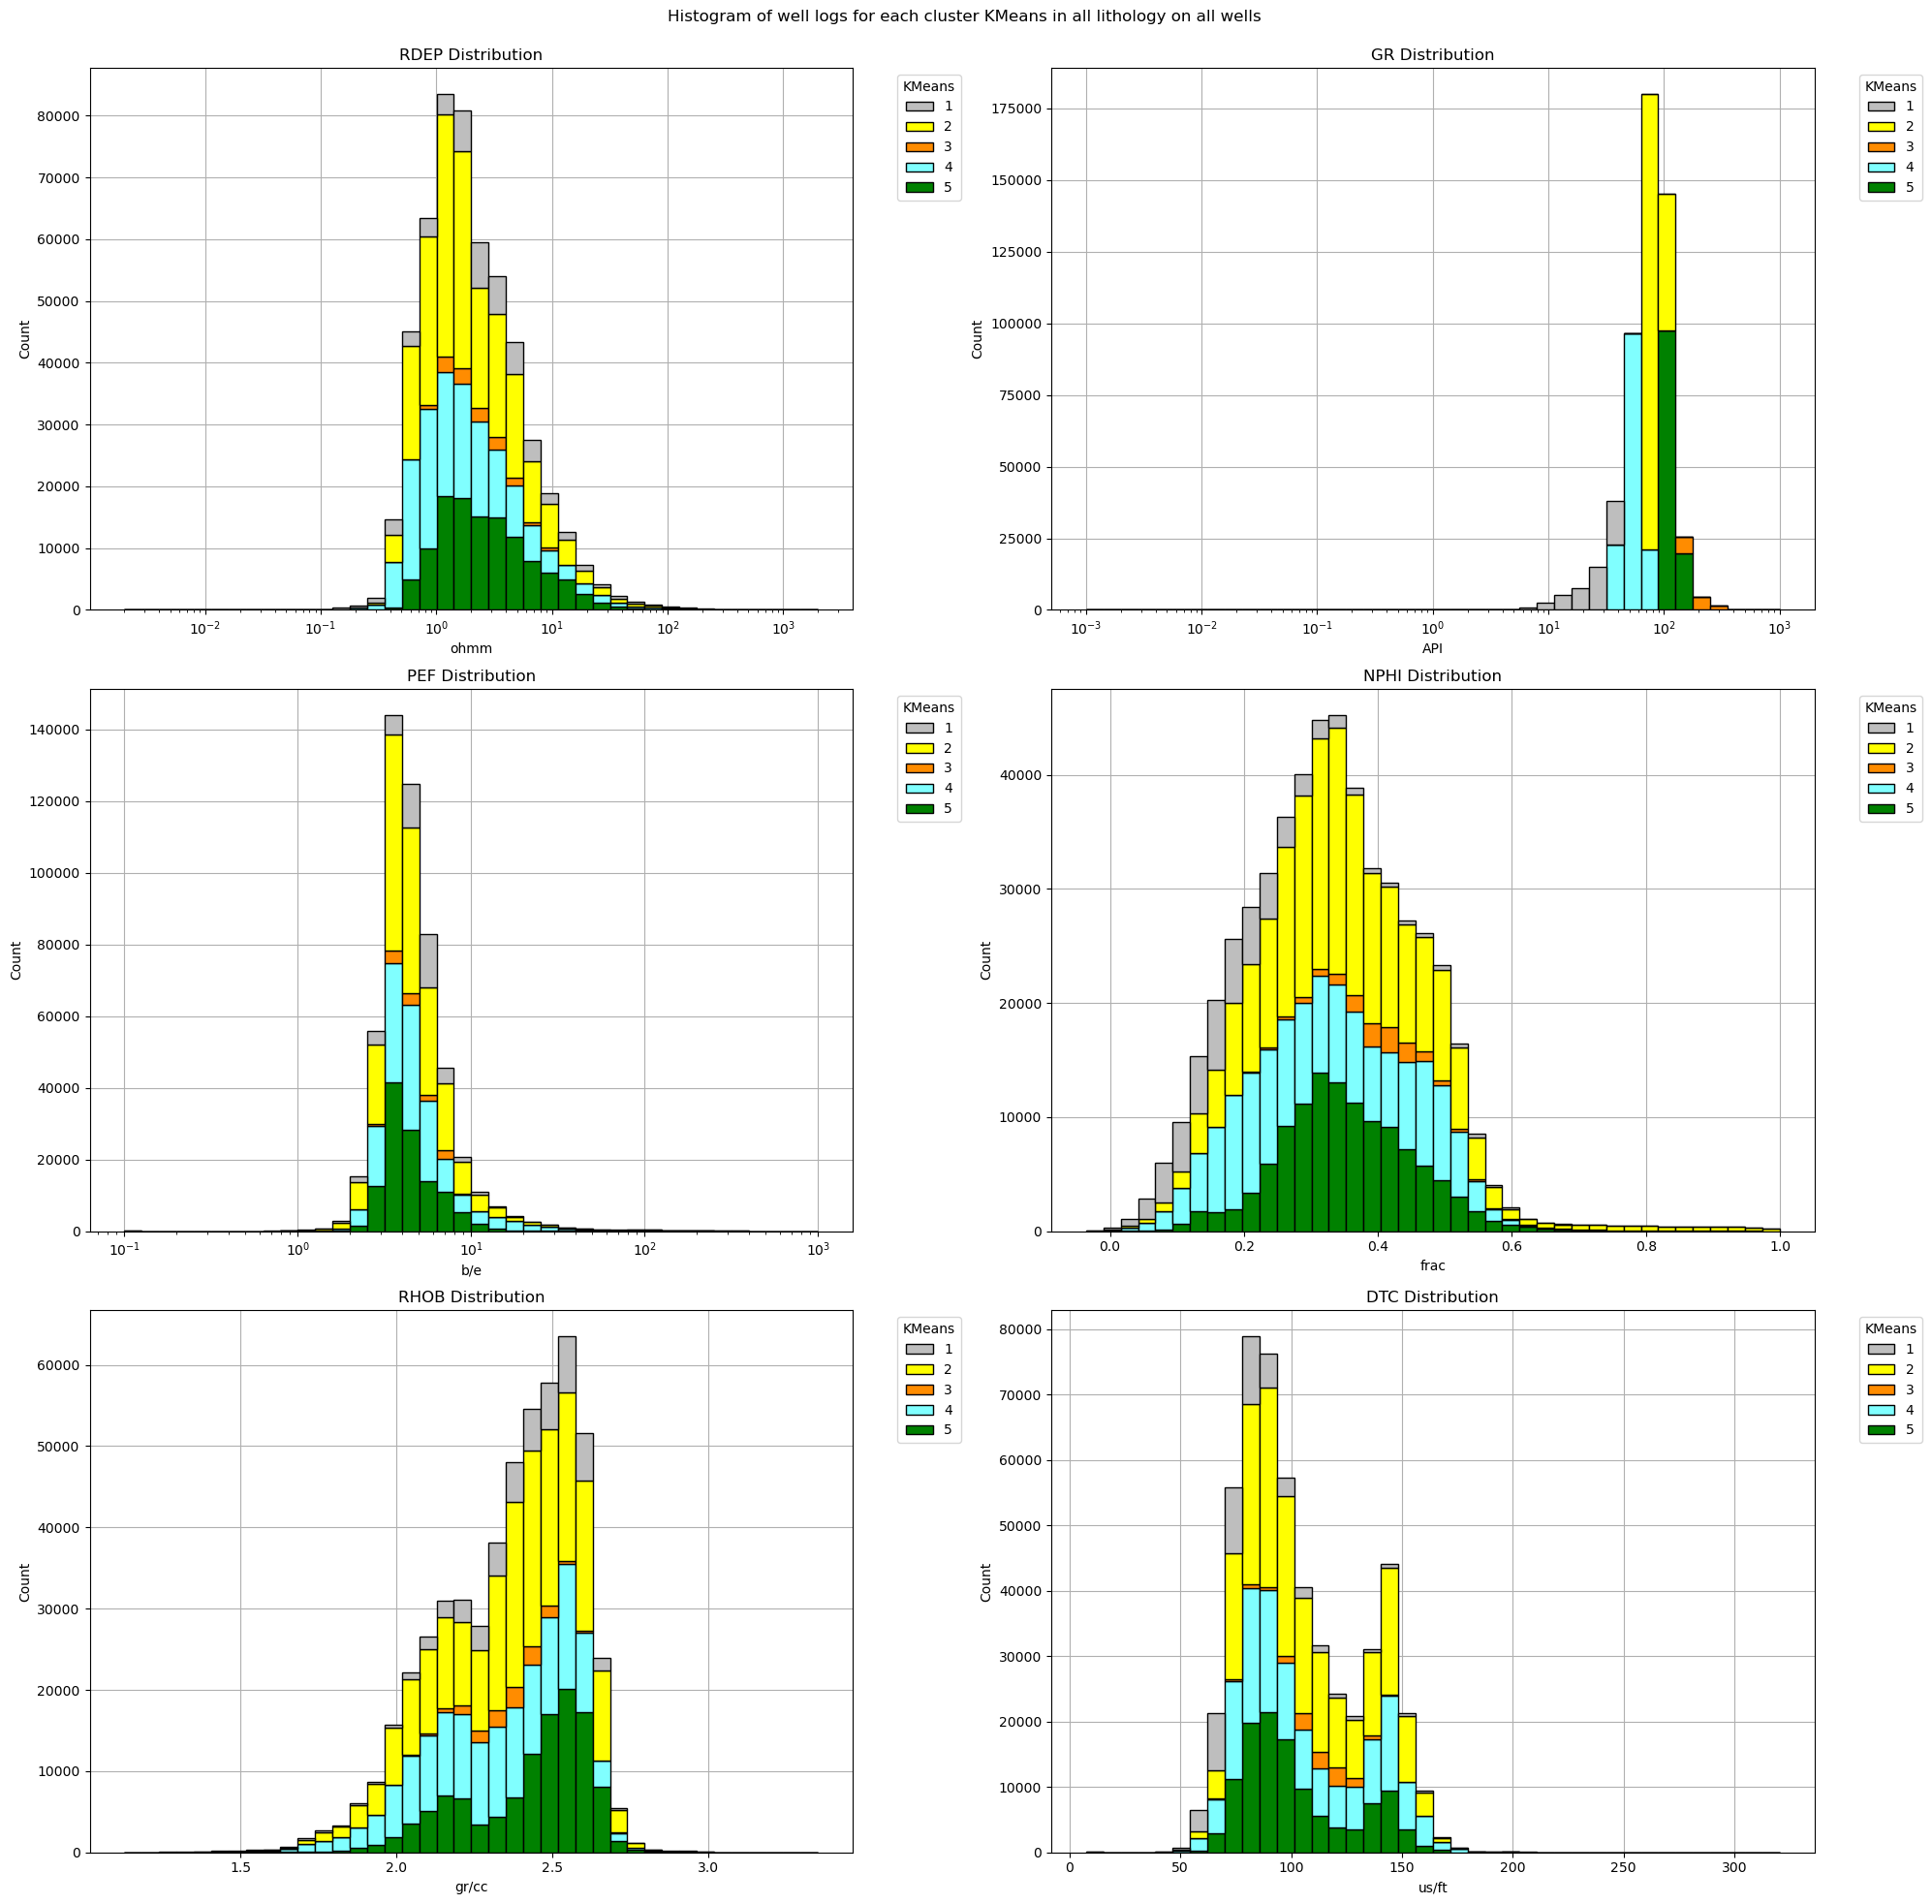

In [152]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Histogram of well logs for each cluster KMeans in all lithology on all wells')

for i, feature in enumerate(well_clustered_curves):
    ax=fig.add_subplot(3,2,i+1)
    ax.set_title(feature+" Distribution")
    ax.set_axisbelow(True)
        
    if i==0:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.002),np.log10(2000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='count', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.002),np.log10(2000)), fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("log")
        ax.set_xlabel('ohmm')
    elif i==1:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.001),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='count', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.001),np.log10(1000)), fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("log")
        ax.set_xlabel('API')
    elif i==2:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.1),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='count', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.1),np.log10(1000)),fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("log")
        ax.set_xlabel('b/e')
    elif i==3:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='count', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("linear")
        ax.set_xlabel('frac')
    elif i==4:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='count', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("linear")
        ax.set_xlabel('gr/cc')
    #elif i==5:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
        #ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='count', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
        #sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        #ax.set_xscale("linear")
        #ax.set_xlabel('mV')
    else:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='count', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("linear")
        ax.set_xlabel('us/ft')

    ax.grid()


plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.subplots_adjust(hspace=0.15, wspace=0.5)
#plt.savefig('histogramlithology_stackcount_triassicdata_new.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Histogram of well logs for each cluster KMeans in all lithology on all wells')

for i, feature in enumerate(well_clustered_curves):
    ax=fig.add_subplot(3,2,i+1)
    ax.set_title(feature+" Distribution")
    ax.set_axisbelow(True)
        
    if i==0:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.002),np.log10(2000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='proportion', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.002),np.log10(2000)), fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("log")
        ax.set_xlabel('ohmm')
    elif i==1:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.001),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='proportion', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.001),np.log10(1000)), fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("log")
        ax.set_xlabel('API')
    elif i==2:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.1),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='proportion', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.1),np.log10(1000)),fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("log")
        ax.set_xlabel('b/e')
    elif i==3:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='proportion', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("linear")
        ax.set_xlabel('frac')
    elif i==4:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='proportion', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("linear")
        ax.set_xlabel('gr/cc')
    #elif i==5:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
        #ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='proportion', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
        #sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        #ax.set_xscale("linear")
        #ax.set_xlabel('mV')
    else:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='proportion', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("linear")
        ax.set_xlabel('us/ft')

    ax.grid()


plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.subplots_adjust(hspace=0.15, wspace=0.5)
#plt.savefig('histogramlithology_stackproportion_triassicdata_new.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Histogram of well logs for each cluster KMeans in all lithology on all wells')

for i, feature in enumerate(well_clustered_curves):
    ax=fig.add_subplot(3,2,i+1)
    ax.set_title(feature+" Distribution")
    ax.set_axisbelow(True)
        
    if i==0:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.002),np.log10(2000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='count', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.002),np.log10(2000)), fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("log")
        ax.set_xlabel('ohmm')
    elif i==1:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.001),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='count', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.001),np.log10(1000)), fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("log")
        ax.set_xlabel('API')
    elif i==2:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.1),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='count', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.1),np.log10(1000)),fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("log")
        ax.set_xlabel('b/e')
    elif i==3:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='count', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("linear")
        ax.set_xlabel('frac')
    elif i==4:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='count', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("linear")
        ax.set_xlabel('gr/cc')
    #elif i==5:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
        #ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='count', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
        #sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        #ax.set_xscale("linear")
        #ax.set_xlabel('mV')
    else:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='count', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("linear")
        ax.set_xlabel('us/ft')

    ax.grid()


plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.subplots_adjust(hspace=0.15, wspace=0.5)
#plt.savefig('histogramlithology_layercount_triassicdata_new.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('Histogram of well logs for each cluster KMeans in all lithology on all wells')

for i, feature in enumerate(well_clustered_curves):
    ax=fig.add_subplot(3,2,i+1)
    ax.set_title(feature+" Distribution")
    ax.set_axisbelow(True)
        
    if i==0:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.002),np.log10(2000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='proportion', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.002),np.log10(2000)), fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("log")
        ax.set_xlabel('ohmm')
    elif i==1:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.001),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='proportion', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.001),np.log10(1000)), fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("log")
        ax.set_xlabel('API')
    elif i==2:
        #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.1),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='proportion', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.1),np.log10(1000)),fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("log")
        ax.set_xlabel('b/e')
    elif i==3:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='proportion', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("linear")
        ax.set_xlabel('frac')
    elif i==4:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='proportion', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("linear")
        ax.set_xlabel('gr/cc')
    #elif i==5:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
        #ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='proportion', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
        #sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        #ax.set_xscale("linear")
        #ax.set_xlabel('mV')
    else:
        #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
        ax=sns.histplot(data=well_clustered, x=feature, hue='KMeans', stat='proportion', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("linear")
        ax.set_xlabel('us/ft')

    ax.grid()


plt.tight_layout()
plt.subplots_adjust(top=0.95)
#plt.subplots_adjust(hspace=0.15, wspace=0.5)
#plt.savefig('histogramlithology_layerproportion_triassicdata_new.png')
plt.show()

##### On each lithology

In [ ]:
for i, litho in enumerate(keys_lithology):
    fig = plt.figure(figsize=(20,20))
    fig.suptitle('Histogram of well logs for each cluster KMeans in '+str(litho)+ ' on all wells')

    for i, feature in enumerate(well_clustered_curves):
        ax=fig.add_subplot(3,2,i+1)
        ax.set_title(feature+" Distribution")
        ax.set_axisbelow(True)
            
        if i==0:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.002),np.log10(2000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='count', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.002),np.log10(2000)), fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("log")
            ax.set_xlabel('ohmm')
        elif i==1:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.001),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='count', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.001),np.log10(1000)), fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("log")
            ax.set_xlabel('API')
        elif i==2:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.1),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='count', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.1),np.log10(1000)),fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("log")
            ax.set_xlabel('b/e')
        elif i==3:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='count', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("linear")
            ax.set_xlabel('frac')
        elif i==4:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='count', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("linear")
            ax.set_xlabel('gr/cc')
        #elif i==5:
            #if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                #pass
            #else:
                #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
                #ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='count', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
                #sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            #ax.set_xscale("linear")
            #ax.set_xlabel('mV')
        else:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='count', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("linear")
            ax.set_xlabel('us/ft')

        ax.grid()
    

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    #plt.subplots_adjust(hspace=0.15, wspace=0.5)
    #plt.savefig('histogramlithology_stackcount_triassicdata_new.png')
    plt.show()

In [ ]:
for i, litho in enumerate(keys_lithology):
    fig = plt.figure(figsize=(20,20))
    fig.suptitle('Histogram of well logs for each cluster KMeans in '+str(litho)+ ' on all wells')

    for i, feature in enumerate(well_clustered_curves):
        ax=fig.add_subplot(3,2,i+1)
        ax.set_title(feature+" Distribution")
        ax.set_axisbelow(True)
            
        if i==0:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.002),np.log10(2000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='proportion', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.002),np.log10(2000)), fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("log")
            ax.set_xlabel('ohmm')
        elif i==1:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.001),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='proportion', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.001),np.log10(1000)), fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("log")
            ax.set_xlabel('API')
        elif i==2:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.1),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='proportion', multiple='stack', alpha=1, bins=40, binrange=(np.log10(0.1),np.log10(1000)),fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("log")
            ax.set_xlabel('b/e')
        elif i==3:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='proportion', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("linear")
            ax.set_xlabel('frac')
        elif i==4:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='proportion', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("linear")
            ax.set_xlabel('gr/cc')
        #elif i==5:
            #if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                #pass
            #else:
                #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
                #ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='proportion', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
                #sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            #ax.set_xscale("linear")
            #ax.set_xlabel('mV')
        else:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='proportion', multiple='stack', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("linear")
            ax.set_xlabel('us/ft')

        ax.grid()
    

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    #plt.subplots_adjust(hspace=0.15, wspace=0.5)
    #plt.savefig('histogramlithology_stackproportion_triassicdata_new.png')
    plt.show()

In [ ]:
for i, litho in enumerate(keys_lithology):
    fig = plt.figure(figsize=(20,20))
    fig.suptitle('Histogram of well logs for each cluster KMeans in '+str(litho)+ ' on all wells')

    for i, feature in enumerate(well_clustered_curves):
        ax=fig.add_subplot(3,2,i+1)
        ax.set_title(feature+" Distribution")
        ax.set_axisbelow(True)
            
        if i==0:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.002),np.log10(2000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='count', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.002),np.log10(2000)), fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("log")
            ax.set_xlabel('ohmm')
        elif i==1:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.001),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='count', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.001),np.log10(1000)), fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("log")
            ax.set_xlabel('API')
        elif i==2:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.1),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='count', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.1),np.log10(1000)),fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("log")
            ax.set_xlabel('b/e')
        elif i==3:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='count', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("linear")
            ax.set_xlabel('frac')
        elif i==4:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='count', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("linear")
            ax.set_xlabel('gr/cc')
        #elif i==5:
            #if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                #pass
            #else:
                #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
                #ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='count', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
                #sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            #ax.set_xscale("linear")
            #ax.set_xlabel('mV')
        else:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='count', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("linear")
            ax.set_xlabel('us/ft')

        ax.grid()
    

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    #plt.subplots_adjust(hspace=0.15, wspace=0.5)
    #plt.savefig('histogramlithology_layercount_triassicdata_new.png')
    plt.show()

In [ ]:
for i, litho in enumerate(keys_lithology):
    fig = plt.figure(figsize=(20,20))
    fig.suptitle('Histogram of well logs for each cluster KMeans in '+str(litho)+ ' on all wells')

    for i, feature in enumerate(well_clustered_curves):
        ax=fig.add_subplot(3,2,i+1)
        ax.set_title(feature+" Distribution")
        ax.set_axisbelow(True)
            
        if i==0:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.002),np.log10(2000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='proportion', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.002),np.log10(2000)), fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("log")
            ax.set_xlabel('ohmm')
        elif i==1:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.001),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='proportion', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.001),np.log10(1000)), fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("log")
            ax.set_xlabel('API')
        elif i==2:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=np.logspace(np.log10(0.1),np.log10(1000),40), ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='proportion', multiple='layer', alpha=1, bins=40, binrange=(np.log10(0.1),np.log10(1000)),fill=True, log_scale=True, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("log")
            ax.set_xlabel('b/e')
        elif i==3:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='proportion', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("linear")
            ax.set_xlabel('frac')
        elif i==4:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='proportion', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("linear")
            ax.set_xlabel('gr/cc')
        #elif i==5:
            #if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                #pass
            #else:
                #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
                #ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='proportion', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
                #sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            #ax.set_xscale("linear")
            #ax.set_xlabel('mV')
        else:
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                #well.groupby('LIT')[feature].hist(bins=40, ax=ax, legend=True ,grid=True, color=kmeanscolor)
                ax=sns.histplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', stat='proportion', multiple='layer', alpha=1, bins=40, fill=True, log_scale=False, palette=kmeanscolor, common_norm=False)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("linear")
            ax.set_xlabel('us/ft')

        ax.grid()
    

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    #plt.subplots_adjust(hspace=0.15, wspace=0.5)
    #plt.savefig('histogramlithology_layerproportion_triassicdata_new.png')
    plt.show()

### KDEs


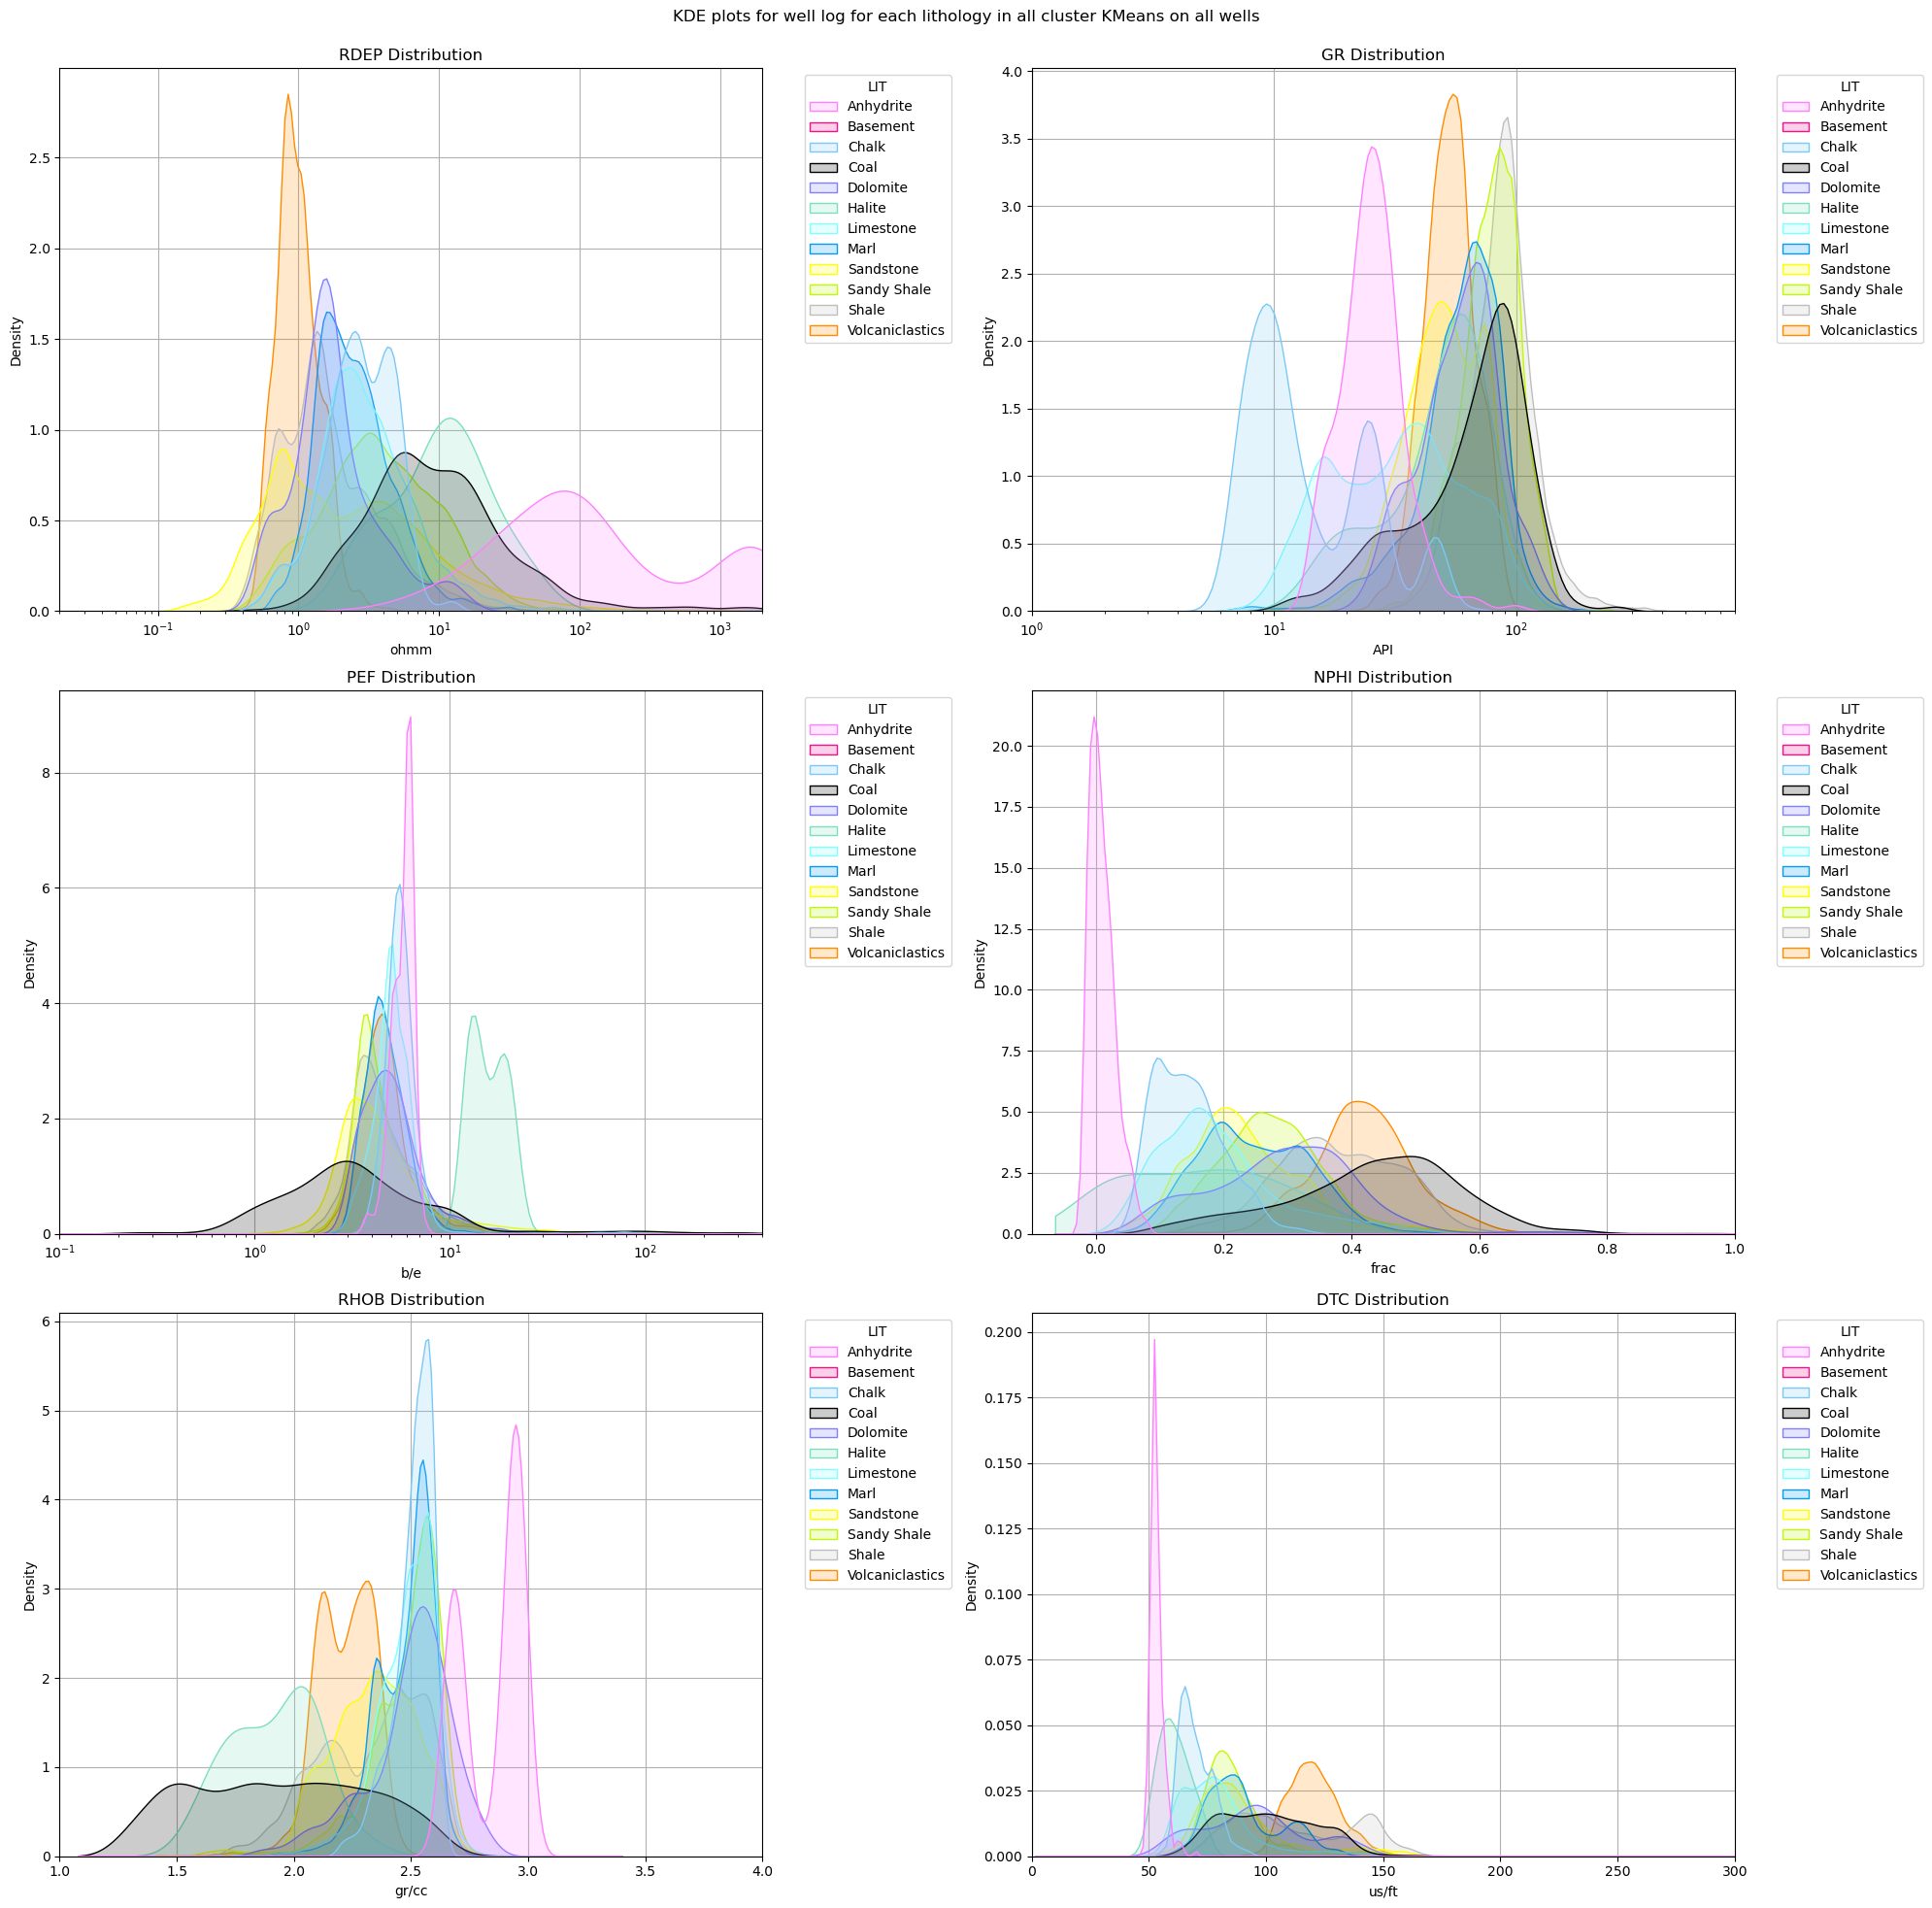

In [154]:
# KDE plots for each cluster group, lithology hue
fig = plt.figure(figsize=(20,20))
fig.suptitle('KDE plots for well log for each lithology in all cluster KMeans on all wells')

for i, feature in enumerate(well_clustered_curves):
    ax=fig.add_subplot(3,2,i+1)
    ax.set_title(feature+" Distribution")
    ax.set_axisbelow(True)
    
    if i==0:
        #well.groupby('WELL')[feature].hist(bins=np.logspace(np.log10(0.002),np.log10(2000),40), ax=ax, legend=False ,grid=True)
        ax=sns.kdeplot(data=well_clustered, x=feature, hue='LIT', fill=True, alpha=0.2, log_scale=True, palette=litocolor, common_norm=False, common_grid=True)
        ax.set_xscale("log")
        ax.set_xlabel('ohmm')
        ax.set_xlim(0.02, 2000)
    elif i==1:
        #well.groupby('WELL')[feature].hist(bins=np.logspace(np.log10(1),np.log10(1000),40), ax=ax, legend=False ,grid=True)
        ax=sns.kdeplot(data=well_clustered, x=feature, hue='LIT', fill=True, alpha=0.2, log_scale=True, palette=litocolor, common_norm=False, common_grid=True)
        ax.set_xscale("log")
        ax.set_xlabel('API')
        ax.set_xlim(1, 800)
    elif i==2:
        #well.groupby('WELL')[feature].hist(bins=np.logspace(np.log10(1),np.log10(1000),40), ax=ax, legend=False ,grid=True)
        ax=sns.kdeplot(data=well_clustered, x=feature, hue='LIT', fill=True, alpha=0.2, log_scale=True, palette=litocolor, common_norm=False, common_grid=True)
        ax.set_xscale("log")
        ax.set_xlabel('b/e')
        ax.set_xlim(0.1, 400)
    elif i==3:
        #well.groupby('WELL')[feature].hist(bins=40, ax=ax, legend=False ,grid=True)
        ax=sns.kdeplot(data=well_clustered, x=feature, hue='LIT', fill=True, alpha=0.2, log_scale=False, palette=litocolor, common_norm=False, common_grid=True)
        ax.set_xscale("linear")
        ax.set_xlabel('frac')
        ax.set_xlim(-0.1, 1)
    elif i==4:
        #well.groupby('WELL')[feature].hist(bins=40, ax=ax, legend=False ,grid=True)
        ax=sns.kdeplot(data=well_clustered, x=feature, hue='LIT', fill=True, alpha=0.2, log_scale=False, palette=litocolor, common_norm=False, common_grid=True)
        ax.set_xscale("linear")
        ax.set_xlabel('gr/cc')
        ax.set_xlim(1, 4)
    #elif i==5:
        #well.groupby('WELL')[feature].hist(bins=40, ax=ax, legend=False ,grid=True)
        #ax=sns.kdeplot(data=well_clustered, x=feature, hue='LIT', fill=True, alpha=0.2, log_scale=False, palette=litocolor, common_norm=False, common_grid=True)
        #ax.set_xscale("linear")
        #ax.set_xlabel('mV')
        #ax.set_xlim(-500, 500)
    else:
        #well.groupby('WELL')[feature].hist(bins=40, ax=ax, legend=False ,grid=True)
        ax=sns.kdeplot(data=well_clustered, x=feature, hue='LIT', fill=True, alpha=0.2, log_scale=False, palette=litocolor, common_norm=False, common_grid=True)
        ax.set_xscale("linear")
        ax.set_xlabel('us/ft')
        ax.set_xlim(0, 300)

    sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
    ax.grid()


plt.tight_layout()
plt.subplots_adjust(top=0.95)#plt.subplots_adjust(hspace=0.15, wspace=0.5)
#plt.savefig('kdelithology_triassicdata_new.png')
plt.show()

In [ ]:
# KDE plots for each cluster group, lithology hue
for i, kmeans in enumerate(keys_kmeans):
    fig = plt.figure(figsize=(20,20))
    fig.suptitle('KDE plots for well log for each lithology in cluster KMeans '+str(kmeans)+ ' on all wells')

    for i, feature in enumerate(well_clustered_curves):
        ax=fig.add_subplot(3,2,i+1)
        ax.set_title(feature+" Distribution")
        ax.set_axisbelow(True)
        
        if i==0:
            #well.groupby('WELL')[feature].hist(bins=np.logspace(np.log10(0.002),np.log10(2000),40), ax=ax, legend=False ,grid=True)
            ax=sns.kdeplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', fill=True, alpha=0.2, log_scale=True, palette=litocolor, common_norm=False, common_grid=True)
            ax.set_xscale("log")
            ax.set_xlabel('ohmm')
            ax.set_xlim(0.02, 2000)
        elif i==1:
            #well.groupby('WELL')[feature].hist(bins=np.logspace(np.log10(1),np.log10(1000),40), ax=ax, legend=False ,grid=True)
            ax=sns.kdeplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', fill=True, alpha=0.2, log_scale=True, palette=litocolor, common_norm=False, common_grid=True)
            ax.set_xscale("log")
            ax.set_xlabel('API')
            ax.set_xlim(1, 800)
        elif i==2:
            #well.groupby('WELL')[feature].hist(bins=np.logspace(np.log10(1),np.log10(1000),40), ax=ax, legend=False ,grid=True)
            ax=sns.kdeplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', fill=True, alpha=0.2, log_scale=True, palette=litocolor, common_norm=False, common_grid=True)
            ax.set_xscale("log")
            ax.set_xlabel('b/e')
            ax.set_xlim(0.1, 400)
        elif i==3:
            #well.groupby('WELL')[feature].hist(bins=40, ax=ax, legend=False ,grid=True)
            ax=sns.kdeplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', fill=True, alpha=0.2, log_scale=False, palette=litocolor, common_norm=False, common_grid=True)
            ax.set_xscale("linear")
            ax.set_xlabel('frac')
            ax.set_xlim(-0.1, 1)
        elif i==4:
            #well.groupby('WELL')[feature].hist(bins=40, ax=ax, legend=False ,grid=True)
            ax=sns.kdeplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', fill=True, alpha=0.2, log_scale=False, palette=litocolor, common_norm=False, common_grid=True)
            ax.set_xscale("linear")
            ax.set_xlabel('gr/cc')
            ax.set_xlim(1, 4)
        #elif i==5:
            #well.groupby('WELL')[feature].hist(bins=40, ax=ax, legend=False ,grid=True)
            #ax=sns.kdeplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', fill=True, alpha=0.2, log_scale=False, palette=litocolor, common_norm=False, common_grid=True)
            #ax.set_xscale("linear")
            #ax.set_xlabel('mV')
            #ax.set_xlim(-500, 500)
        else:
            #well.groupby('WELL')[feature].hist(bins=40, ax=ax, legend=False ,grid=True)
            ax=sns.kdeplot(data=well_clustered[well_clustered['KMeans']==kmeans], x=feature, hue='LIT', fill=True, alpha=0.2, log_scale=False, palette=litocolor, common_norm=False, common_grid=True)
            ax.set_xscale("linear")
            ax.set_xlabel('us/ft')
            ax.set_xlim(0, 300)

        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.grid()
    
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)#plt.subplots_adjust(hspace=0.15, wspace=0.5)
    #plt.savefig('kdelithology_triassicdata_new.png')
    plt.show()

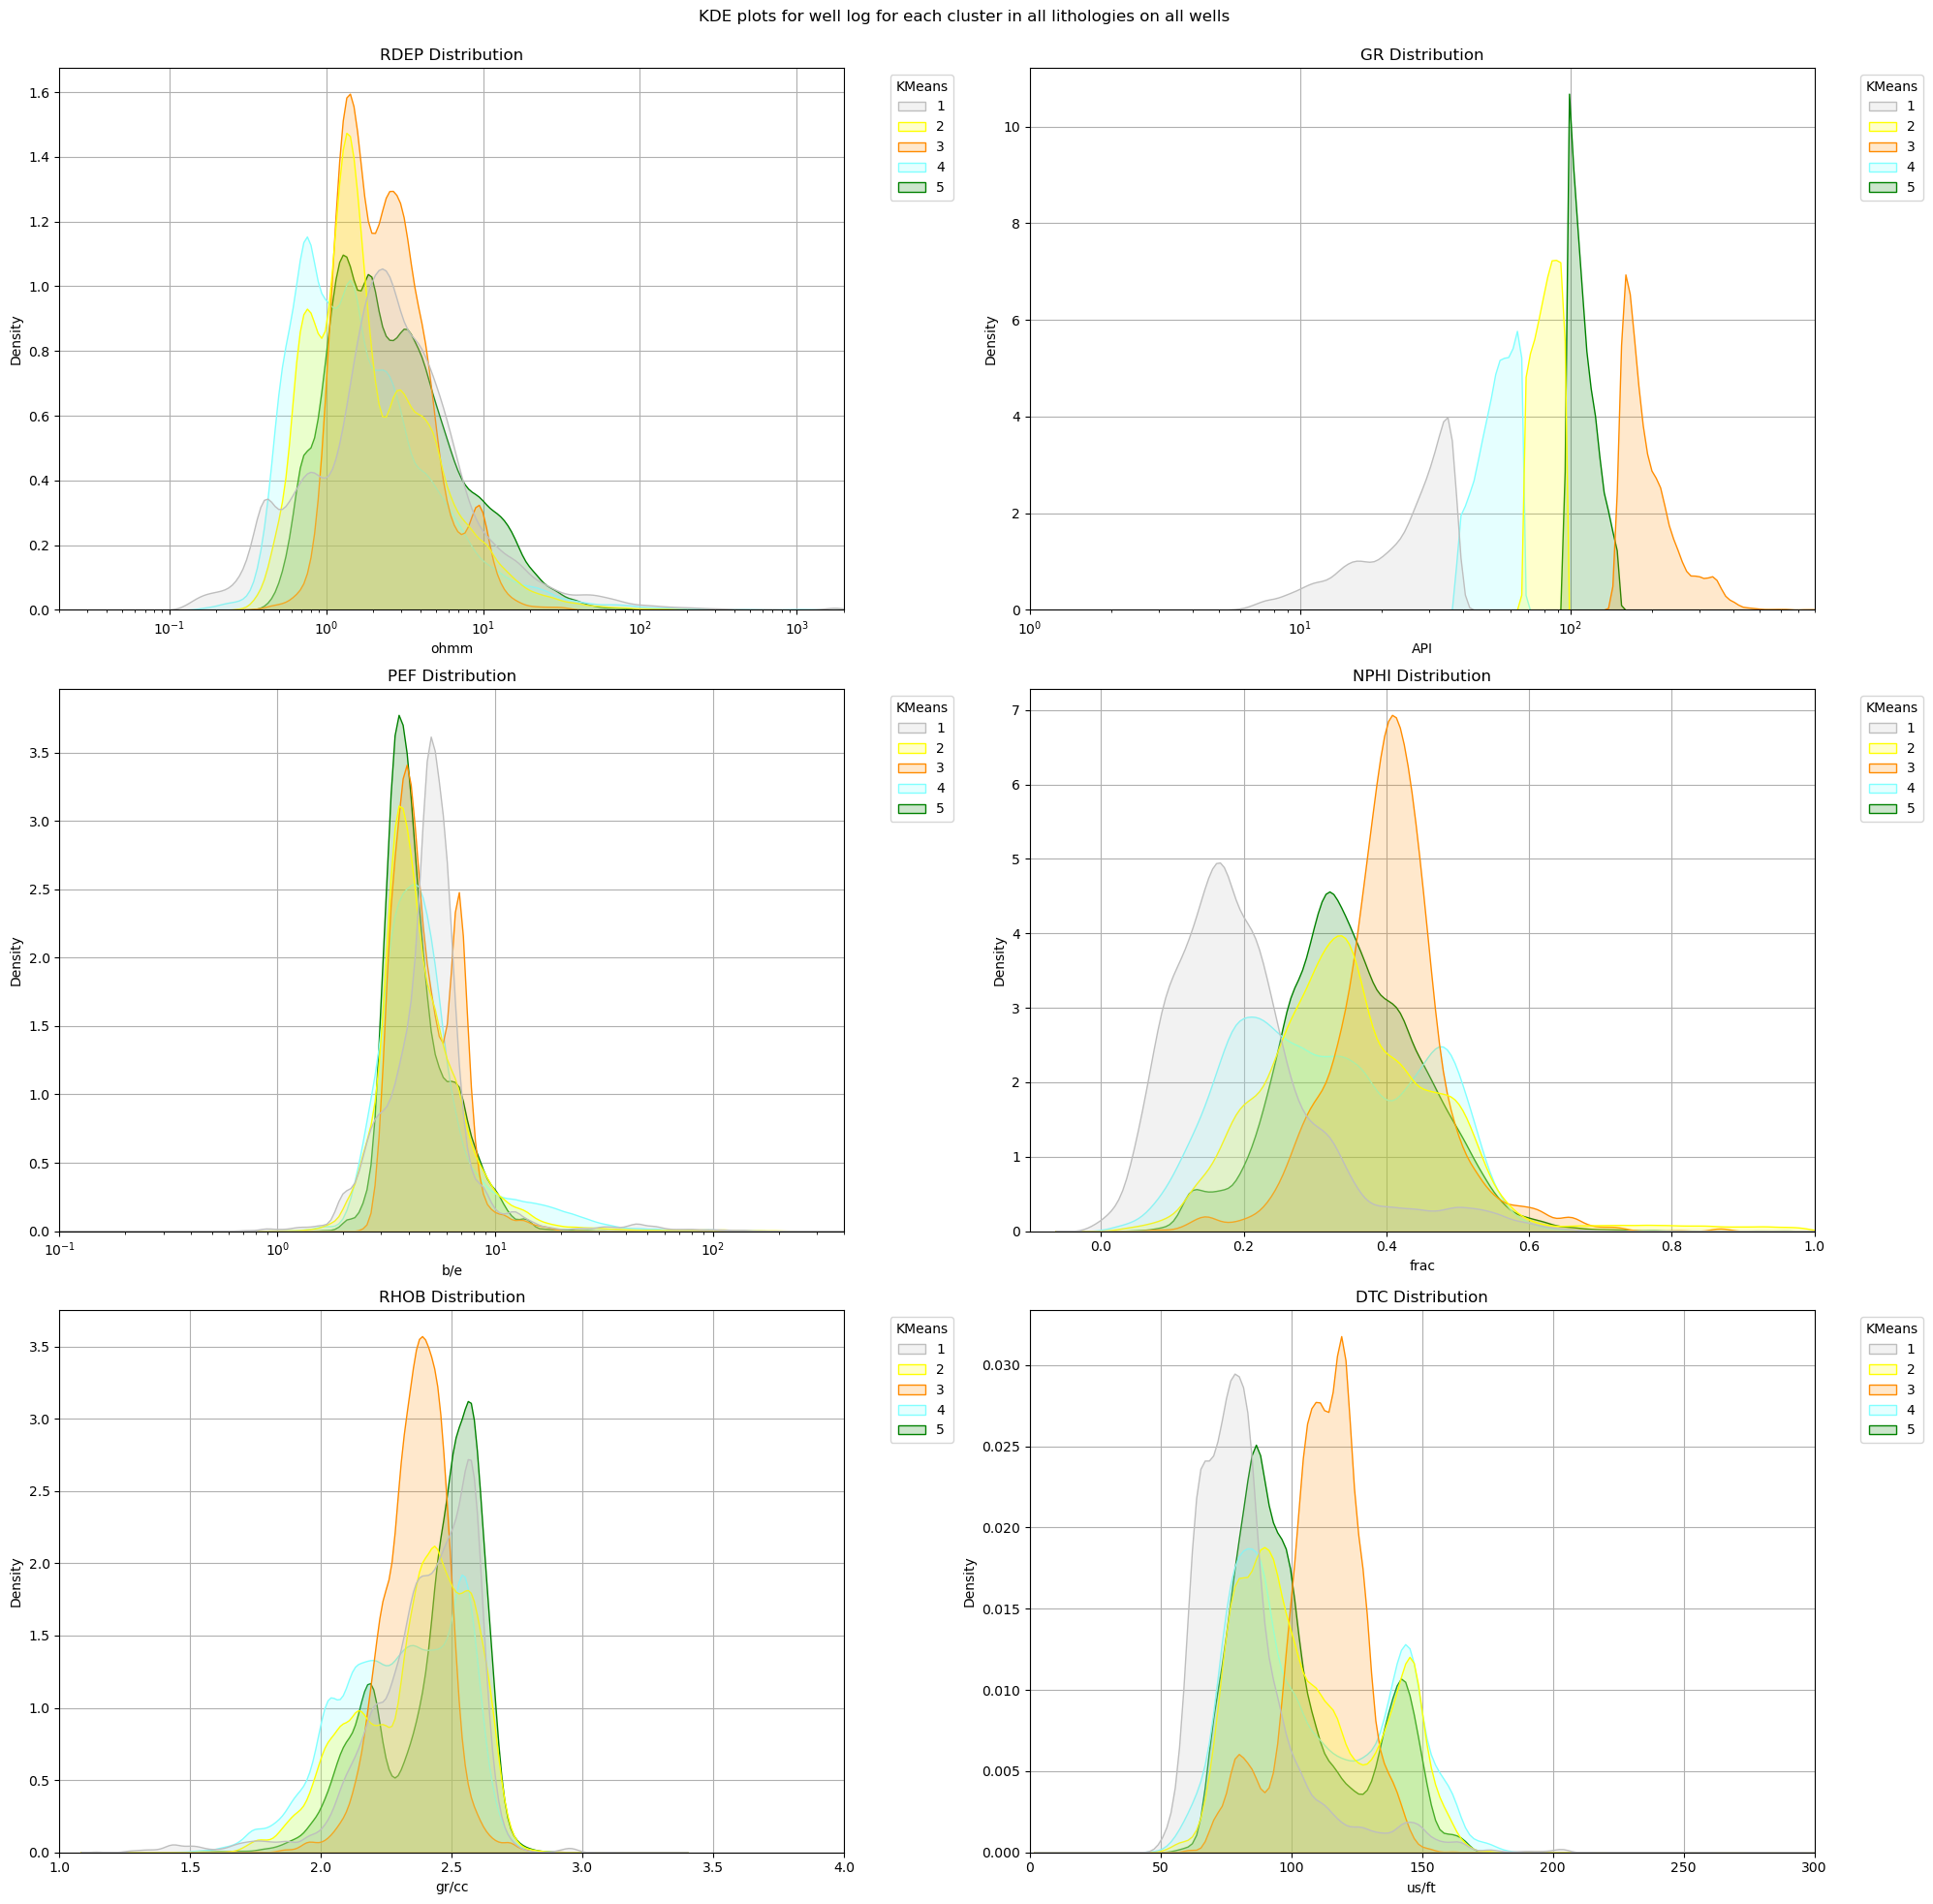

In [155]:
# KDE plots for each lithology group, cluster KMeans hue
fig = plt.figure(figsize=(20,20))
fig.suptitle('KDE plots for well log for each cluster in all lithologies on all wells')

for i, feature in enumerate(well_clustered_curves):
    ax=fig.add_subplot(3,2,i+1)
    ax.set_title(feature+" Distribution")
    ax.set_axisbelow(True)
    
    if i==0:
        ax=sns.kdeplot(data=well_clustered, x=feature, hue='KMeans', fill=True, alpha=0.2, log_scale=True, palette=kmeanscolor, common_norm=False, common_grid=True)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("log")
        ax.set_xlabel('ohmm')
        ax.set_xlim(0.02, 2000)
        
    elif i==1:
        ax=sns.kdeplot(data=well_clustered, x=feature, hue='KMeans', fill=True, alpha=0.2, log_scale=True, palette=kmeanscolor, common_norm=False, common_grid=True)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("log")
        ax.set_xlabel('API')
        ax.set_xlim(1, 800)
        
    elif i==2:
        ax=sns.kdeplot(data=well_clustered, x=feature, hue='KMeans', fill=True, alpha=0.2, log_scale=True, palette=kmeanscolor, common_norm=False, common_grid=True)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("log")
        ax.set_xlabel('b/e')
        ax.set_xlim(0.1, 400)
    elif i==3:
        ax=sns.kdeplot(data=well_clustered, x=feature, hue='KMeans', fill=True, alpha=0.2, log_scale=False, palette=kmeanscolor, common_norm=False, common_grid=True)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("linear")
        ax.set_xlabel('frac')
        ax.set_xlim(-0.1, 1)
    elif i==4:
        ax=sns.kdeplot(data=well_clustered, x=feature, hue='KMeans', fill=True, alpha=0.2, log_scale=False, palette=kmeanscolor, common_norm=False, common_grid=True)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("linear")
        ax.set_xlabel('gr/cc')
        ax.set_xlim(1, 4)
        
    #elif i==5:
        #ax=sns.kdeplot(data=well_clustered, x=feature, hue='KMeans', fill=True, alpha=0.2, log_scale=False, palette=kmeanscolor, common_norm=False, common_grid=True)
        #sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        #ax.set_xscale("linear")
        #ax.set_xlabel('mV')
        #ax.set_xlim(-500, 500)
        
    else:
        ax=sns.kdeplot(data=well_clustered, x=feature, hue='KMeans', fill=True, alpha=0.2, log_scale=False, palette=kmeanscolor, common_norm=False, common_grid=True)
        sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
        ax.set_xscale("linear")
        ax.set_xlabel('us/ft')
        ax.set_xlim(0, 300)
        
    ax.grid()


plt.tight_layout()
plt.subplots_adjust(top=0.95)#plt.subplots_adjust(hspace=0.15, wspace=0.5)
#plt.savefig('kdelithology_triassicdata_new.png')
plt.show()

In [ ]:
# KDE plots for each lithology group, cluster KMeans hue
for i, litho in enumerate(keys_lithology):
    fig = plt.figure(figsize=(20,20))
    fig.suptitle('KDE plots for well log for each cluster in '+str(litho)+ ' on all wells')

    for i, feature in enumerate(well_clustered_curves):
        ax=fig.add_subplot(3,2,i+1)
        ax.set_title(feature+" Distribution")
        ax.set_axisbelow(True)
        
        if i==0:
            #well.groupby('WELL')[feature].hist(bins=np.logspace(np.log10(0.002),np.log10(2000),40), ax=ax, legend=False ,grid=True)
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                ax=sns.kdeplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', fill=True, alpha=0.2, log_scale=True, palette=kmeanscolor, common_norm=False, common_grid=True)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("log")
            ax.set_xlabel('ohmm')
            ax.set_xlim(0.02, 2000)
            
        elif i==1:
            #well.groupby('WELL')[feature].hist(bins=np.logspace(np.log10(1),np.log10(1000),40), ax=ax, legend=False ,grid=True)
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                ax=sns.kdeplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', fill=True, alpha=0.2, log_scale=True, palette=kmeanscolor, common_norm=False, common_grid=True)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("log")
            ax.set_xlabel('API')
            ax.set_xlim(1, 800)
            
        elif i==2:
            #well.groupby('WELL')[feature].hist(bins=np.logspace(np.log10(1),np.log10(1000),40), ax=ax, legend=False ,grid=True)
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                ax=sns.kdeplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', fill=True, alpha=0.2, log_scale=True, palette=kmeanscolor, common_norm=False, common_grid=True)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("log")
            ax.set_xlabel('b/e')
            ax.set_xlim(0.1, 400)
        elif i==3:
            #well.groupby('WELL')[feature].hist(bins=40, ax=ax, legend=False ,grid=True)
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                ax=sns.kdeplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', fill=True, alpha=0.2, log_scale=False, palette=kmeanscolor, common_norm=False, common_grid=True)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("linear")
            ax.set_xlabel('frac')
            ax.set_xlim(-0.1, 1)
        elif i==4:
            #well.groupby('WELL')[feature].hist(bins=40, ax=ax, legend=False ,grid=True)
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                ax=sns.kdeplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', fill=True, alpha=0.2, log_scale=False, palette=kmeanscolor, common_norm=False, common_grid=True)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("linear")
            ax.set_xlabel('gr/cc')
            ax.set_xlim(1, 4)
            
        #elif i==5:
            #well.groupby('WELL')[feature].hist(bins=40, ax=ax, legend=False ,grid=True)
            #if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                #pass
            #else:
                #ax=sns.kdeplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', fill=True, alpha=0.2, log_scale=False, palette=kmeanscolor, common_norm=False, common_grid=True)
                #sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            #ax.set_xscale("linear")
            #ax.set_xlabel('mV')
            #ax.set_xlim(-500, 500)
            
        else:
            #well.groupby('WELL')[feature].hist(bins=40, ax=ax, legend=False ,grid=True)
            if well_clustered[well_clustered['LIT']==litho][feature].unique().sum()==0:
                pass
            else:
                ax=sns.kdeplot(data=well_clustered[well_clustered['LIT']==litho], x=feature, hue='KMeans', fill=True, alpha=0.2, log_scale=False, palette=kmeanscolor, common_norm=False, common_grid=True)
                sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1.05, 1.0))
            ax.set_xscale("linear")
            ax.set_xlabel('us/ft')
            ax.set_xlim(0, 300)
            
        ax.grid()
    
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)#plt.subplots_adjust(hspace=0.15, wspace=0.5)
    #plt.savefig('kdelithology_triassicdata_new.png')
    plt.show()

## Logplot

The well log display will be created in triple-combo style in matplotlib to visualize the curves. The template will be incorporated into **triple_combo_plot** function, so it can be used depending on the selection of top and bottom depths of the graph.

The triple combo display will consists of:

- First track: Gamma Ray - Spectral Gamma Ray, Caliper, Bit size, SP
- Second track: Resistivities
- Third track: Density, Neutron, PEF
- Fourth track: Sonic (Compressional and Shear)
- Fifth track: Lithology log labels
- Sixth track: Clustering results


### Lithology labels


In [107]:
well_clustered['LITHOLOGY'].unique()

array([65000, 65030, 70000, 30000, 99000, 74000, 80000, 70032, 90000,
       86000, 88000], dtype=int64)

In [108]:
lithology_numbers = {30000: {'lith':'Sandstone', 'lith_num':1, 'hatch': '', 'color':'#ffff00'},
                 65030: {'lith':'Sandy Shale', 'lith_num':2, 'hatch':'', 'color':'#c1f80a'},
                 65000: {'lith':'Shale', 'lith_num':3, 'hatch':'', 'color':'#bebebe'},
                 80000: {'lith':'Marl', 'lith_num':4, 'hatch':'', 'color':'#069af3'},
                 74000: {'lith':'Dolomite', 'lith_num':5, 'hatch':'', 'color':'#8080ff'},
                 70000: {'lith':'Limestone', 'lith_num':6, 'hatch':'', 'color':'#80ffff'},
                 70032: {'lith':'Chalk', 'lith_num':7, 'hatch':'', 'color':'#7bc8f6'},
                 88000: {'lith':'Halite', 'lith_num':8, 'hatch':'', 'color':'#7ddfbe'},
                 86000: {'lith':'Anhydrite', 'lith_num':9, 'hatch':'', 'color':'#ff80ff'},
                 99000: {'lith':'Volcaniclastics', 'lith_num':10, 'hatch':'', 'color':'#ff8c00'},
                 90000: {'lith':'Coal', 'lith_num':11, 'hatch':'', 'color':'black'},
                 93000: {'lith':'Basement', 'lith_num':12, 'hatch':'', 'color':'#ef138a'}}

df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.index.name = 'LITHOLOGY'
df_lith

lith  lith_num hatch    color
LITHOLOGY                                          
30000            Sandstone         1        #ffff00
65030          Sandy Shale         2        #c1f80a
65000                Shale         3        #bebebe
80000                 Marl         4        #069af3
74000             Dolomite         5        #8080ff
70000            Limestone         6        #80ffff
70032                Chalk         7        #7bc8f6
88000               Halite         8        #7ddfbe
86000            Anhydrite         9        #ff80ff
99000      Volcaniclastics        10        #ff8c00
90000                 Coal        11          black
93000             Basement        12        #ef138a

In [109]:
lith_code = dict(zip(df_lith.lith, df_lith.lith_num))
lith_colors = list(df_lith.color)
lith_cmap = ListedColormap(lith_colors)
lith_hatches = df_lith.hatch.to_list()

In [110]:
print(lith_code)
print(lith_colors)
#print(lith_cmap)
print(lith_hatches)

{'Sandstone': 1, 'Sandy Shale': 2, 'Shale': 3, 'Marl': 4, 'Dolomite': 5, 'Limestone': 6, 'Chalk': 7, 'Halite': 8, 'Anhydrite': 9, 'Volcaniclastics': 10, 'Coal': 11, 'Basement': 12}
['#ffff00', '#c1f80a', '#bebebe', '#069af3', '#8080ff', '#80ffff', '#7bc8f6', '#7ddfbe', '#ff80ff', '#ff8c00', 'black', '#ef138a']
['', '', '', '', '', '', '', '', '', '', '', '']


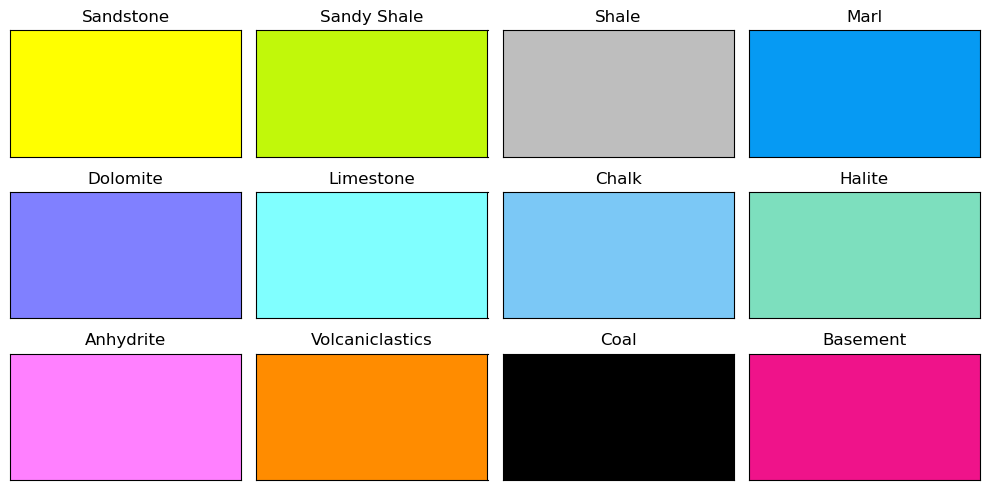

In [111]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=3, sharex=True, sharey=True,
                         figsize=(10,5), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_numbers[key]['lith']))

plt.tight_layout()

plt.show()

### Cluster labels


In [112]:
well_clustered['KMeans'].unique()

array([2, 5, 4, 1, 3], dtype=int64)

In [113]:
kmeans_numbers = {1: {'kmeans_num':1, 'hatch': '', 'color':'#bebebe'},
                 2: {'kmeans_num':2, 'hatch':'', 'color':'#ffff00'},
                 3: {'kmeans_num':3, 'hatch':'', 'color':'#ff8c00'},
                 4: {'kmeans_num':4, 'hatch':'', 'color':'#80ffff'},
                 5: {'kmeans_num':5, 'hatch':'', 'color':'#008100'}}

df_kmeans = pd.DataFrame.from_dict(kmeans_numbers, orient='index')
df_kmeans.index.name = 'KMeans'
df_kmeans

kmeans_num hatch    color
KMeans                           
1                1        #bebebe
2                2        #ffff00
3                3        #ff8c00
4                4        #80ffff
5                5        #008100

In [114]:
kmeans_code = dict(zip(df_kmeans.index, df_kmeans.kmeans_num))
kmeans_colors = list(df_kmeans.color)
kmeans_cmap = ListedColormap(kmeans_colors)
kmeans_hatches = df_kmeans.hatch.to_list()

In [115]:
print(kmeans_code)
print(kmeans_colors)
#print(kmeans_cmap)
print(kmeans_hatches)

{1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
['#bebebe', '#ffff00', '#ff8c00', '#80ffff', '#008100']
['', '', '', '', '']


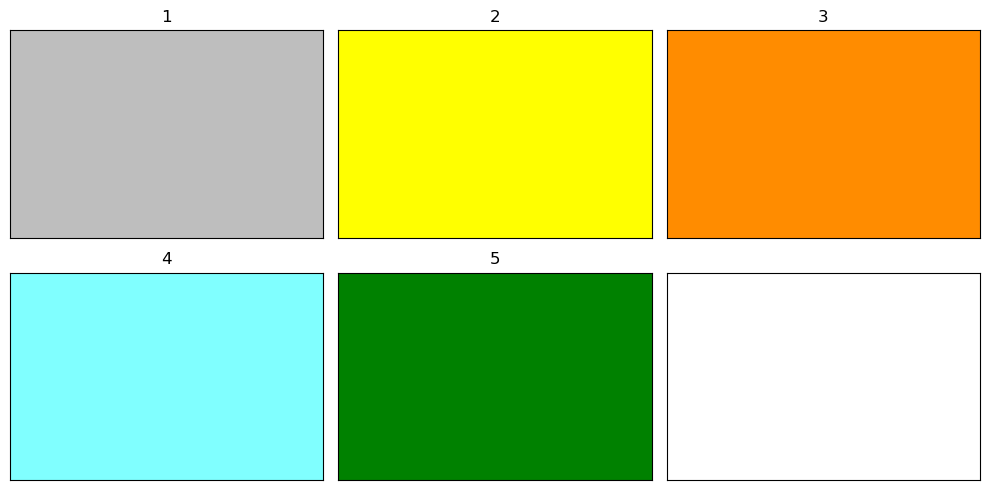

In [116]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=3,nrows=2, sharex=True, sharey=True,
                         figsize=(10,5), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, kmeans_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=kmeans_numbers[key]['color'], hatch=kmeans_numbers[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(kmeans_numbers[key]['kmeans_num']))

plt.tight_layout()

plt.show()

### Plotting


In [156]:
def triple_combo_plot(well_name, top_depth, bottom_depth):
    #Set well data
    well_data = well_clustered[well_clustered['WELL'] == well_name]
    logs=well_data[(well_data.DEPTH >= top_depth) & (well_data.DEPTH <= bottom_depth)]

    #Set plot axes
    fig, ax = plt.subplots(1,6, figsize=(24,48), sharey=True)
    fig.suptitle("Well " + str(well_name) + " Composite", fontsize=22, va='baseline', y=1)
    fig.subplots_adjust(wspace=0.1)

    #General setting
    for axes in ax:
        axes.set_ylim(top_depth, bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True, which='both')
        axes.get_yaxis().set_minor_locator(matplotlib.ticker.LogLocator())
        axes.get_xaxis().set_visible(False)
        axes.get_yaxis().set_visible(True)

        
    ## Track 1
    #Gamma Ray -- Main track
    ax11 = ax[0].twiny()
    ax11.plot("GR","DEPTH", data=logs, color="green")
    ax11.set_xlim(0, 250)
    ax11.set_xlabel("GR (API)", position='top',color='green')
    ax11.spines["top"].set_position(("outward", 5))
    ax11.spines["top"].set_edgecolor("green")
    ax11.tick_params(axis='x', colors="green")
    ax11.grid(True)

    #Caliper
    if logs['CALI'].count()==0:
        pass
    else:
        ax12 = ax[0].twiny()
        ax12.plot("CALI","DEPTH",'--', data=logs, color="black")
        ax12.set_xlim(6, 36)
        ax12.set_xlabel("CALI (inch)", position='top',color='black')
        ax12.spines["top"].set_position(("outward", 35))
        ax12.spines["top"].set_edgecolor("black")
        ax12.tick_params(axis='x', colors="black")
        ax12.set_xticks([6, 12, 18, 24, 30, 36])

    '''
    #SP
    if logs['SP'].count()==0:
        pass
    else:
        ax13 = ax[0].twiny()
        ax13.plot("SP","DEPTH", data=logs, color="blue")
        ax13.set_xlim(-600, 500)
        ax13.set_xlabel("SP (mV)", position='top',color='blue')
        ax13.spines["top"].set_position(("outward", 65))
        ax13.spines["top"].set_edgecolor("blue")
        ax13.tick_params(axis='x', colors="blue")
        ax13.set_xticks([-200, -100, 0, 100, 200])
    '''

    ##Track 2
    #Deep resistivity -- Main track
    ax21=ax[1].twiny()
    ax21.plot("RDEP","DEPTH", data=logs, color="red")
    ax21.set_xlim(0.2, 2000)
    ax21.set_xlabel("RDEP (ohmm)", position='top',color='red')
    ax21.set_xscale('log')
    ax21.spines["top"].set_position(("outward", 5))
    ax21.spines["top"].set_edgecolor("red")
    ax21.tick_params(axis='x', colors="red")
    ax21.set_xticks([0.2, 2, 20, 200, 2000])
    ax21.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax21.grid(True, which='both')
        
        
    ##Track 3
    #Density -- Main track
    ax31=ax[2].twiny()
    ax31.plot("RHOB","DEPTH", data=logs, color="red")
    ax31.set_xlim(1.95, 2.95)
    ax31.set_xlabel("RHOB (g/cm3)", position='top',color='red')
    ax31.spines["top"].set_position(("outward", 5))
    ax31.spines["top"].set_edgecolor("red")
    ax31.tick_params(axis='x', colors="red")
    ax31.set_xticks([1.95, 2.2, 2.45, 2.7, 2.95])
    ax31.grid(True)
        
    #Neutron
    ax32=ax[2].twiny()
    ax32.plot("NPHI","DEPTH", data=logs, color="green")
    ax32.set_xlim(-0.15, 0.45)
    ax32.invert_xaxis()
    ax32.set_xlabel("NPHI (frac)", position='top',color='green')
    ax32.spines["top"].set_position(("outward", 35))
    ax32.spines["top"].set_edgecolor("green")
    ax32.tick_params(axis='x', colors="green")
    ax32.set_xticks([-0.15, 0, 0.15, 0.30, 0.45])

    #PEF
    if logs['PEF'].count()==0:
        pass
    else:
        ax33=ax[2].twiny()
        ax33.plot("PEF","DEPTH", data=logs, color="purple")
        ax33.set_xlim(0, 20)
        ax33.set_xlabel("PEF (b/e)", position='top',color='purple')
        ax33.spines["top"].set_position(("outward", 65))
        ax33.spines["top"].set_edgecolor("purple")
        ax33.tick_params(axis='x', colors="purple")
        #ax33.set_xticks([140, 120, 100, 80, 60, 40])
        
        
    ##Track 4
    #Sonic compressional
    ax41=ax[3].twiny()
    ax41.plot("DTC","DEPTH", data=logs, color="purple")
    ax41.set_xlim(240, 40)
    ax41.set_xlabel("DTC (us/ft)", position='top',color='purple')
    ax41.spines["top"].set_position(("outward", 5))
    ax41.spines["top"].set_edgecolor("purple")
    ax41.tick_params(axis='x', colors="purple")
    #ax41.set_xticks([140, 120, 100, 80, 60, 40])
    ax41.grid(True)
    
        
    #Track 5
    ##Lithology log
    if logs['LIT'].count()==0:
        pass
    else:
        ax51=ax[4].twiny()
        #ax51.plot("LITHOLOGY","DEPTH", data=logs,  color = 'black', linewidth = 0.5)
        lithcode_values = logs['LIT'][:-1].map(lith_code).fillna(2).to_numpy(dtype=int)
        polycollection = ax51.pcolor( [0, 1], logs['DEPTH'], lithcode_values.reshape(-1, 1), cmap=lith_cmap, vmin=1, vmax=len(lith_colors))
        #ax51.set_xlim(0, 1)
        ax51.set_xlabel("LITHOLOGY", position='top',color='black')
        ax51.spines["top"].set_position(("outward", 0))
        ax51.spines["top"].set_edgecolor("black")
        ax51.tick_params(axis='x', colors="black")
        ax51.set_xticks([0, 1])
        
        for path, d2_val in zip(polycollection.get_paths(), lithcode_values):
            hatch = lith_hatches[d2_val - 1]
            if hatch != '':
                ax51.add_patch(PathPatch(path, hatch=hatch, facecolor='none', edgecolor='black'))

        hands = [Patch(facecolor=col, label=k, edgecolor='black') 
                 for k, col in zip(lith_code.keys(), lith_colors)]
        ax51.legend(handles=hands, bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=2, fontsize=12, facecolor=None)

    
    #Track 5
    ##Lithology log
    if logs['KMeans'].count()==0:
        pass
    else:
        ax61=ax[5].twiny()
        #ax51.plot("LITHOLOGY","DEPTH", data=logs,  color = 'black', linewidth = 0.5)
        #kmeanscode_values = logs['KMeans'][:-1].map(kmeans_code).fillna(2).to_numpy(dtype=int)
        kmeanscode_values = logs['KMeans'][:-1].map(kmeans_code).to_numpy()
        polycollection2 = ax61.pcolor( [0, 1], logs['DEPTH'], kmeanscode_values.reshape(-1, 1), cmap=kmeans_cmap, vmin=1, vmax=len(kmeans_colors))
        #ax51.set_xlim(0, 1)
        ax61.set_xlabel("KMeans Clusters", position='top',color='black')
        ax61.spines["top"].set_position(("outward", 0))
        ax61.spines["top"].set_edgecolor("black")
        ax61.tick_params(axis='x', colors="black")
        ax61.set_xticks([0, 1])
        
        for path, d2_val in zip(polycollection2.get_paths(), kmeanscode_values):
            hatch = kmeans_hatches[d2_val - 1]
            if hatch != '':
                ax61.add_patch(PathPatch(path, hatch=hatch, facecolor='none', edgecolor='black'))

        hands2 = [Patch(facecolor=col, label=k, edgecolor='black') 
                 for k, col in zip(kmeans_code.keys(), kmeans_colors)]
        ax61.legend(handles=hands2, bbox_to_anchor=(0.5, 1.04), loc='upper center', ncol=2, fontsize=14, facecolor=None)
 
               
    fig.tight_layout()

In [157]:
well_clustered['WELL'].unique()

array(['15/9-23', '16/2-7', '16/7-6', '25/10-9', '31/2-10', '35/9-7',
       '15/9-13', '15/9-15', '15/9-17', '16/1-6 A', '16/10-1',
       '16/2-11 A', '16/2-16', '16/2-6', '16/4-1', '16/7-5', '25/11-19 S',
       '25/2-7', '25/4-5', '25/8-5 S', '25/8-7', '25/9-1', '26/4-1',
       '31/2-19 S', '31/2-7', '31/2-9', '31/3-4', '31/4-5', '33/9-17',
       '34/10-21', '34/7-21', '34/8-1', '35/11-11', '35/4-1', '34/3-2 S',
       '16/10-2', '16/10-3', '16/10-5', '16/5-3', '31/2-8', '33/6-3 S',
       '34/11-2 S', '34/12-1', '34/2-4', '34/5-1 A', '35/11-12',
       '35/11-6', '35/11-7', '35/12-1', '35/3-7 S', '35/9-10 S', '35/9-5',
       '35/9-6 S', '36/7-3', '31/2-21 S', '35/11-5', '25/2-13 T4',
       '25/2-14', '25/3-1', '25/5-1', '25/5-4', '29/6-1', '30/3-5 S',
       '30/6-5', '31/3-2', '32/2-1', '34/10-35', '34/3-1 A', '34/4-10 R',
       '34/5-1 S', '35/11-1', '35/11-13', '35/11-15 S', '35/8-6 S',
       '7/1-2 S'], dtype=object)

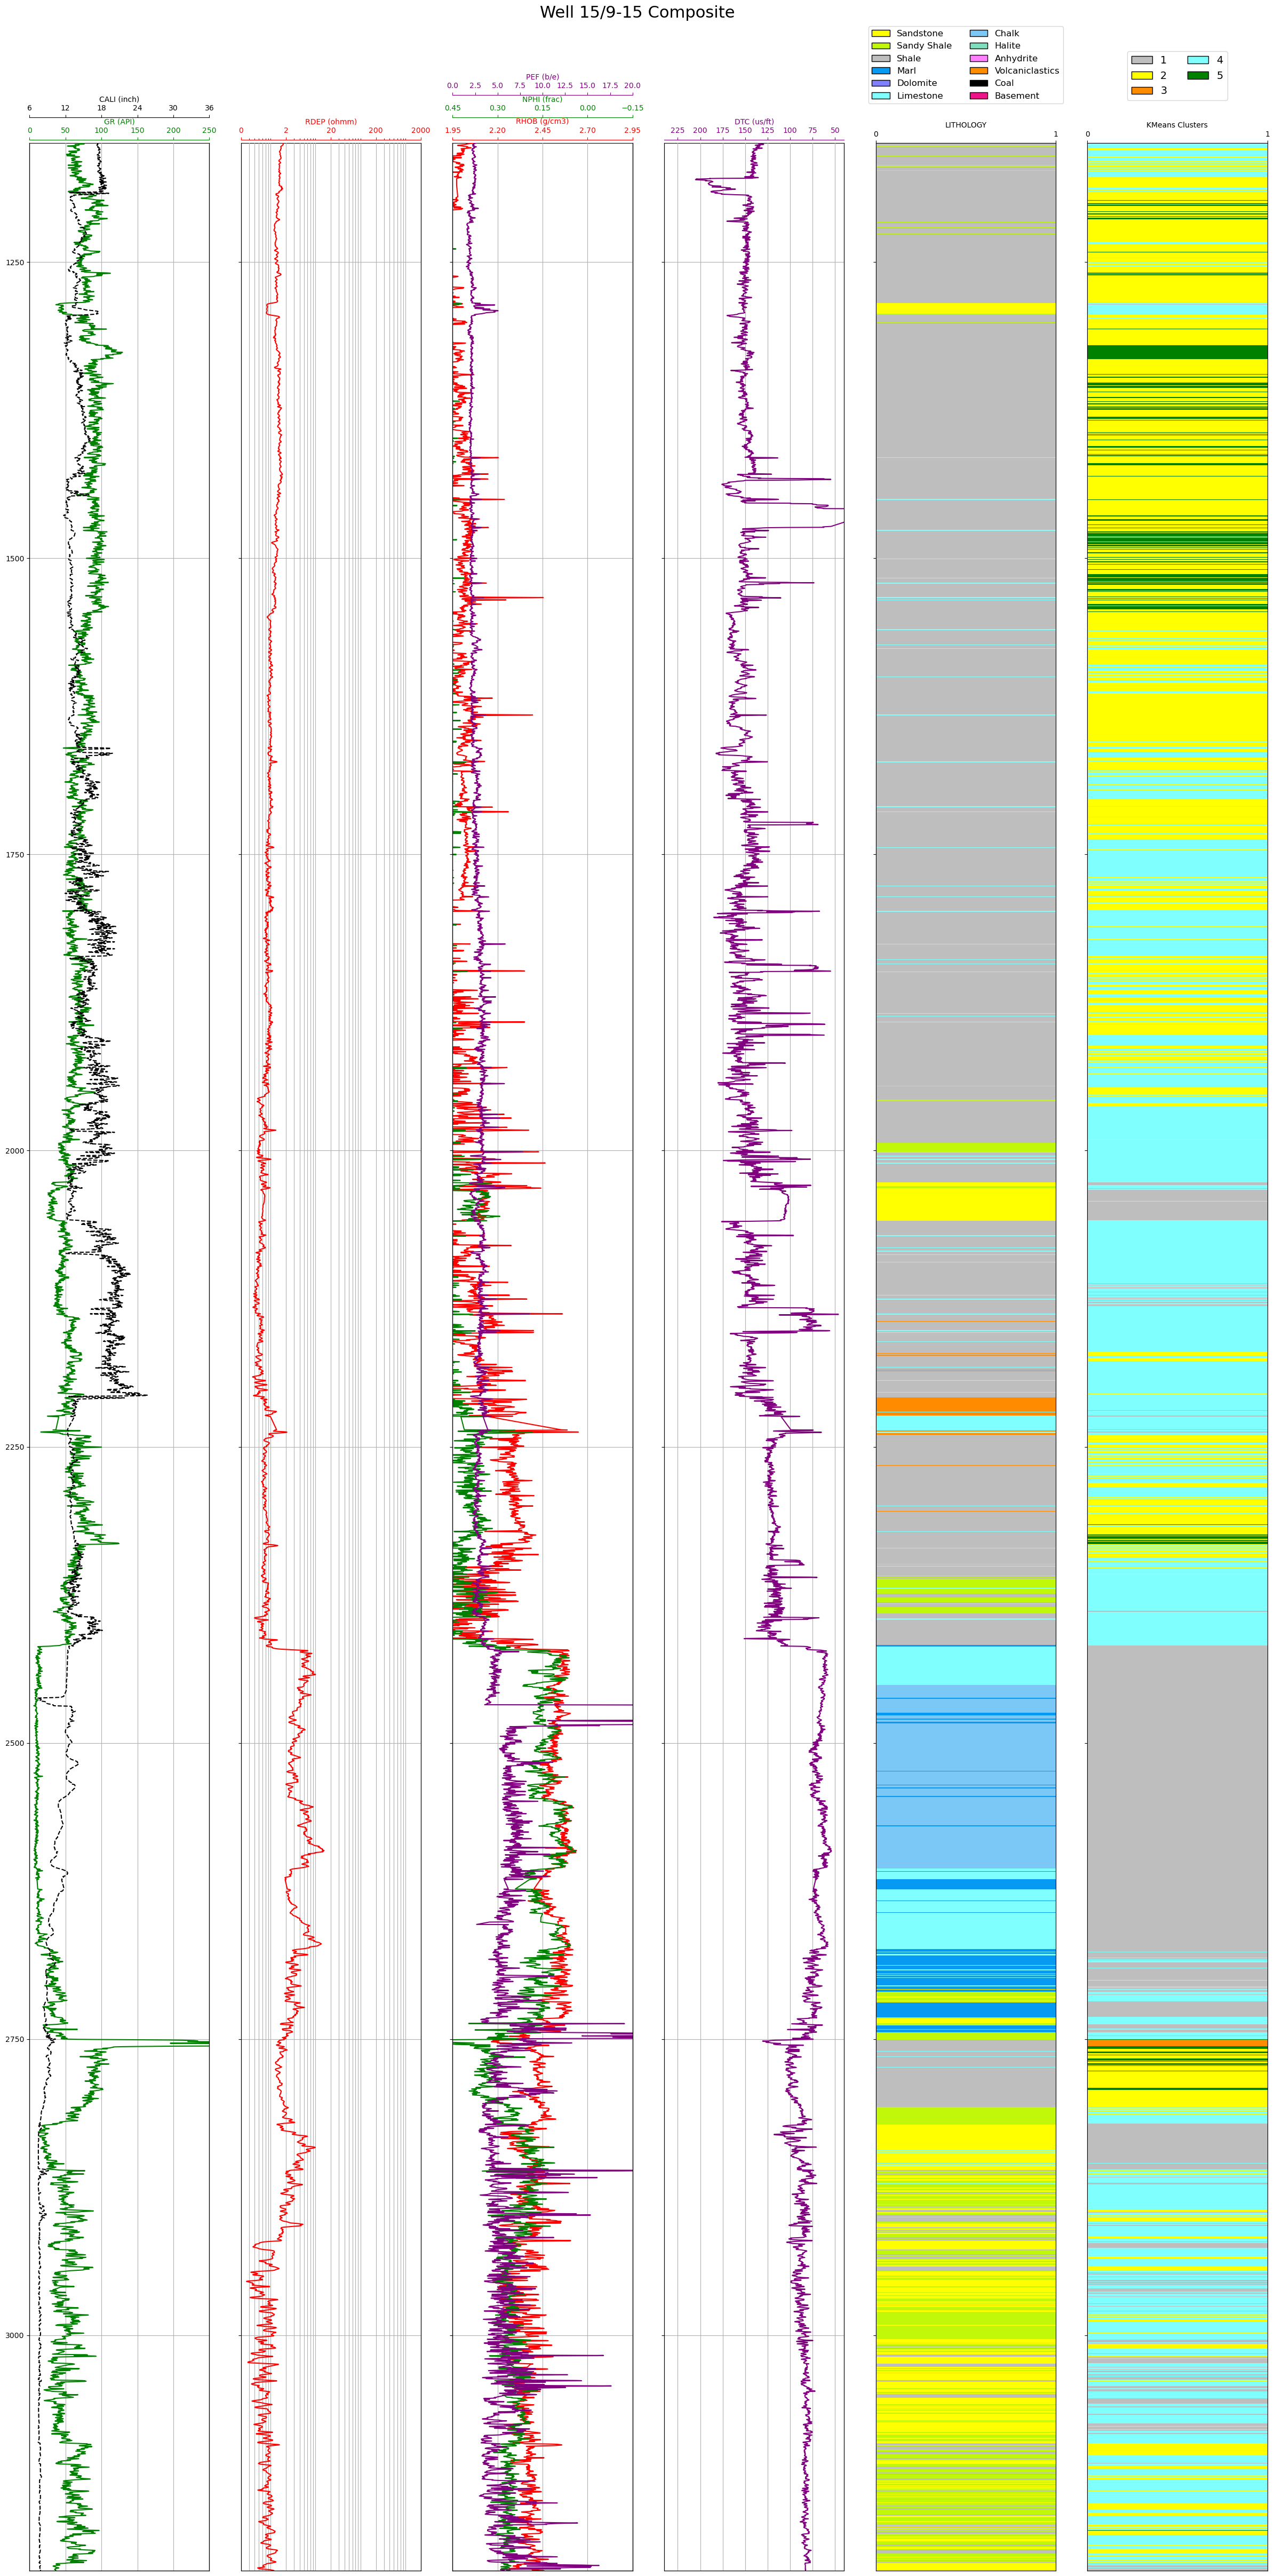

In [158]:
#Display logs for the whole well
triple_combo_plot('15/9-15',well_clustered[well_clustered['WELL'] == '15/9-15'].DEPTH.min(),well_clustered[well_clustered['WELL'] == '15/9-15'].DEPTH.max())

In [159]:
#Display logs for the whole well
for i, wellname in enumerate (well_clustered['WELL'].unique()):
    well_plot = triple_combo_plot(wellname,well_clustered[well_clustered['WELL'] == wellname].DEPTH.min(),well_clustered[well_clustered['WELL'] == wellname].DEPTH.max())
    well_name = wellname.replace('/', '-')
    plt.savefig('../improving-lithology-label-well-logs/Clustered well plot/Stratigraphy_new/01 All well/Composite_clustered_well_{}.png'.format(well_name),bbox_inches='tight')
    plt.close()

## Crossplots (not used)


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(well_ex["NPHI"], well_ex["RHOB"], well_ex["DTC"], c=well_ex['GR'], cmap='rainbow')
ax.set_xlabel('NPHI')
ax.set_ylabel('RHOB')
ax.set_zlabel('DT')

plt.show()

In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=well_ex["NPHI"],
    y=well_ex["RHOB"],
    z=well_ex["DTC"],
    mode='markers',
    marker=dict(
        size=8,
        color=well_ex["GR"],                # set color to an array/list of desired values
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [ ]:
fig = plt.figure(figsize=(10, 10), layout="constrained")
spec = fig.add_gridspec(ncols=2, nrows=2)

ax1 = fig.add_subplot(spec[0, 0])
ax1.scatter(x= "NPHI", y= "RHOB", c = 'GR', data= well_ex, vmin)
ax1.set_ylim(3, 1)
ax1.set_ylabel("RHOB (g/cc)")
ax1.set_xlabel("NPHI (dec)")
ax1.grid(True)

ax2 = fig.add_subplot(spec[1, 0])
ax2.scatter(x= "NPHI", y= "DTC", c = 'GR', data= well_ex)
ax1.set_ylim(3, 1)
ax2.set_ylabel("DT (us/ft)")
ax2.set_xlabel("NPHI (dec)")
ax2.grid(True)

ax3 = fig.add_subplot(spec[0, 1])
ax3.scatter(x= "DTC", y= "RHOB", c = 'GR', data= well_ex)
ax3.set_ylim(3, 1)
ax3.set_ylabel("RHOB (g/cc)")
ax3.set_xlabel("DT (us/ft)")
ax3.grid(True)

ax4 = fig.add_subplot(spec[1, 1])
ax4.scatter(x= "GR", y= "DTC", data= well_ex)
ax4.set_ylabel("DT (us/ft)")
ax4.set_xlabel("GR (API)")
ax4.grid(True)

fig.tight_layout()